# Introduction

This notebook backtests 1500 stock tickers. After reading in the stock tickers from a CSV file, it calls `backtester()` to do all the hard work. This is basically a wrapper for the `backtester()`. The `backtester()` is stored in backtest.py.

In [1]:
from backtest import get_hist, smooth, features, stringify, print_ticker_heading, balanced_scorecard, \
                     determine_minima_n_maxima, align_minima_n_maxima, plot_trades, split_data, \
                     get_signals, merge_buy_n_sell_signals, extract_trades, get_possible_trades, \
                     backtester
import pandas as pd
import numpy as np

from   frankie     import DayForecast, optimize, baseline, cross_val_tpr
import yfinance as yf

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer, load_iris, make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from category_encoders import WOEEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from datetime import date, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import savgol_filter, argrelmin, argrelmax

import gc; gc.enable()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# suppress output of plotting all the trades as this is quite a lot...
# plot_trades(tickers, min_indices, max_indices)

In [4]:
DATAPATH = '/Users/frkornet/Flatiron/Stock-Market-Final-Project/data/'
sdf = pd.read_csv(f'{DATAPATH}stocks_2000.csv')
idx = (sdf.TICKER > '')
sdf = sdf.loc[idx].reset_index()
tickers = sdf.TICKER.sample(1530).to_list()

In [5]:
%time myPnL_df, my_Capital_df, possible_trades_df = backtester(tickers, "10y")

Simulating 1465 stocks



local minima and maxima: 100%|██████████| 1465/1465 [13:30<00:00,  1.81it/s]


Unable to determine minima and maxima for the following tickers:
['HNI', 'NSP', 'SPTN', 'SAFT', 'TGI', 'ACNB', 'TRMK', 'MOFG', 'BGG', 'CATY', 'CCNE', 'CFR', 'HIG', 'ARGO', 'MCK', 'NBTB', 'MGEE']
Simulating with remaining 1448 stocks



possible trades:   5%|▍         | 68/1448 [01:31<24:30,  1.07s/it]

Failed to get possible trades for DESTQ


possible trades: 100%|██████████| 1448/1448 [32:48<00:00,  1.36s/it]


Possible trades to simulate: 15374
Trading days to simulate:  : 740 

before day_close: 2017-03-17 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-03-17 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-03-20 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-03-20 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-03-21 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-03-21 00:00:00 0 10000 0 10000 0 True
*** buying 2000.0 in NYMX on 2017-03-22 00:00:00 with target sell date of 2017-04-12 00:00:00
enough money (10000) to buy NYMX (capital=10000
invested in: [] (0)
after buy: invested in ['NYMX'] (1
capital=10000 in_use=2000.0 free=8000.0
*** buying 2000.0 in WST on 2017-03-22 00:00:00 with target sell date of 2017-06-07 00:00:00
enough money (8000.0) to buy WST (capital=10000
invested in: ['NYMX'] (1)
after buy: invested in ['NYMX', 'WST'] (2
capital=10000 in_use=4000.0 free=6000.0
*** buying 2000.0 in CVGI on 2017-03-22 00:00:00 with target sell date of 2017-04

after buy: invested in ['BHC', 'MLAB', 'IVC', 'CACC', 'GEOS'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in GOOD on 2017-03-22 00:00:00 with target sell date of 2017-04-11 00:00:00
maxed out: GOOD is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'CACC', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'CACC', 'GEOS'] (5)
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in EPM on 2017-03-22 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: EPM is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'CACC', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'CACC', 'GEOS'] (5)
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in ERII on 2017-03-22 00:00:00 with target sell date of 2017-04-11 00:00:00
maxed out: ERII is not expected to perform bett

after buy: invested in ['BHC', 'MLAB', 'IVC', 'GEOS', 'CASH'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in KAMN on 2017-03-22 00:00:00 with target sell date of 2017-07-05 00:00:00
maxed out: KAMN is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'CASH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'CASH'] (5)
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in NPO on 2017-03-22 00:00:00 with target sell date of 2017-04-20 00:00:00
maxed out: NPO is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'CASH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'CASH'] (5)
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in HI on 2017-03-22 00:00:00 with target sell date of 2017-04-27 00:00:00
maxed out: HI is not expected to perform better t

after buy: invested in ['BHC', 'MLAB', 'IVC', 'GEOS', 'ATSG'] (5
capital=9987.839771101573 in_use=9987.839771101573 free=0.0
*** buying 1997.5679542203147 in ZIOP on 2017-03-23 00:00:00 with target sell date of 2017-05-03 00:00:00
maxed out: ZIOP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'ATSG'] (5)
capital=9987.839771101573 in_use=9987.839771101573 free=0.0
*** buying 1997.5679542203147 in HLIO on 2017-03-23 00:00:00 with target sell date of 2017-05-05 00:00:00
maxed out: HLIO is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'ATSG'] (5)
capital=9987.839771101573 in_use=9987.839771101573 free=0.0
*** buying 1997.5679542203147 in DXCM on 2017-03-23 00:

after buy: invested in ['BHC', 'MLAB', 'IVC', 'GEOS', 'TCCO'] (5
capital=9987.839771101573 in_use=9987.839771101573 free=0.0
*** buying 1997.5679542203147 in DLX on 2017-03-23 00:00:00 with target sell date of 2017-03-31 00:00:00
maxed out: DLX is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'TCCO'] (5)
capital=9987.839771101573 in_use=9987.839771101573 free=0.0
*** buying 1997.5679542203147 in TDC on 2017-03-23 00:00:00 with target sell date of 2017-03-28 00:00:00
maxed out: TDC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'MLAB', 'IVC', 'GEOS', 'TCCO'] (5)
capital=9987.839771101573 in_use=9987.839771101573 free=0.0
*** buying 1997.5679542203147 in RRGB on 2017-03-23 00:00:0

after buy: invested in ['BHC', 'GEOS', 'TCCO', 'CTRC', 'ZN'] (5
capital=10297.363577242877 in_use=10297.363577242877 free=0.0
*** buying 2059.4727154485754 in ATHX on 2017-03-28 00:00:00 with target sell date of 2017-04-19 00:00:00
maxed out: ATHX is not expected to perform better than stocks already invested in
invested in: ['BHC', 'GEOS', 'TCCO', 'CTRC', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'GEOS', 'TCCO', 'CTRC', 'ZN'] (5)
capital=10297.363577242877 in_use=10297.363577242877 free=0.0
*** buying 2059.4727154485754 in WRLD on 2017-03-28 00:00:00 with target sell date of 2017-05-08 00:00:00
maxed out: WRLD is not expected to perform better than stocks already invested in
invested in: ['BHC', 'GEOS', 'TCCO', 'CTRC', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'GEOS', 'TCCO', 'CTRC', 'ZN'] (5)
capital=10297.363577242877 in_use=10297.363577242877 free=0.0
*** buying 2059.4727154485754 in FC on 2017-03-28 00:0

after buy: invested in ['BHC', 'TCCO', 'CTRC', 'ZN', 'ELOX'] (5
capital=10416.357239733952 in_use=10270.225081578108 free=146.132158155845
*** buying 2083.2714479467904 in UIHC on 2017-03-30 00:00:00 with target sell date of 2018-01-22 00:00:00
maxed out: UIHC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TCCO', 'CTRC', 'ZN', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TCCO', 'CTRC', 'ZN', 'ELOX'] (5)
capital=10416.357239733952 in_use=10270.225081578108 free=146.132158155845
*** buying 2083.2714479467904 in RICK on 2017-03-30 00:00:00 with target sell date of 2017-05-10 00:00:00
maxed out: RICK is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TCCO', 'CTRC', 'ZN', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TCCO', 'CTRC', 'ZN', 'ELOX'] (5)
capital=10416.357239733952 in_use=10270.225081578108 free=146.132158155845
*** buying 2083

after buy: invested in ['BHC', 'TCCO', 'ZN', 'CBZ'] (4
capital=10134.896051488275 in_use=8300.91238341397 free=1833.9836680743051
*** buying 2026.9792102976548 in EBS on 2017-04-03 00:00:00 with target sell date of 2017-05-15 00:00:00
enough money (1833.9836680743051) to buy EBS (capital=10134.896051488275
invested in: ['BHC', 'TCCO', 'ZN', 'CBZ'] (4)
you do not have 1833.9836680743051 and setting amount to 1833.9836680743051
after buy: invested in ['BHC', 'TCCO', 'ZN', 'CBZ', 'EBS'] (5
capital=10134.896051488275 in_use=10134.896051488275 free=0.0
*** buying 2026.9792102976548 in SCL on 2017-04-03 00:00:00 with target sell date of 2017-05-16 00:00:00
*** selling CBZ on 2017-04-03 00:00:00 to free up money for SCL
profit of selling CBZ on 2017-04-03 00:00:00:  -2.2737367544323206e-13 -0.0%
enough money (2026.9792102976546) to buy SCL (capital=10134.896051488275
invested in: ['BHC', 'TCCO', 'ZN', 'EBS'] (4)
you do not have 2026.9792102976546 and setting amount to 2026.9792102976546
after

after buy: invested in ['BHC', 'ZN', 'SCL', 'AMPE', 'BASI'] (5
capital=9897.122188798312 in_use=9847.293526891784 free=49.82866190652726
*** buying 1979.4244377596624 in WINA on 2017-04-04 00:00:00 with target sell date of 2017-05-08 00:00:00
*** selling BASI on 2017-04-04 00:00:00 to free up money for WINA
profit of selling BASI on 2017-04-04 00:00:00:  0.0 0.0%
enough money (2029.2530996661897) to buy WINA (capital=9897.122188798312
invested in: ['BHC', 'ZN', 'SCL', 'AMPE'] (4)
after buy: invested in ['BHC', 'ZN', 'SCL', 'AMPE', 'WINA'] (5
capital=9897.122188798312 in_use=9847.293526891784 free=49.82866190652726
*** buying 1979.4244377596624 in WHR on 2017-04-04 00:00:00 with target sell date of 2017-05-10 00:00:00
maxed out: WHR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'SCL', 'AMPE', 'WINA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'SCL', 'AMPE', 'WINA'] (5)
capital=9897.122188798312 in_use=9

after buy: invested in ['BHC', 'ZN', 'AMPE', 'PODD', 'IMGN'] (5
capital=9698.702787439264 in_use=9586.9761042638 free=111.72668317546436
*** buying 1939.7405574878528 in HELE on 2017-04-05 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: HELE is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'AMPE', 'PODD', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'AMPE', 'PODD', 'IMGN'] (5)
capital=9698.702787439264 in_use=9586.9761042638 free=111.72668317546436
*** buying 1939.7405574878528 in BWA on 2017-04-05 00:00:00 with target sell date of 2017-05-23 00:00:00
maxed out: BWA is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'AMPE', 'PODD', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'AMPE', 'PODD', 'IMGN'] (5)
capital=9698.702787439264 in_use=9586.9761042638 free=111.72668317546436
*** buying 1939.7405574

breached stop-loss and selling AMPE...
profit of selling AMPE on 2017-04-05 00:00:00:  -371.4397302428972 -20.25%
after day_close: 2017-04-05 00:00:00 3 9256.567977125584 5884.473273651845 3372.0947034737355 2.7284841053187847e-12 True
*** buying 1851.3135954251168 in ISNS on 2017-04-06 00:00:00 with target sell date of 2017-05-08 00:00:00
enough money (3372.0947034737355) to buy ISNS (capital=9256.567977125584
invested in: ['ZN', 'IMGN', 'GEOS'] (3)
after buy: invested in ['ZN', 'IMGN', 'GEOS', 'ISNS'] (4
capital=9256.567977125584 in_use=7735.786869076962 free=1520.7811080486188
*** buying 1851.3135954251168 in BDC on 2017-04-06 00:00:00 with target sell date of 2017-04-25 00:00:00
enough money (1520.7811080486188) to buy BDC (capital=9256.567977125584
invested in: ['ZN', 'IMGN', 'GEOS', 'ISNS'] (4)
you do not have 1520.7811080486188 and setting amount to 1520.7811080486188
after buy: invested in ['ZN', 'IMGN', 'GEOS', 'ISNS', 'BDC'] (5
capital=9256.567977125584 in_use=9256.5679771255

after buy: invested in ['ZN', 'IMGN', 'GEOS', 'ISNS', 'ARAY'] (5
capital=9256.567977125584 in_use=9256.56797712558 free=0.0
*** buying 1851.3135954251168 in LOAN on 2017-04-06 00:00:00 with target sell date of 2017-04-27 00:00:00
maxed out: LOAN is not expected to perform better than stocks already invested in
invested in: ['ZN', 'IMGN', 'GEOS', 'ISNS', 'ARAY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'IMGN', 'GEOS', 'ISNS', 'ARAY'] (5)
capital=9256.567977125584 in_use=9256.56797712558 free=0.0
before day_close: 2017-04-06 00:00:00 5 9256.567977125584 9256.56797712558 0.0 3.637978807091713e-12 True
after day_close: 2017-04-06 00:00:00 5 9355.502979028734 9355.50297902873 0.0 3.637978807091713e-12 True
*** buying 1871.1005958057467 in ISSC on 2017-04-07 00:00:00 with target sell date of 2017-06-07 00:00:00
maxed out: ISSC is not expected to perform better than stocks already invested in
invested in: ['ZN', 'IMGN', 'GEOS', 'ISNS', 'ARAY'] (5)

not enough 

after buy: invested in ['ZN', 'GEOS', 'ISNS', 'ARAY', 'DAIO'] (5
capital=9056.965084153642 in_use=9056.965084153639 free=0.0
*** buying 1811.3930168307284 in CYH on 2017-04-12 00:00:00 with target sell date of 2017-05-16 00:00:00
*** selling DAIO on 2017-04-12 00:00:00 to free up money for CYH
profit of selling DAIO on 2017-04-12 00:00:00:  0.0 0.0%
enough money (1667.7381453157132) to buy CYH (capital=9056.965084153642
invested in: ['ZN', 'GEOS', 'ISNS', 'ARAY'] (4)
you do not have 1667.7381453157132 and setting amount to 1667.7381453157132
after buy: invested in ['ZN', 'GEOS', 'ISNS', 'ARAY', 'CYH'] (5
capital=9056.965084153642 in_use=9056.965084153639 free=0.0
*** buying 1811.3930168307284 in SGC on 2017-04-12 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: SGC is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'ISNS', 'ARAY', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'ISNS', '

after buy: invested in ['ZN', 'GEOS', 'ISNS', 'CYH', 'TRNS'] (5
capital=8937.800083062626 in_use=8937.800083062622 free=0.0
*** buying 1787.5600166125253 in JBLU on 2017-04-17 00:00:00 with target sell date of 2017-04-27 00:00:00
maxed out: JBLU is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'ISNS', 'CYH', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'ISNS', 'CYH', 'TRNS'] (5)
capital=8937.800083062626 in_use=8937.800083062622 free=0.0
*** buying 1787.5600166125253 in HUM on 2017-04-17 00:00:00 with target sell date of 2017-05-01 00:00:00
maxed out: HUM is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'ISNS', 'CYH', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'ISNS', 'CYH', 'TRNS'] (5)
capital=8937.800083062626 in_use=8937.800083062622 free=0.0
*** buying 1787.5600166125253 in SMP on 2017-04-17 00:00:00 wi

after buy: invested in ['ZN', 'GEOS', 'CYH', 'TRNS', 'SES'] (5
capital=8759.568000449239 in_use=8759.568000449235 free=0.0
*** buying 1751.9136000898477 in NM on 2017-04-19 00:00:00 with target sell date of 2017-08-18 00:00:00
maxed out: NM is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'CYH', 'TRNS', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'CYH', 'TRNS', 'SES'] (5)
capital=8759.568000449239 in_use=8759.568000449235 free=0.0
before day_close: 2017-04-19 00:00:00 5 8759.568000449239 8759.568000449235 0.0 3.637978807091713e-12 True
after day_close: 2017-04-19 00:00:00 5 8754.813115477129 8754.813115477125 0.0 3.637978807091713e-12 True
*** buying 1750.962623095426 in NVDA on 2017-04-20 00:00:00 with target sell date of 2017-06-26 00:00:00
*** selling SES on 2017-04-20 00:00:00 to free up money for NVDA
profit of selling SES on 2017-04-20 00:00:00:  -58.690141790451435 -3.45%
enough money (1643

after day_close: 2017-04-27 00:00:00 5 9062.612569326786 9062.612569326782 0.0 3.637978807091713e-12 True
*** buying 1812.5225138653573 in SRT on 2017-04-28 00:00:00 with target sell date of 2017-05-17 00:00:00
maxed out: SRT is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'CYH', 'TRNS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'CYH', 'TRNS', 'NVDA'] (5)
capital=9062.612569326786 in_use=9062.612569326782 free=0.0
*** buying 1812.5225138653573 in FNCB on 2017-04-28 00:00:00 with target sell date of 2017-07-28 00:00:00
maxed out: FNCB is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'CYH', 'TRNS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'CYH', 'TRNS', 'NVDA'] (5)
capital=9062.612569326786 in_use=9062.612569326782 free=0.0
*** buying 1812.5225138653573 in LII on 2017-04-28 00:00:00 with target sell dat

after buy: invested in ['ZN', 'GEOS', 'CYH', 'NVDA', 'CTRC'] (5
capital=9123.812577361372 in_use=9123.812577361368 free=0.0
*** buying 1824.7625154722743 in ESCA on 2017-05-01 00:00:00 with target sell date of 2017-07-03 00:00:00
maxed out: ESCA is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'CYH', 'NVDA', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'CYH', 'NVDA', 'CTRC'] (5)
capital=9123.812577361372 in_use=9123.812577361368 free=0.0
*** buying 1824.7625154722743 in MDP on 2017-05-01 00:00:00 with target sell date of 2017-07-10 00:00:00
maxed out: MDP is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'CYH', 'NVDA', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'CYH', 'NVDA', 'CTRC'] (5)
capital=9123.812577361372 in_use=9123.812577361368 free=0.0
*** buying 1824.7625154722743 in SELF on 2017-05-01 00:00:00 w

after buy: invested in ['CYH', 'NVDA', 'CTRC', 'TCCO', 'DXR'] (5
capital=9419.415411056394 in_use=8527.07687291058 free=892.3385381458099
*** buying 1883.8830822112789 in GOLD on 2017-05-02 00:00:00 with target sell date of 2017-05-25 00:00:00
maxed out: GOLD is not expected to perform better than stocks already invested in
invested in: ['CYH', 'NVDA', 'CTRC', 'TCCO', 'DXR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CYH', 'NVDA', 'CTRC', 'TCCO', 'DXR'] (5)
capital=9419.415411056394 in_use=8527.07687291058 free=892.3385381458099
*** buying 1883.8830822112789 in HST on 2017-05-02 00:00:00 with target sell date of 2017-05-19 00:00:00
maxed out: HST is not expected to perform better than stocks already invested in
invested in: ['CYH', 'NVDA', 'CTRC', 'TCCO', 'DXR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CYH', 'NVDA', 'CTRC', 'TCCO', 'DXR'] (5)
capital=9419.415411056394 in_use=8527.07687291058 free=892.3385381458099
*** buying 1883.88

after buy: invested in ['CYH', 'NVDA', 'CASH', 'PZG'] (4
capital=9738.048259822484 in_use=7416.986844878066 free=2321.0614149444127
*** buying 1947.6096519644968 in CRK on 2017-05-04 00:00:00 with target sell date of 2017-05-11 00:00:00
enough money (2321.0614149444127) to buy CRK (capital=9738.048259822484
invested in: ['CYH', 'NVDA', 'CASH', 'PZG'] (4)
after buy: invested in ['CYH', 'NVDA', 'CASH', 'PZG', 'CRK'] (5
capital=9738.048259822484 in_use=9364.596496842563 free=373.4517629799159
*** buying 1947.6096519644968 in CNI on 2017-05-04 00:00:00 with target sell date of 2017-06-07 00:00:00
maxed out: CNI is not expected to perform better than stocks already invested in
invested in: ['CYH', 'NVDA', 'CASH', 'PZG', 'CRK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CYH', 'NVDA', 'CASH', 'PZG', 'CRK'] (5)
capital=9738.048259822484 in_use=9364.596496842563 free=373.4517629799159
*** buying 1947.6096519644968 in AUY on 2017-05-04 00:00:00 with target sell date of 

after buy: invested in ['CYH', 'NVDA', 'CASH', 'AG', 'DOV'] (5
capital=9877.762596138171 in_use=9481.130579862194 free=396.6320162759739
*** buying 1975.552519227634 in WPM on 2017-05-08 00:00:00 with target sell date of 2017-07-28 00:00:00
maxed out: WPM is not expected to perform better than stocks already invested in
invested in: ['CYH', 'NVDA', 'CASH', 'AG', 'DOV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CYH', 'NVDA', 'CASH', 'AG', 'DOV'] (5)
capital=9877.762596138171 in_use=9481.130579862194 free=396.6320162759739
*** buying 1975.552519227634 in ORA on 2017-05-08 00:00:00 with target sell date of 2017-05-26 00:00:00
maxed out: ORA is not expected to perform better than stocks already invested in
invested in: ['CYH', 'NVDA', 'CASH', 'AG', 'DOV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CYH', 'NVDA', 'CASH', 'AG', 'DOV'] (5)
capital=9877.762596138171 in_use=9481.130579862194 free=396.6320162759739
*** buying 1975.552519227634 

after buy: invested in ['CYH', 'NVDA', 'CASH', 'DOV', 'NSSC'] (5
capital=9855.745170915994 in_use=9414.105381510248 free=441.6397894057434
before day_close: 2017-05-09 00:00:00 5 9855.745170915994 9414.105381510248 441.6397894057434 2.9558577807620168e-12 True
after day_close: 2017-05-09 00:00:00 5 9853.753393611447 9412.1136042057 441.6397894057434 2.9558577807620168e-12 True
*** buying 1970.7506787222894 in DRH on 2017-05-10 00:00:00 with target sell date of 2017-06-13 00:00:00
maxed out: DRH is not expected to perform better than stocks already invested in
invested in: ['CYH', 'NVDA', 'CASH', 'DOV', 'NSSC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CYH', 'NVDA', 'CASH', 'DOV', 'NSSC'] (5)
capital=9853.753393611447 in_use=9412.1136042057 free=441.6397894057434
*** buying 1970.7506787222894 in MASI on 2017-05-10 00:00:00 with target sell date of 2017-06-15 00:00:00
maxed out: MASI is not expected to perform better than stocks already invested in
invested in:

after buy: invested in ['CYH', 'NVDA', 'CASH', 'DOV', 'INS'] (5
capital=10112.216196306079 in_use=9861.418722161496 free=250.79747414458097
*** buying 2022.4432392612157 in TCCO on 2017-05-11 00:00:00 with target sell date of 2017-05-17 00:00:00
*** selling DOV on 2017-05-11 00:00:00 to free up money for TCCO
profit of selling DOV on 2017-05-11 00:00:00:  26.385982898695374 1.34%
enough money (2249.535678720734) to buy TCCO (capital=10108.258298871275
invested in: ['CYH', 'NVDA', 'CASH', 'INS'] (4)
after buy: invested in ['CYH', 'NVDA', 'CASH', 'INS', 'TCCO'] (5
capital=10108.258298871275 in_use=9881.165859411754 free=227.09243945951812
*** buying 2021.651659774255 in ASTE on 2017-05-11 00:00:00 with target sell date of 2017-10-11 00:00:00
maxed out: ASTE is not expected to perform better than stocks already invested in
invested in: ['CYH', 'NVDA', 'CASH', 'INS', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CYH', 'NVDA', 'CASH', 'INS', 'TCCO'] (5)
capita

after buy: invested in ['CYH', 'NVDA', 'INS', 'TCCO', 'SES'] (5
capital=10515.492774406466 in_use=10464.101903381736 free=51.3908710247274
before day_close: 2017-05-15 00:00:00 5 10515.492774406466 10464.101903381736 51.3908710247274 3.183231456205249e-12 True
after day_close: 2017-05-15 00:00:00 5 10500.114803117753 10448.723932093022 51.3908710247274 3.183231456205249e-12 True
invested in: ['CYH', 'NVDA', 'INS', 'TCCO', 'SES'] (5)
capital=10500.114803117753 in_use=10448.723932093022 free=51.3908710247274
*** selling CYH on 2017-05-16 00:00:00
profit of selling CYH on 2017-05-16 00:00:00:  174.66176521887542 10.47%
after selling invested in: ['NVDA', 'INS', 'TCCO', 'SES'] (4)
capital=10428.747630232621 in_use=8534.956848673302 free=1893.790781559316
*** buying 2085.7495260465244 in BBQ on 2017-05-16 00:00:00 with target sell date of 2017-08-25 00:00:00
enough money (1893.790781559316) to buy BBQ (capital=10428.747630232621
invested in: ['NVDA', 'INS', 'TCCO', 'SES'] (4)
you do not hav

after buy: invested in ['NVDA', 'INS', 'SES', 'ABMD', 'SPPI'] (5
capital=10046.92107607545 in_use=10046.921076075447 free=0.0
*** buying 2009.38421521509 in ODC on 2017-05-17 00:00:00 with target sell date of 2017-07-03 00:00:00
*** selling SPPI on 2017-05-17 00:00:00 to free up money for ODC
profit of selling SPPI on 2017-05-17 00:00:00:  0.0 0.0%
enough money (2005.7288323251726) to buy ODC (capital=10046.92107607545
invested in: ['NVDA', 'INS', 'SES', 'ABMD'] (4)
you do not have 2005.7288323251726 and setting amount to 2005.7288323251726
after buy: invested in ['NVDA', 'INS', 'SES', 'ABMD', 'ODC'] (5
capital=10046.92107607545 in_use=10046.921076075447 free=0.0
*** buying 2009.38421521509 in ATRS on 2017-05-17 00:00:00 with target sell date of 2017-06-21 00:00:00
*** selling ODC on 2017-05-17 00:00:00 to free up money for ATRS
profit of selling ODC on 2017-05-17 00:00:00:  0.0 0.0%
enough money (2005.7288323251726) to buy ATRS (capital=10046.92107607545
invested in: ['NVDA', 'INS', '

after buy: invested in ['NVDA', 'INS', 'SES', 'ATRS', 'ZUMZ'] (5
capital=10000.227190995163 in_use=10000.22719099516 free=0.0
before day_close: 2017-05-17 00:00:00 5 10000.227190995163 10000.22719099516 0.0 3.637978807091713e-12 True
after day_close: 2017-05-17 00:00:00 5 9877.507571326849 9877.507571326845 0.0 3.637978807091713e-12 True
*** buying 1975.5015142653697 in MU on 2017-05-18 00:00:00 with target sell date of 2017-06-05 00:00:00
maxed out: MU is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'SES', 'ATRS', 'ZUMZ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'SES', 'ATRS', 'ZUMZ'] (5)
capital=9877.507571326849 in_use=9877.507571326845 free=0.0
*** buying 1975.5015142653697 in PFBI on 2017-05-18 00:00:00 with target sell date of 2017-06-19 00:00:00
maxed out: PFBI is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'SES', 'ATRS', 'ZUMZ'] (5)

not enoug

after buy: invested in ['NVDA', 'INS', 'ZUMZ', 'HELE', 'CPHI'] (5
capital=9789.540251495888 in_use=9789.540251495884 free=0.0
*** buying 1957.9080502991776 in CVCO on 2017-05-19 00:00:00 with target sell date of 2017-06-16 00:00:00
maxed out: CVCO is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'ZUMZ', 'HELE', 'CPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'ZUMZ', 'HELE', 'CPHI'] (5)
capital=9789.540251495888 in_use=9789.540251495884 free=0.0
*** buying 1957.9080502991776 in FBNC on 2017-05-19 00:00:00 with target sell date of 2017-06-30 00:00:00
maxed out: FBNC is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'ZUMZ', 'HELE', 'CPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'ZUMZ', 'HELE', 'CPHI'] (5)
capital=9789.540251495888 in_use=9789.540251495884 free=0.0
*** buying 1957.9080502991776 in GOOD on 2017-05-1

after buy: invested in ['NVDA', 'INS', 'ZUMZ', 'CPHI', 'IRDM'] (5
capital=9955.51018577084 in_use=9955.510185770836 free=0.0
*** buying 1991.1020371541679 in MSBF on 2017-05-23 00:00:00 with target sell date of 2017-06-01 00:00:00
maxed out: MSBF is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'ZUMZ', 'CPHI', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'ZUMZ', 'CPHI', 'IRDM'] (5)
capital=9955.51018577084 in_use=9955.510185770836 free=0.0
*** buying 1991.1020371541679 in VSH on 2017-05-23 00:00:00 with target sell date of 2017-06-07 00:00:00
maxed out: VSH is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'ZUMZ', 'CPHI', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'ZUMZ', 'CPHI', 'IRDM'] (5)
capital=9955.51018577084 in_use=9955.510185770836 free=0.0
*** buying 1991.1020371541679 in BFIN on 2017-05-23 00:

after buy: invested in ['NVDA', 'INS', 'CPHI', 'IRDM', 'AMD'] (5
capital=9963.065509168107 in_use=9963.065509168104 free=0.0
*** buying 1992.6131018336214 in PKE on 2017-05-25 00:00:00 with target sell date of 2017-06-09 00:00:00
maxed out: PKE is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'CPHI', 'IRDM', 'AMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'CPHI', 'IRDM', 'AMD'] (5)
capital=9963.065509168107 in_use=9963.065509168104 free=0.0
*** buying 1992.6131018336214 in HFWA on 2017-05-25 00:00:00 with target sell date of 2017-06-19 00:00:00
maxed out: HFWA is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'CPHI', 'IRDM', 'AMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'CPHI', 'IRDM', 'AMD'] (5)
capital=9963.065509168107 in_use=9963.065509168104 free=0.0
*** buying 1992.6131018336214 in FBMS on 2017-05-25 00:00

after buy: invested in ['NVDA', 'INS', 'IRDM', 'AMD', 'IOVA'] (5
capital=10126.322631238245 in_use=10099.421544979832 free=26.901086258409123
*** buying 2025.264526247649 in APEN on 2017-05-30 00:00:00 with target sell date of 2017-06-21 00:00:00
maxed out: APEN is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'IRDM', 'AMD', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'IRDM', 'AMD', 'IOVA'] (5)
capital=10126.322631238245 in_use=10099.421544979832 free=26.901086258409123
*** buying 2025.264526247649 in SFST on 2017-05-30 00:00:00 with target sell date of 2017-06-30 00:00:00
maxed out: SFST is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'IRDM', 'AMD', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'IRDM', 'AMD', 'IOVA'] (5)
capital=10126.322631238245 in_use=10099.421544979832 free=26.901086258409123
*** bu

after buy: invested in ['NVDA', 'INS', 'IRDM', 'IOVA', 'BHC'] (5
capital=10248.905579812614 in_use=10248.905579812608 free=0.0
*** buying 2049.7811159625226 in SIGA on 2017-06-02 00:00:00 with target sell date of 2017-06-09 00:00:00
maxed out: SIGA is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'IRDM', 'IOVA', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'IRDM', 'IOVA', 'BHC'] (5)
capital=10248.905579812614 in_use=10248.905579812608 free=0.0
*** buying 2049.7811159625226 in NEM on 2017-06-02 00:00:00 with target sell date of 2017-07-31 00:00:00
maxed out: NEM is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'IRDM', 'IOVA', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'IRDM', 'IOVA', 'BHC'] (5)
capital=10248.905579812614 in_use=10248.905579812608 free=0.0
*** buying 2049.7811159625226 in LZB on 2017-06-02 

after buy: invested in ['NVDA', 'INS', 'IOVA', 'BHC', 'AVID'] (5
capital=10684.144257883474 in_use=10684.144257883472 free=0.0
*** buying 2136.828851576695 in PGC on 2017-06-07 00:00:00 with target sell date of 2017-06-29 00:00:00
maxed out: PGC is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'IOVA', 'BHC', 'AVID'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'IOVA', 'BHC', 'AVID'] (5)
capital=10684.144257883474 in_use=10684.144257883472 free=0.0
*** buying 2136.828851576695 in PWOD on 2017-06-07 00:00:00 with target sell date of 2017-06-14 00:00:00
maxed out: PWOD is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'IOVA', 'BHC', 'AVID'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'IOVA', 'BHC', 'AVID'] (5)
capital=10684.144257883474 in_use=10684.144257883472 free=0.0
*** buying 2136.828851576695 in AEL on 2017-06-07 00:

after buy: invested in ['NVDA', 'INS', 'IOVA', 'BHC', 'AEO'] (5
capital=10692.839419739481 in_use=10692.83941973948 free=0.0
*** buying 2138.567883947896 in SBBX on 2017-06-08 00:00:00 with target sell date of 2017-07-06 00:00:00
maxed out: SBBX is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'IOVA', 'BHC', 'AEO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'IOVA', 'BHC', 'AEO'] (5)
capital=10692.839419739481 in_use=10692.83941973948 free=0.0
*** buying 2138.567883947896 in BBI on 2017-06-08 00:00:00 with target sell date of 2017-06-09 00:00:00
maxed out: BBI is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'IOVA', 'BHC', 'AEO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'IOVA', 'BHC', 'AEO'] (5)
capital=10692.839419739481 in_use=10692.83941973948 free=0.0
*** buying 2138.567883947896 in MET on 2017-06-08 00:00:00 wi

after buy: invested in ['NVDA', 'INS', 'BHC', 'DXCM', 'IMGN'] (5
capital=10682.615199503316 in_use=10472.838542173338 free=209.77665732997502
*** buying 2136.523039900663 in HOFT on 2017-06-12 00:00:00 with target sell date of 2017-07-19 00:00:00
maxed out: HOFT is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'BHC', 'DXCM', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'BHC', 'DXCM', 'IMGN'] (5)
capital=10682.615199503316 in_use=10472.838542173338 free=209.77665732997502
*** buying 2136.523039900663 in INWK on 2017-06-12 00:00:00 with target sell date of 2017-06-22 00:00:00
maxed out: INWK is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'BHC', 'DXCM', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'BHC', 'DXCM', 'IMGN'] (5)
capital=10682.615199503316 in_use=10472.838542173338 free=209.77665732997502
*** bu

after buy: invested in ['NVDA', 'INS', 'BHC', 'IMGN', 'TACT'] (5
capital=11005.302124201631 in_use=10753.220044666607 free=252.08207953502188
*** buying 2201.060424840326 in PAYS on 2017-06-14 00:00:00 with target sell date of 2017-06-28 00:00:00
maxed out: PAYS is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'BHC', 'IMGN', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'BHC', 'IMGN', 'TACT'] (5)
capital=11005.302124201631 in_use=10753.220044666607 free=252.08207953502188
*** buying 2201.060424840326 in BHR on 2017-06-14 00:00:00 with target sell date of 2017-06-27 00:00:00
maxed out: BHR is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'BHC', 'IMGN', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'BHC', 'IMGN', 'TACT'] (5)
capital=11005.302124201631 in_use=10753.220044666607 free=252.08207953502188
*** buyi

after buy: invested in ['INS', 'BHC', 'IMGN', 'TACT', 'CYH'] (5
capital=11195.597415424032 in_use=10750.772271054691 free=444.82514436934207
*** buying 2239.1194830848062 in STRT on 2017-06-20 00:00:00 with target sell date of 2017-06-22 00:00:00
maxed out: STRT is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'IMGN', 'TACT', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'IMGN', 'TACT', 'CYH'] (5)
capital=11195.597415424032 in_use=10750.772271054691 free=444.82514436934207
*** buying 2239.1194830848062 in SIGI on 2017-06-20 00:00:00 with target sell date of 2017-10-18 00:00:00
maxed out: SIGI is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'IMGN', 'TACT', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'IMGN', 'TACT', 'CYH'] (5)
capital=11195.597415424032 in_use=10750.772271054691 free=444.82514436934207
*** buyin

after buy: invested in ['INS', 'BHC', 'TACT', 'CYH', 'NFLX'] (5
capital=11675.872806689347 in_use=10605.507344469544 free=1070.3654622198037
*** buying 2335.1745613378694 in DOV on 2017-06-21 00:00:00 with target sell date of 2017-07-07 00:00:00
*** selling NFLX on 2017-06-21 00:00:00 to free up money for DOV
profit of selling NFLX on 2017-06-21 00:00:00:  0.0 0.0%
enough money (3405.540023557673) to buy DOV (capital=11675.872806689347
invested in: ['INS', 'BHC', 'TACT', 'CYH'] (4)
after buy: invested in ['INS', 'BHC', 'TACT', 'CYH', 'DOV'] (5
capital=11675.872806689347 in_use=10605.507344469544 free=1070.3654622198037
*** buying 2335.1745613378694 in EPD on 2017-06-21 00:00:00 with target sell date of 2017-07-19 00:00:00
maxed out: EPD is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'TACT', 'CYH', 'DOV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'TACT', 'CYH', 'DOV'] (5)
capital=11675.872806689347 in

enough money (3455.165929229552) to buy AMPE (capital=12322.393875998265
invested in: ['INS', 'BHC', 'TACT', 'CYH'] (4)
after buy: invested in ['INS', 'BHC', 'TACT', 'CYH', 'AMPE'] (5
capital=12322.393875998265 in_use=11324.774849430074 free=997.6190265681935
*** buying 2464.478775199653 in HWC on 2017-06-28 00:00:00 with target sell date of 2017-07-12 00:00:00
maxed out: HWC is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'TACT', 'CYH', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'TACT', 'CYH', 'AMPE'] (5)
capital=12322.393875998265 in_use=11324.774849430074 free=997.6190265681935
*** buying 2464.478775199653 in HD on 2017-06-28 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: HD is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'TACT', 'CYH', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'TA

after buy: invested in ['BHC', 'TACT', 'CYH', 'AMPE', 'AMKR'] (5
capital=12417.210428748273 in_use=12071.957675444832 free=345.2527533034445
*** buying 2483.4420857496543 in XLNX on 2017-07-03 00:00:00 with target sell date of 2017-07-10 00:00:00
*** selling AMKR on 2017-07-03 00:00:00 to free up money for XLNX
profit of selling AMKR on 2017-07-03 00:00:00:  0.0 0.0%
enough money (2828.694839053099) to buy XLNX (capital=12417.210428748273
invested in: ['BHC', 'TACT', 'CYH', 'AMPE'] (4)
after buy: invested in ['BHC', 'TACT', 'CYH', 'AMPE', 'XLNX'] (5
capital=12417.210428748273 in_use=12071.957675444832 free=345.2527533034445
*** buying 2483.4420857496543 in WTT on 2017-07-03 00:00:00 with target sell date of 2017-10-04 00:00:00
*** selling XLNX on 2017-07-03 00:00:00 to free up money for WTT
profit of selling XLNX on 2017-07-03 00:00:00:  0.0 0.0%
enough money (2828.694839053099) to buy WTT (capital=12417.210428748273
invested in: ['BHC', 'TACT', 'CYH', 'AMPE'] (4)
after buy: invested i

after buy: invested in ['BHC', 'TACT', 'AMPE', 'WTT', 'IRDM'] (5
capital=12310.83847318904 in_use=12075.470267834537 free=235.3682053545058
*** buying 2462.167694637808 in MSCI on 2017-07-06 00:00:00 with target sell date of 2017-07-13 00:00:00
maxed out: MSCI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'WTT', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'WTT', 'IRDM'] (5)
capital=12310.83847318904 in_use=12075.470267834537 free=235.3682053545058
*** buying 2462.167694637808 in HST on 2017-07-06 00:00:00 with target sell date of 2017-07-19 00:00:00
maxed out: HST is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'WTT', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'WTT', 'IRDM'] (5)
capital=12310.83847318904 in_use=12075.470267834537 free=235.3682053545058
*** buying 246

after buy: invested in ['BHC', 'TACT', 'AMPE', 'IRDM', 'GEOS'] (5
capital=12218.884452198192 in_use=11976.103546153798 free=242.7809060443965
*** buying 2443.7768904396385 in VERU on 2017-07-10 00:00:00 with target sell date of 2017-08-08 00:00:00
maxed out: VERU is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'IRDM', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'IRDM', 'GEOS'] (5)
capital=12218.884452198192 in_use=11976.103546153798 free=242.7809060443965
*** buying 2443.7768904396385 in UCTT on 2017-07-10 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: UCTT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'IRDM', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'IRDM', 'GEOS'] (5)
capital=12218.884452198192 in_use=11976.103546153798 free=242.7809060443965
**

after buy: invested in ['BHC', 'TACT', 'AMPE', 'GEOS', 'AEZS'] (5
capital=12225.936888626631 in_use=11832.238549203745 free=393.6983394228887
*** buying 2445.1873777253263 in PAYS on 2017-07-12 00:00:00 with target sell date of 2017-07-21 00:00:00
*** selling AEZS on 2017-07-12 00:00:00 to free up money for PAYS
profit of selling AEZS on 2017-07-12 00:00:00:  0.0 0.0%
enough money (2838.885717148215) to buy PAYS (capital=12225.936888626631
invested in: ['BHC', 'TACT', 'AMPE', 'GEOS'] (4)
after buy: invested in ['BHC', 'TACT', 'AMPE', 'GEOS', 'PAYS'] (5
capital=12225.936888626631 in_use=11832.238549203745 free=393.6983394228887
*** buying 2445.1873777253263 in SHO on 2017-07-12 00:00:00 with target sell date of 2017-07-19 00:00:00
maxed out: SHO is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'GEOS', 'PAYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'GEOS', 'PAYS'] (5)
capital=12225.9

after buy: invested in ['TACT', 'AMPE', 'GEOS', 'PAYS', 'TRST'] (5
capital=12451.552262446525 in_use=12044.528904458693 free=407.02335798783133
*** buying 2490.310452489305 in CMCO on 2017-07-18 00:00:00 with target sell date of 2017-08-17 00:00:00
maxed out: CMCO is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'PAYS', 'TRST'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'PAYS', 'TRST'] (5)
capital=12451.552262446525 in_use=12044.528904458693 free=407.02335798783133
*** buying 2490.310452489305 in LHCG on 2017-07-18 00:00:00 with target sell date of 2017-10-25 00:00:00
*** selling TRST on 2017-07-18 00:00:00 to free up money for LHCG
profit of selling TRST on 2017-07-18 00:00:00:  0.0 0.0%
enough money (2897.3338104771365) to buy LHCG (capital=12451.552262446525
invested in: ['TACT', 'AMPE', 'GEOS', 'PAYS'] (4)
after buy: invested in ['TACT', 'AMPE', 'GEOS', 'PAYS', 'LHCG'] (5
capital

after buy: invested in ['TACT', 'AMPE', 'GEOS', 'IRDM', 'SYX'] (5
capital=12815.368194050141 in_use=12298.013608559317 free=517.3545854908261
*** buying 2563.073638810028 in HLIO on 2017-07-20 00:00:00 with target sell date of 2017-08-10 00:00:00
maxed out: HLIO is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'IRDM', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'IRDM', 'SYX'] (5)
capital=12815.368194050141 in_use=12298.013608559317 free=517.3545854908261
*** buying 2563.073638810028 in QUMU on 2017-07-20 00:00:00 with target sell date of 2017-08-07 00:00:00
maxed out: QUMU is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'IRDM', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'IRDM', 'SYX'] (5)
capital=12815.368194050141 in_use=12298.013608559317 free=517.3545854908261
*** 

after buy: invested in ['TACT', 'AMPE', 'GEOS', 'SYX', 'IOVA'] (5
capital=12851.364657698472 in_use=12356.326475968934 free=495.03818172954107
*** buying 2570.2729315396946 in FHN on 2017-07-21 00:00:00 with target sell date of 2017-10-13 00:00:00
maxed out: FHN is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'SYX', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'SYX', 'IOVA'] (5)
capital=12851.364657698472 in_use=12356.326475968934 free=495.03818172954107
*** buying 2570.2729315396946 in BBY on 2017-07-21 00:00:00 with target sell date of 2017-07-27 00:00:00
maxed out: BBY is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'SYX', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'SYX', 'IOVA'] (5)
capital=12851.364657698472 in_use=12356.326475968934 free=495.03818172954107
***

after buy: invested in ['TACT', 'AMPE', 'GEOS', 'SYX', 'NOA'] (5
capital=12722.716394085985 in_use=12331.474124687917 free=391.24226939806977
*** buying 2544.543278817197 in LNDC on 2017-07-26 00:00:00 with target sell date of 2017-10-12 00:00:00
maxed out: LNDC is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'SYX', 'NOA'] (5)
capital=12722.716394085985 in_use=12331.474124687917 free=391.24226939806977
*** buying 2544.543278817197 in CROX on 2017-07-26 00:00:00 with target sell date of 2017-08-02 00:00:00
maxed out: CROX is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'SYX', 'NOA'] (5)
capital=12722.716394085985 in_use=12331.474124687917 free=391.24226939806977
*** bu

after buy: invested in ['TACT', 'AMPE', 'GEOS', 'NOA', 'IRDM'] (5
capital=12965.984645836925 in_use=12755.772432486443 free=210.2122133504863
*** buying 2593.196929167385 in NOV on 2017-07-31 00:00:00 with target sell date of 2017-10-03 00:00:00
maxed out: NOV is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'NOA', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'NOA', 'IRDM'] (5)
capital=12965.984645836925 in_use=12755.772432486443 free=210.2122133504863
*** buying 2593.196929167385 in OTTR on 2017-07-31 00:00:00 with target sell date of 2017-08-15 00:00:00
maxed out: OTTR is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'GEOS', 'NOA', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'GEOS', 'NOA', 'IRDM'] (5)
capital=12965.984645836925 in_use=12755.772432486443 free=210.2122133504863
*** bu

after day_close: 2017-08-04 00:00:00 5 13052.226474206076 12709.868701337036 342.35777286904613 6.366462912410498e-12 True
*** buying 2610.4452948412154 in ERII on 2017-08-07 00:00:00 with target sell date of 2017-09-26 00:00:00
maxed out: ERII is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'NOA', 'IRDM', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'NOA', 'IRDM', 'UNT'] (5)
capital=13052.226474206076 in_use=12709.868701337036 free=342.35777286904613
*** buying 2610.4452948412154 in THM on 2017-08-07 00:00:00 with target sell date of 2017-08-18 00:00:00
maxed out: THM is not expected to perform better than stocks already invested in
invested in: ['TACT', 'AMPE', 'NOA', 'IRDM', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'AMPE', 'NOA', 'IRDM', 'UNT'] (5)
capital=13052.226474206076 in_use=12709.868701337036 free=342.35777286904613
*** buying 2610.445294841

after buy: invested in ['TACT', 'NOA', 'IRDM', 'UNT', 'IMGN'] (5
capital=12613.09173668395 in_use=12595.47074160173 free=17.620995082225363
*** buying 2522.61834733679 in LLY on 2017-08-09 00:00:00 with target sell date of 2017-09-07 00:00:00
maxed out: LLY is not expected to perform better than stocks already invested in
invested in: ['TACT', 'NOA', 'IRDM', 'UNT', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'NOA', 'IRDM', 'UNT', 'IMGN'] (5)
capital=12613.09173668395 in_use=12595.47074160173 free=17.620995082225363
*** buying 2522.61834733679 in LXP on 2017-08-09 00:00:00 with target sell date of 2017-08-24 00:00:00
maxed out: LXP is not expected to perform better than stocks already invested in
invested in: ['TACT', 'NOA', 'IRDM', 'UNT', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'NOA', 'IRDM', 'UNT', 'IMGN'] (5)
capital=12613.09173668395 in_use=12595.47074160173 free=17.620995082225363
*** buying 2522.61

after buy: invested in ['TACT', 'IRDM', 'UNT', 'AMWD'] (4
capital=12245.486497958418 in_use=9860.094794698067 free=2385.391703260355
*** buying 2449.0972995916836 in ITT on 2017-08-11 00:00:00 with target sell date of 2017-11-15 00:00:00
enough money (2385.391703260355) to buy ITT (capital=12245.486497958418
invested in: ['TACT', 'IRDM', 'UNT', 'AMWD'] (4)
you do not have 2385.391703260355 and setting amount to 2385.391703260355
after buy: invested in ['TACT', 'IRDM', 'UNT', 'AMWD', 'ITT'] (5
capital=12245.486497958418 in_use=12245.486497958422 free=0.0
*** buying 2449.0972995916836 in BHLB on 2017-08-11 00:00:00 with target sell date of 2017-10-12 00:00:00
maxed out: BHLB is not expected to perform better than stocks already invested in
invested in: ['TACT', 'IRDM', 'UNT', 'AMWD', 'ITT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'IRDM', 'UNT', 'AMWD', 'ITT'] (5)
capital=12245.486497958418 in_use=12245.486497958422 free=0.0
*** buying 2449.097299591683

after buy: invested in ['TACT', 'IRDM', 'UNT', 'NVDA', 'IMGN'] (5
capital=12424.55109548065 in_use=12424.551095480654 free=0.0
*** buying 2484.9102190961303 in PRPH on 2017-08-14 00:00:00 with target sell date of 2017-08-17 00:00:00
maxed out: PRPH is not expected to perform better than stocks already invested in
invested in: ['TACT', 'IRDM', 'UNT', 'NVDA', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'IRDM', 'UNT', 'NVDA', 'IMGN'] (5)
capital=12424.55109548065 in_use=12424.551095480654 free=0.0
*** buying 2484.9102190961303 in ARAY on 2017-08-14 00:00:00 with target sell date of 2017-09-21 00:00:00
maxed out: ARAY is not expected to perform better than stocks already invested in
invested in: ['TACT', 'IRDM', 'UNT', 'NVDA', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'IRDM', 'UNT', 'NVDA', 'IMGN'] (5)
capital=12424.55109548065 in_use=12424.551095480654 free=0.0
*** buying 2484.9102190961303 in UNTY on 2017-0

after buy: invested in ['TACT', 'IRDM', 'UNT', 'IMGN', 'BHC'] (5
capital=12644.695781035292 in_use=12555.912823578707 free=88.78295745658988
*** buying 2528.9391562070587 in MTH on 2017-08-15 00:00:00 with target sell date of 2017-08-21 00:00:00
maxed out: MTH is not expected to perform better than stocks already invested in
invested in: ['TACT', 'IRDM', 'UNT', 'IMGN', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'IRDM', 'UNT', 'IMGN', 'BHC'] (5)
capital=12644.695781035292 in_use=12555.912823578707 free=88.78295745658988
before day_close: 2017-08-15 00:00:00 5 12644.695781035292 12555.912823578707 88.78295745658988 4.092726157978177e-12 True
after day_close: 2017-08-15 00:00:00 5 12797.282733730293 12708.49977627371 88.78295745658988 5.9117155615240335e-12 True
*** buying 2559.456546746059 in HRI on 2017-08-16 00:00:00 with target sell date of 2017-10-16 00:00:00
maxed out: HRI is not expected to perform better than stocks already invested in
inves

after buy: invested in ['TACT', 'IRDM', 'IMGN', 'BHC', 'RGS'] (5
capital=12665.809284361276 in_use=12665.80928436128 free=0.0
*** buying 2533.161856872255 in HOFT on 2017-08-17 00:00:00 with target sell date of 2017-09-29 00:00:00
*** selling RGS on 2017-08-17 00:00:00 to free up money for HOFT
profit of selling RGS on 2017-08-17 00:00:00:  0.0 0.0%
enough money (2377.6614483290255) to buy HOFT (capital=12665.809284361276
invested in: ['TACT', 'IRDM', 'IMGN', 'BHC'] (4)
you do not have 2377.6614483290255 and setting amount to 2377.6614483290255
after buy: invested in ['TACT', 'IRDM', 'IMGN', 'BHC', 'HOFT'] (5
capital=12665.809284361276 in_use=12665.80928436128 free=0.0
*** buying 2533.161856872255 in ATSG on 2017-08-17 00:00:00 with target sell date of 2017-09-27 00:00:00
*** selling HOFT on 2017-08-17 00:00:00 to free up money for ATSG
profit of selling HOFT on 2017-08-17 00:00:00:  0.0 0.0%
enough money (2377.6614483290255) to buy ATSG (capital=12665.809284361276
invested in: ['TACT'

after day_close: 2017-08-23 00:00:00 5 13086.90230871085 13086.902308710854 0.0 3.637978807091713e-12 True
*** buying 2617.38046174217 in THR on 2017-08-24 00:00:00 with target sell date of 2017-10-23 00:00:00
maxed out: THR is not expected to perform better than stocks already invested in
invested in: ['TACT', 'IRDM', 'IMGN', 'BHC', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'IRDM', 'IMGN', 'BHC', 'ATSG'] (5)
capital=13086.90230871085 in_use=13086.902308710854 free=0.0
*** buying 2617.38046174217 in ARMP on 2017-08-24 00:00:00 with target sell date of 2017-09-25 00:00:00
maxed out: ARMP is not expected to perform better than stocks already invested in
invested in: ['TACT', 'IRDM', 'IMGN', 'BHC', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'IRDM', 'IMGN', 'BHC', 'ATSG'] (5)
capital=13086.90230871085 in_use=13086.902308710854 free=0.0
*** buying 2617.38046174217 in TCBK on 2017-08-24 00:00:00 with target se

after buy: invested in ['TACT', 'IRDM', 'BHC', 'ATSG', 'ELOX'] (5
capital=12963.310195505894 in_use=12753.52526065052 free=209.784934855375
*** buying 2592.662039101179 in TGA on 2017-08-28 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: TGA is not expected to perform better than stocks already invested in
invested in: ['TACT', 'IRDM', 'BHC', 'ATSG', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'IRDM', 'BHC', 'ATSG', 'ELOX'] (5)
capital=12963.310195505894 in_use=12753.52526065052 free=209.784934855375
*** buying 2592.662039101179 in FRC on 2017-08-28 00:00:00 with target sell date of 2017-10-03 00:00:00
maxed out: FRC is not expected to perform better than stocks already invested in
invested in: ['TACT', 'IRDM', 'BHC', 'ATSG', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'IRDM', 'BHC', 'ATSG', 'ELOX'] (5)
capital=12963.310195505894 in_use=12753.52526065052 free=209.784934855375
*** buying 259

after buy: invested in ['TACT', 'IRDM', 'BHC', 'ELOX', 'CYH'] (5
capital=13026.11921145304 in_use=12894.532177527879 free=131.58703392516463
*** buying 2605.223842290608 in FSTR on 2017-08-30 00:00:00 with target sell date of 2017-09-07 00:00:00
maxed out: FSTR is not expected to perform better than stocks already invested in
invested in: ['TACT', 'IRDM', 'BHC', 'ELOX', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'IRDM', 'BHC', 'ELOX', 'CYH'] (5)
capital=13026.11921145304 in_use=12894.532177527879 free=131.58703392516463
before day_close: 2017-08-30 00:00:00 5 13026.11921145304 12894.532177527879 131.58703392516463 3.183231456205249e-12 True
after day_close: 2017-08-30 00:00:00 5 13418.123635740238 13286.536601815074 131.58703392516463 1.3642420526593924e-12 True
*** buying 2683.6247271480474 in OFLX on 2017-08-31 00:00:00 with target sell date of 2017-09-22 00:00:00
maxed out: OFLX is not expected to perform better than stocks already invested in

after buy: invested in ['IRDM', 'BHC', 'ELOX', 'CYH', 'VLY'] (5
capital=13648.070805054642 in_use=13648.070805054642 free=0.0
*** buying 2729.6141610109285 in PGR on 2017-09-01 00:00:00 with target sell date of 2017-09-26 00:00:00
*** selling VLY on 2017-09-01 00:00:00 to free up money for PGR
profit of selling VLY on 2017-09-01 00:00:00:  0.0 0.0%
enough money (2605.825765930357) to buy PGR (capital=13648.070805054642
invested in: ['IRDM', 'BHC', 'ELOX', 'CYH'] (4)
you do not have 2605.825765930357 and setting amount to 2605.825765930357
after buy: invested in ['IRDM', 'BHC', 'ELOX', 'CYH', 'PGR'] (5
capital=13648.070805054642 in_use=13648.070805054642 free=0.0
*** buying 2729.6141610109285 in CSX on 2017-09-01 00:00:00 with target sell date of 2017-09-13 00:00:00
maxed out: CSX is not expected to perform better than stocks already invested in
invested in: ['IRDM', 'BHC', 'ELOX', 'CYH', 'PGR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['IRDM', 'BHC', 'ELOX', '

after buy: invested in ['BHC', 'ELOX', 'CYH', 'CTRC', 'ZN'] (5
capital=13157.577970595077 in_use=13157.577970595077 free=0.0
*** buying 2631.5155941190155 in CSII on 2017-09-11 00:00:00 with target sell date of 2017-09-15 00:00:00
maxed out: CSII is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'CYH', 'CTRC', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'CYH', 'CTRC', 'ZN'] (5)
capital=13157.577970595077 in_use=13157.577970595077 free=0.0
before day_close: 2017-09-11 00:00:00 5 13157.577970595077 13157.577970595077 0.0 0.0 True
after day_close: 2017-09-11 00:00:00 5 13783.634010969154 13783.634010969154 0.0 0.0 True
*** buying 2756.7268021938307 in NVMI on 2017-09-12 00:00:00 with target sell date of 2017-10-03 00:00:00
maxed out: NVMI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'CYH', 'CTRC', 'ZN'] (5)

not enough money to buy 25% of stock; not b

after buy: invested in ['BHC', 'ELOX', 'CTRC', 'ZN', 'MASI'] (5
capital=13521.387046439491 in_use=13521.387046439491 free=0.0
*** buying 2704.277409287898 in RRD on 2017-09-13 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: RRD is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN', 'MASI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN', 'MASI'] (5)
capital=13521.387046439491 in_use=13521.387046439491 free=0.0
*** buying 2704.277409287898 in NHI on 2017-09-13 00:00:00 with target sell date of 2017-11-07 00:00:00
maxed out: NHI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN', 'MASI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN', 'MASI'] (5)
capital=13521.387046439491 in_use=13521.387046439491 free=0.0
*** buying 2704.277409287898 in AXR on 2017-09-13 00:00:00 w

after buy: invested in ['BHC', 'ELOX', 'CTRC', 'ZN', 'ABIO'] (5
capital=13576.701426956102 in_use=13576.701426956102 free=0.0
*** buying 2715.3402853912203 in CALX on 2017-09-18 00:00:00 with target sell date of 2017-09-19 00:00:00
maxed out: CALX is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN', 'ABIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN', 'ABIO'] (5)
capital=13576.701426956102 in_use=13576.701426956102 free=0.0
*** buying 2715.3402853912203 in ALL on 2017-09-18 00:00:00 with target sell date of 2017-10-03 00:00:00
maxed out: ALL is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN', 'ABIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'CTRC', 'ZN', 'ABIO'] (5)
capital=13576.701426956102 in_use=13576.701426956102 free=0.0
*** buying 2715.3402853912203 in BSTC on 2017-09-18 00:0

after buy: invested in ['ELOX', 'CTRC', 'ZN', 'TCCO', 'ISNS'] (5
capital=13369.215413477725 in_use=13369.215413477725 free=0.0
*** buying 2673.843082695545 in WASH on 2017-09-20 00:00:00 with target sell date of 2017-10-11 00:00:00
maxed out: WASH is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'ISNS'] (5)
capital=13369.215413477725 in_use=13369.215413477725 free=0.0
*** buying 2673.843082695545 in PRSC on 2017-09-20 00:00:00 with target sell date of 2017-10-05 00:00:00
maxed out: PRSC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'ISNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'ISNS'] (5)
capital=13369.215413477725 in_use=13369.215413477725 free=0.0
*** buying 2673.843082695545 in QUMU on 2017-09-20 

after buy: invested in ['ELOX', 'CTRC', 'ZN', 'TCCO', 'TACT'] (5
capital=13952.116437062834 in_use=13952.116437062834 free=0.0
*** buying 2790.423287412567 in CVGI on 2017-09-25 00:00:00 with target sell date of 2017-10-17 00:00:00
maxed out: CVGI is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'TACT'] (5)
capital=13952.116437062834 in_use=13952.116437062834 free=0.0
*** buying 2790.423287412567 in CRUS on 2017-09-25 00:00:00 with target sell date of 2017-10-27 00:00:00
maxed out: CRUS is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'ZN', 'TCCO', 'TACT'] (5)
capital=13952.116437062834 in_use=13952.116437062834 free=0.0
*** buying 2790.423287412567 in PAYS on 2017-09-25 

after buy: invested in ['ELOX', 'ZN', 'TCCO', 'TACT', 'PODD'] (5
capital=13748.08612984703 in_use=13748.086129847028 free=0.0
*** buying 2749.617225969406 in GORO on 2017-09-26 00:00:00 with target sell date of 2017-12-14 00:00:00
maxed out: GORO is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'ZN', 'TCCO', 'TACT', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'ZN', 'TCCO', 'TACT', 'PODD'] (5)
capital=13748.08612984703 in_use=13748.086129847028 free=0.0
*** buying 2749.617225969406 in CLGX on 2017-09-26 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: CLGX is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'ZN', 'TCCO', 'TACT', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'ZN', 'TCCO', 'TACT', 'PODD'] (5)
capital=13748.08612984703 in_use=13748.086129847028 free=0.0
*** buying 2749.617225969406 in FLXS on 2017-09-26 00:

after buy: invested in ['ELOX', 'ZN', 'TCCO', 'TACT', 'AMPE'] (5
capital=13824.863713278051 in_use=13824.863713278048 free=0.0
*** buying 2764.97274265561 in RGLD on 2017-09-28 00:00:00 with target sell date of 2017-10-26 00:00:00
maxed out: RGLD is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'ZN', 'TCCO', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'ZN', 'TCCO', 'TACT', 'AMPE'] (5)
capital=13824.863713278051 in_use=13824.863713278048 free=0.0
*** buying 2764.97274265561 in SMED on 2017-09-28 00:00:00 with target sell date of 2018-01-23 00:00:00
maxed out: SMED is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'ZN', 'TCCO', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'ZN', 'TCCO', 'TACT', 'AMPE'] (5)
capital=13824.863713278051 in_use=13824.863713278048 free=0.0
before day_close: 2017-09-28 00:00:00 5 13824.8637132

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'BHR'] (4
capital=13447.070792848755 in_use=11165.058996218935 free=2282.011796629816
*** buying 2689.414158569751 in SCCO on 2017-10-03 00:00:00 with target sell date of 2017-10-20 00:00:00
enough money (2282.011796629816) to buy SCCO (capital=13447.070792848755
invested in: ['ELOX', 'TCCO', 'TACT', 'BHR'] (4)
you do not have 2282.011796629816 and setting amount to 2282.011796629816
after buy: invested in ['ELOX', 'TCCO', 'TACT', 'BHR', 'SCCO'] (5
capital=13447.070792848755 in_use=13447.070792848752 free=0.0
*** buying 2689.414158569751 in KMI on 2017-10-03 00:00:00 with target sell date of 2018-01-11 00:00:00
*** selling BHR on 2017-10-03 00:00:00 to free up money for KMI
profit of selling BHR on 2017-10-03 00:00:00:  0.0 0.0%
enough money (2689.414158569751) to buy KMI (capital=13447.070792848755
invested in: ['ELOX', 'TCCO', 'TACT', 'SCCO'] (4)
after buy: invested in ['ELOX', 'TCCO', 'TACT', 'SCCO', 'KMI'] (5
capital=13447.07079284875

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'MOSY', 'UI'] (5
capital=14275.952470671386 in_use=14275.952470671382 free=0.0
*** buying 2855.1904941342773 in DTE on 2017-10-06 00:00:00 with target sell date of 2017-10-25 00:00:00
maxed out: DTE is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'MOSY', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'MOSY', 'UI'] (5)
capital=14275.952470671386 in_use=14275.952470671382 free=0.0
*** buying 2855.1904941342773 in PRO on 2017-10-06 00:00:00 with target sell date of 2017-10-17 00:00:00
maxed out: PRO is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'MOSY', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'MOSY', 'UI'] (5)
capital=14275.952470671386 in_use=14275.952470671382 free=0.0
*** buying 2855.1904941342773 in BKTI on 2017-10-06 0

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5
capital=13603.271682483191 in_use=13603.271682483188 free=0.0
before day_close: 2017-10-13 00:00:00 5 13603.271682483191 13603.271682483188 0.0 3.637978807091713e-12 True
after day_close: 2017-10-13 00:00:00 5 13814.973639676355 13814.973639676351 0.0 3.637978807091713e-12 True
*** buying 2762.994727935271 in FSI on 2017-10-16 00:00:00 with target sell date of 2017-10-17 00:00:00
maxed out: FSI is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5)
capital=13814.973639676355 in_use=13814.973639676351 free=0.0
*** buying 2762.994727935271 in AMT on 2017-10-16 00:00:00 with target sell date of 2017-11-15 00:00:00
maxed out: AMT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5)

not enoug

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5
capital=13710.140746915673 in_use=13710.14074691567 free=0.0
before day_close: 2017-10-17 00:00:00 5 13710.140746915673 13710.14074691567 0.0 3.637978807091713e-12 True
after day_close: 2017-10-17 00:00:00 5 13288.750460200386 13288.750460200383 0.0 3.637978807091713e-12 True
*** buying 2657.750092040077 in JBHT on 2017-10-18 00:00:00 with target sell date of 2017-12-07 00:00:00
maxed out: JBHT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5)
capital=13288.750460200386 in_use=13288.750460200383 free=0.0
*** buying 2657.750092040077 in MTSC on 2017-10-18 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: MTSC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5)

not

after buy: invested in ['ELOX', 'TACT', 'ZN', 'MLAB', 'NATR'] (5
capital=12786.113139407866 in_use=12786.113139407866 free=0.0
*** buying 2557.2226278815733 in ERII on 2017-10-23 00:00:00 with target sell date of 2017-11-21 00:00:00
*** selling NATR on 2017-10-23 00:00:00 to free up money for ERII
profit of selling NATR on 2017-10-23 00:00:00:  0.0 0.0%
enough money (2061.36791777933) to buy ERII (capital=12786.113139407866
invested in: ['ELOX', 'TACT', 'ZN', 'MLAB'] (4)
you do not have 2061.36791777933 and setting amount to 2061.36791777933
after buy: invested in ['ELOX', 'TACT', 'ZN', 'MLAB', 'ERII'] (5
capital=12786.113139407866 in_use=12786.113139407866 free=0.0
*** buying 2557.2226278815733 in FOLD on 2017-10-23 00:00:00 with target sell date of 2017-11-03 00:00:00
maxed out: FOLD is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'ZN', 'MLAB', 'ERII'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', '

after buy: invested in ['ELOX', 'TACT', 'ZN', 'CCXI', 'CYH'] (5
capital=12651.003133700571 in_use=12651.00313370057 free=0.0
*** buying 2530.2006267401143 in NSIT on 2017-10-25 00:00:00 with target sell date of 2018-02-26 00:00:00
maxed out: NSIT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'ZN', 'CCXI', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'ZN', 'CCXI', 'CYH'] (5)
capital=12651.003133700571 in_use=12651.00313370057 free=0.0
before day_close: 2017-10-25 00:00:00 5 12651.003133700571 12651.00313370057 0.0 1.8189894035458565e-12 True
breached stop-loss and selling ZN...
profit of selling ZN on 2017-10-25 00:00:00:  -290.8008846014459 -10.71%
after day_close: 2017-10-25 00:00:00 4 12411.619128774233 9988.278423762182 2423.340705012051 4.547473508864641e-13 True
*** buying 2482.3238257548464 in AXU on 2017-10-26 00:00:00 with target sell date of 2017-12-28 00:00:00
enough money (2423.34

after buy: invested in ['ELOX', 'TACT', 'CYH', 'VNRX', 'BHC'] (5
capital=12599.964852248135 in_use=12599.964852248135 free=0.0
*** buying 2519.992970449627 in JJSF on 2017-10-31 00:00:00 with target sell date of 2017-12-05 00:00:00
maxed out: JJSF is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'CYH', 'VNRX', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'CYH', 'VNRX', 'BHC'] (5)
capital=12599.964852248135 in_use=12599.964852248135 free=0.0
*** buying 2519.992970449627 in TRNS on 2017-10-31 00:00:00 with target sell date of 2017-11-27 00:00:00
maxed out: TRNS is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'CYH', 'VNRX', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'CYH', 'VNRX', 'BHC'] (5)
capital=12599.964852248135 in_use=12599.964852248135 free=0.0
*** buying 2519.992970449627 in SHBI on 2017-10-31 

after buy: invested in ['ELOX', 'TACT', 'VNRX', 'BHC', 'GHM'] (5
capital=13829.1489454626 in_use=13829.148945462603 free=0.0
*** buying 2765.82978909252 in SEE on 2017-11-02 00:00:00 with target sell date of 2017-12-05 00:00:00
*** selling GHM on 2017-11-02 00:00:00 to free up money for SEE
profit of selling GHM on 2017-11-02 00:00:00:  0.0 0.0%
enough money (1797.0571795299302) to buy SEE (capital=13829.1489454626
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC'] (4)
you do not have 1797.0571795299302 and setting amount to 1797.0571795299302
after buy: invested in ['ELOX', 'TACT', 'VNRX', 'BHC', 'SEE'] (5
capital=13829.1489454626 in_use=13829.148945462603 free=0.0
*** buying 2765.82978909252 in PCTI on 2017-11-02 00:00:00 with target sell date of 2017-11-13 00:00:00
*** selling SEE on 2017-11-02 00:00:00 to free up money for PCTI
profit of selling SEE on 2017-11-02 00:00:00:  2.2737367544323206e-13 0.0%
enough money (1797.0571795299304) to buy PCTI (capital=13829.1489454626
invested in: ['

after buy: invested in ['ELOX', 'TACT', 'VNRX', 'BHC', 'IMGN'] (5
capital=14468.498745171964 in_use=14468.498745171968 free=0.0
*** buying 2893.699749034393 in STAR on 2017-11-03 00:00:00 with target sell date of 2017-12-18 00:00:00
maxed out: STAR is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'IMGN'] (5)
capital=14468.498745171964 in_use=14468.498745171968 free=0.0
*** buying 2893.699749034393 in SRDX on 2017-11-03 00:00:00 with target sell date of 2017-11-07 00:00:00
maxed out: SRDX is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'VNRX', 'BHC', 'IMGN'] (5)
capital=14468.498745171964 in_use=14468.498745171968 free=0.0
*** buying 2893.699749034393 in DLX on 2017-11

after buy: invested in ['ELOX', 'TACT', 'BHC', 'IMGN', 'MLP'] (5
capital=15319.478155362856 in_use=15319.47815536286 free=0.0
*** buying 3063.895631072571 in CAR on 2017-11-08 00:00:00 with target sell date of 2017-12-12 00:00:00
*** selling MLP on 2017-11-08 00:00:00 to free up money for CAR
profit of selling MLP on 2017-11-08 00:00:00:  0.0 0.0%
enough money (2941.915670693642) to buy CAR (capital=15319.478155362856
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN'] (4)
you do not have 2941.915670693642 and setting amount to 2941.915670693642
after buy: invested in ['ELOX', 'TACT', 'BHC', 'IMGN', 'CAR'] (5
capital=15319.478155362856 in_use=15319.47815536286 free=0.0
*** buying 3063.895631072571 in GFF on 2017-11-08 00:00:00 with target sell date of 2017-11-16 00:00:00
maxed out: GFF is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'CAR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', '

after buy: invested in ['ELOX', 'TACT', 'BHC', 'IMGN', 'STRM'] (5
capital=15118.71401014459 in_use=15118.714010144593 free=0.0
*** buying 3023.742802028918 in WIFI on 2017-11-10 00:00:00 with target sell date of 2017-11-24 00:00:00
maxed out: WIFI is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'STRM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'STRM'] (5)
capital=15118.71401014459 in_use=15118.714010144593 free=0.0
*** buying 3023.742802028918 in BRKL on 2017-11-10 00:00:00 with target sell date of 2018-01-24 00:00:00
maxed out: BRKL is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'STRM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'STRM'] (5)
capital=15118.71401014459 in_use=15118.714010144593 free=0.0
*** buying 3023.742802028918 in UMBF on 2017-11-1


not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'ATSG'] (5)
capital=15141.016979096928 in_use=15141.016979096932 free=0.0
*** buying 3028.2033958193856 in UTL on 2017-11-17 00:00:00 with target sell date of 2017-11-21 00:00:00
maxed out: UTL is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'ATSG'] (5)
capital=15141.016979096928 in_use=15141.016979096932 free=0.0
*** buying 3028.2033958193856 in PRK on 2017-11-17 00:00:00 with target sell date of 2018-04-20 00:00:00
maxed out: PRK is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'ATSG'] (5)
capital=15141.016979096928 in_use=15141.016979096932 free=0.0
*** buy

after buy: invested in ['ELOX', 'TACT', 'BHC', 'IMGN', 'EEFT'] (5
capital=16030.948430252723 in_use=16030.948430252727 free=0.0
*** buying 3206.189686050545 in NWFL on 2017-11-24 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: NWFL is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'EEFT'] (5)
capital=16030.948430252723 in_use=16030.948430252727 free=0.0
*** buying 3206.189686050545 in NBN on 2017-11-24 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: NBN is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'EEFT'] (5)
capital=16030.948430252723 in_use=16030.948430252727 free=0.0
before day_close: 2017-11-24 00:00:00 5 16030.94

after day_close: 2017-11-30 00:00:00 5 17396.806326415594 17396.8063264156 0.0 7.275957614183426e-12 True
*** buying 3479.361265283119 in AEZS on 2017-12-01 00:00:00 with target sell date of 2017-12-08 00:00:00
maxed out: AEZS is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'EEFT'] (5)
capital=17396.806326415594 in_use=17396.8063264156 free=0.0
*** buying 3479.361265283119 in AVY on 2017-12-01 00:00:00 with target sell date of 2017-12-15 00:00:00
maxed out: AVY is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'IMGN', 'EEFT'] (5)
capital=17396.806326415594 in_use=17396.8063264156 free=0.0
*** buying 3479.361265283119 in EXR on 2017-12-01 00:00:00 with target sel

after buy: invested in ['ELOX', 'TACT', 'BHC', 'MPWR', 'DRRX'] (5
capital=16798.333475599375 in_use=16798.333475599386 free=0.0
*** buying 3359.666695119875 in FRC on 2017-12-05 00:00:00 with target sell date of 2018-02-08 00:00:00
maxed out: FRC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'MPWR', 'DRRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'MPWR', 'DRRX'] (5)
capital=16798.333475599375 in_use=16798.333475599386 free=0.0
*** buying 3359.666695119875 in EDSA on 2017-12-05 00:00:00 with target sell date of 2018-01-26 00:00:00
maxed out: EDSA is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'MPWR', 'DRRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'MPWR', 'DRRX'] (5)
capital=16798.333475599375 in_use=16798.333475599386 free=0.0
before day_close: 2017-12-05 00:00:00 5 16798.33

after buy: invested in ['ELOX', 'TACT', 'BHC', 'MPWR', 'KRA'] (5
capital=17042.614313340186 in_use=17042.614313340197 free=0.0
*** buying 3408.5228626680373 in LYV on 2017-12-07 00:00:00 with target sell date of 2018-01-09 00:00:00
*** selling KRA on 2017-12-07 00:00:00 to free up money for LYV
profit of selling KRA on 2017-12-07 00:00:00:  0.0 0.0%
enough money (1391.725709741811) to buy LYV (capital=17042.614313340186
invested in: ['ELOX', 'TACT', 'BHC', 'MPWR'] (4)
you do not have 1391.725709741811 and setting amount to 1391.725709741811
after buy: invested in ['ELOX', 'TACT', 'BHC', 'MPWR', 'LYV'] (5
capital=17042.614313340186 in_use=17042.614313340197 free=0.0
*** buying 3408.5228626680373 in EGO on 2017-12-07 00:00:00 with target sell date of 2017-12-08 00:00:00
maxed out: EGO is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'MPWR', 'LYV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC

after buy: invested in ['ELOX', 'TACT', 'BHC', 'MPWR', 'SMMF'] (5
capital=17388.148472248315 in_use=17388.148472248322 free=0.0
*** buying 3477.629694449663 in SRDX on 2017-12-08 00:00:00 with target sell date of 2018-01-12 00:00:00
maxed out: SRDX is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'MPWR', 'SMMF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'MPWR', 'SMMF'] (5)
capital=17388.148472248315 in_use=17388.148472248322 free=0.0
*** buying 3477.629694449663 in IPHI on 2017-12-08 00:00:00 with target sell date of 2018-05-25 00:00:00
*** selling SMMF on 2017-12-08 00:00:00 to free up money for IPHI
profit of selling SMMF on 2017-12-08 00:00:00:  0.0 0.0%
enough money (1374.1829486946453) to buy IPHI (capital=17388.148472248315
invested in: ['ELOX', 'TACT', 'BHC', 'MPWR'] (4)
you do not have 1374.1829486946453 and setting amount to 1374.1829486946453
after buy: invested in ['ELOX', 

after buy: invested in ['ELOX', 'TACT', 'BHC', 'MPWR', 'NVDA'] (5
capital=17701.18164070548 in_use=17701.181640705487 free=0.0
*** buying 3540.236328141096 in OFLX on 2017-12-12 00:00:00 with target sell date of 2017-12-26 00:00:00
maxed out: OFLX is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'MPWR', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'MPWR', 'NVDA'] (5)
capital=17701.18164070548 in_use=17701.181640705487 free=0.0
*** buying 3540.236328141096 in CWT on 2017-12-12 00:00:00 with target sell date of 2017-12-27 00:00:00
maxed out: CWT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'BHC', 'MPWR', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'BHC', 'MPWR', 'NVDA'] (5)
capital=17701.18164070548 in_use=17701.181640705487 free=0.0
*** buying 3540.236328141096 in AMG on 2017-12-12 0

after buy: invested in ['ELOX', 'TACT', 'BHC', 'NVDA', 'CCXI'] (5
capital=17304.94842620861 in_use=17285.747196009077 free=19.201230199543716
*** buying 3460.9896852417223 in VNRX on 2017-12-18 00:00:00 with target sell date of 2018-01-25 00:00:00
*** selling NVDA on 2017-12-18 00:00:00 to free up money for VNRX
profit of selling NVDA on 2017-12-18 00:00:00:  50.6656366057025 3.7%
enough money (1440.0073420324918) to buy VNRX (capital=17350.482450547544
invested in: ['ELOX', 'TACT', 'BHC', 'CCXI'] (4)
you do not have 1440.0073420324918 and setting amount to 1440.0073420324918
after buy: invested in ['ELOX', 'TACT', 'BHC', 'CCXI', 'VNRX'] (5
capital=17350.482450547544 in_use=17350.482450547555 free=0.0
*** buying 3470.096490109509 in UNT on 2017-12-18 00:00:00 with target sell date of 2018-01-10 00:00:00
*** selling CCXI on 2017-12-18 00:00:00 to free up money for UNT
profit of selling CCXI on 2017-12-18 00:00:00:  0.0 0.0%
enough money (3447.028396778045) to buy UNT (capital=17350.4824

*** selling ELOX on 2017-12-26 00:00:00
profit of selling ELOX on 2017-12-26 00:00:00:  2854.2512948671374 110.53%
after selling invested in: ['TACT', 'BHC', 'VNRX', 'UNT'] (4)
capital=18679.825021125092 in_use=13243.15588804484 free=5436.669133080261
*** buying 3735.9650042250187 in IOVA on 2017-12-26 00:00:00 with target sell date of 2018-01-17 00:00:00
enough money (5436.669133080261) to buy IOVA (capital=18679.825021125092
invested in: ['TACT', 'BHC', 'VNRX', 'UNT'] (4)
after buy: invested in ['TACT', 'BHC', 'VNRX', 'UNT', 'IOVA'] (5
capital=18679.825021125092 in_use=16979.120892269857 free=1700.7041288552427
*** buying 3735.9650042250187 in PLOW on 2017-12-26 00:00:00 with target sell date of 2018-01-24 00:00:00
maxed out: PLOW is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'IOVA'] (5)
capital=18679.825021125092 in

after buy: invested in ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5
capital=18794.73826981271 in_use=17145.036528226687 free=1649.7017415860314
*** buying 3758.947653962542 in PBI on 2017-12-29 00:00:00 with target sell date of 2018-03-08 00:00:00
maxed out: PBI is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)
capital=18794.73826981271 in_use=17145.036528226687 free=1649.7017415860314
*** buying 3758.947653962542 in UEIC on 2017-12-29 00:00:00 with target sell date of 2018-03-19 00:00:00
maxed out: UEIC is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)
capital=18794.73826981271 in_use=17145.036528226687 free=1649.7017415860314
*** buying 3758.94765

after day_close: 2018-01-05 00:00:00 5 19765.18747457228 18115.485732986257 1649.7017415860314 6.821210263296962e-12 True
*** buying 3953.037494914456 in ASMB on 2018-01-08 00:00:00 with target sell date of 2018-02-26 00:00:00
maxed out: ASMB is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)
capital=19765.18747457228 in_use=18115.485732986257 free=1649.7017415860314
*** buying 3953.037494914456 in BBSI on 2018-01-08 00:00:00 with target sell date of 2018-01-30 00:00:00
maxed out: BBSI is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'UNT', 'ZN'] (5)
capital=19765.18747457228 in_use=18115.485732986257 free=1649.7017415860314
*** buying 3953.037494914456 in IVC 

after buy: invested in ['TACT', 'BHC', 'VNRX', 'ZN', 'PRO'] (5
capital=20031.48260035816 in_use=18266.855865343838 free=1764.626735014328
*** buying 4006.2965200716317 in CVGI on 2018-01-10 00:00:00 with target sell date of 2018-02-05 00:00:00
maxed out: CVGI is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'PRO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'PRO'] (5)
capital=20031.48260035816 in_use=18266.855865343838 free=1764.626735014328
*** buying 4006.2965200716317 in WABC on 2018-01-10 00:00:00 with target sell date of 2018-01-19 00:00:00
*** selling PRO on 2018-01-10 00:00:00 to free up money for WABC
profit of selling PRO on 2018-01-10 00:00:00:  -4.547473508864641e-13 -0.0%
enough money (5770.92325508596) to buy WABC (capital=20031.48260035816
invested in: ['TACT', 'BHC', 'VNRX', 'ZN'] (4)
after buy: invested in ['TACT', 'BHC', 'VNRX', 'ZN', 'WABC'] (5
capital=2003

after buy: invested in ['TACT', 'BHC', 'VNRX', 'ZN', 'FORM'] (5
capital=19917.20094386263 in_use=18108.514636913726 free=1808.686306948911
*** buying 3983.440188772526 in HRI on 2018-01-11 00:00:00 with target sell date of 2018-01-16 00:00:00
maxed out: HRI is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'FORM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'FORM'] (5)
capital=19917.20094386263 in_use=18108.514636913726 free=1808.686306948911
*** buying 3983.440188772526 in LB on 2018-01-11 00:00:00 with target sell date of 2018-02-26 00:00:00
maxed out: LB is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'FORM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'FORM'] (5)
capital=19917.20094386263 in_use=18108.514636913726 free=1808.686306948911
*** buying 3983.4401887

after buy: invested in ['TACT', 'BHC', 'VNRX', 'ZN', 'NSYS'] (5
capital=20169.235345563946 in_use=18320.14515634468 free=1849.090189219277
*** buying 4033.847069112789 in BREW on 2018-01-16 00:00:00 with target sell date of 2018-01-18 00:00:00
maxed out: BREW is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'NSYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'NSYS'] (5)
capital=20169.235345563946 in_use=18320.14515634468 free=1849.090189219277
*** buying 4033.847069112789 in VGR on 2018-01-16 00:00:00 with target sell date of 2018-03-06 00:00:00
maxed out: VGR is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'NSYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'NSYS'] (5)
capital=20169.235345563946 in_use=18320.14515634468 free=1849.090189219277
*** buying 4033.847

after buy: invested in ['TACT', 'BHC', 'VNRX', 'ZN', 'ENPH'] (5
capital=19879.247126416656 in_use=17916.431266852203 free=1962.8158595644677
*** buying 3975.849425283331 in RRGB on 2018-01-18 00:00:00 with target sell date of 2018-03-05 00:00:00
maxed out: RRGB is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'ENPH'] (5)
capital=19879.247126416656 in_use=17916.431266852203 free=1962.8158595644677
*** buying 3975.849425283331 in TILE on 2018-01-18 00:00:00 with target sell date of 2018-01-26 00:00:00
maxed out: TILE is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'VNRX', 'ZN', 'ENPH'] (5)
capital=19879.247126416656 in_use=17916.431266852203 free=1962.8158595644677
*** buying 

profit of selling VNRX on 2018-01-25 00:00:00:  553.435657572189 38.43%
after selling invested in: ['TACT', 'BHC', 'ZN', 'ENPH'] (4)
capital=19872.208450808495 in_use=15915.949591639366 free=3956.2588591691483
*** buying 3974.441690161699 in JBLU on 2018-01-25 00:00:00 with target sell date of 2018-03-12 00:00:00
enough money (3956.2588591691483) to buy JBLU (capital=19872.208450808495
invested in: ['TACT', 'BHC', 'ZN', 'ENPH'] (4)
you do not have 3956.2588591691483 and setting amount to 3956.2588591691483
after buy: invested in ['TACT', 'BHC', 'ZN', 'ENPH', 'JBLU'] (5
capital=19872.208450808495 in_use=19872.208450808514 free=0.0
*** buying 3974.441690161699 in CBU on 2018-01-25 00:00:00 with target sell date of 2018-03-09 00:00:00
maxed out: CBU is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'ZN', 'ENPH', 'JBLU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'ZN', 'ENPH', 'JBLU'] (5)
capital=19872.208

after buy: invested in ['TACT', 'BHC', 'ZN', 'ENPH', 'USM'] (5
capital=20449.61733975327 in_use=20449.617339753284 free=0.0
*** buying 4089.923467950654 in CZR on 2018-01-29 00:00:00 with target sell date of 2018-02-01 00:00:00
maxed out: CZR is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'ZN', 'ENPH', 'USM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'ZN', 'ENPH', 'USM'] (5)
capital=20449.61733975327 in_use=20449.617339753284 free=0.0
*** buying 4089.923467950654 in ARKR on 2018-01-29 00:00:00 with target sell date of 2018-02-12 00:00:00
maxed out: ARKR is not expected to perform better than stocks already invested in
invested in: ['TACT', 'BHC', 'ZN', 'ENPH', 'USM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'BHC', 'ZN', 'ENPH', 'USM'] (5)
capital=20449.61733975327 in_use=20449.617339753284 free=0.0
*** buying 4089.923467950654 in ORRF on 2018-01-29 00:00:00 with t

after buy: invested in ['BHC', 'ZN', 'ENPH', 'USM', 'CTRC'] (5
capital=20066.42637884828 in_use=20050.114408920323 free=16.31196992797186
*** buying 4013.2852757696555 in OFLX on 2018-01-30 00:00:00 with target sell date of 2018-03-23 00:00:00
*** selling USM on 2018-01-30 00:00:00 to free up money for OFLX
profit of selling USM on 2018-01-30 00:00:00:  130.44941239206082 3.29%
enough money (4108.477150260449) to buy OFLX (capital=20196.875791240338
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC'] (4)
after buy: invested in ['BHC', 'ZN', 'ENPH', 'CTRC', 'OFLX'] (5
capital=20196.875791240338 in_use=20101.68391674956 free=95.19187449079345
*** buying 4039.3751582480677 in NVMI on 2018-01-30 00:00:00 with target sell date of 2018-03-08 00:00:00
maxed out: NVMI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'OFLX'] (5)
capital=2019

after buy: invested in ['BHC', 'ZN', 'ENPH', 'CTRC', 'KMPR'] (5
capital=20013.59179061657 in_use=19797.16518592471 free=216.4266046918774
*** buying 4002.718358123314 in PDLI on 2018-01-31 00:00:00 with target sell date of 2018-03-21 00:00:00
maxed out: PDLI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'KMPR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'KMPR'] (5)
capital=20013.59179061657 in_use=19797.16518592471 free=216.4266046918774
*** buying 4002.718358123314 in SCL on 2018-01-31 00:00:00 with target sell date of 2018-03-22 00:00:00
*** selling KMPR on 2018-01-31 00:00:00 to free up money for SCL
profit of selling KMPR on 2018-01-31 00:00:00:  0.0 0.0%
enough money (4219.144962815191) to buy SCL (capital=20013.59179061657
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC'] (4)
after buy: invested in ['BHC', 'ZN', 'ENPH', 'CTRC', 'SCL'] (5
capital=20013.59179061657 in_use=1

after buy: invested in ['BHC', 'ZN', 'ENPH', 'CTRC', 'DXR'] (5
capital=20255.82451544921 in_use=19978.180939062968 free=277.64357638626234
*** buying 4051.164903089842 in SXC on 2018-02-01 00:00:00 with target sell date of 2018-03-09 00:00:00
maxed out: SXC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'DXR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'DXR'] (5)
capital=20255.82451544921 in_use=19978.180939062968 free=277.64357638626234
*** buying 4051.164903089842 in RAMP on 2018-02-01 00:00:00 with target sell date of 2018-06-06 00:00:00
*** selling DXR on 2018-02-01 00:00:00 to free up money for RAMP
profit of selling DXR on 2018-02-01 00:00:00:  0.0 0.0%
enough money (4328.808479476104) to buy RAMP (capital=20255.82451544921
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC'] (4)
after buy: invested in ['BHC', 'ZN', 'ENPH', 'CTRC', 'RAMP'] (5
capital=20255.82451544921 in_use=

after buy: invested in ['BHC', 'ZN', 'ENPH', 'CTRC', 'CECE'] (5
capital=21129.362501271535 in_use=21129.362501271557 free=0.0
*** buying 4225.872500254307 in PLOW on 2018-02-02 00:00:00 with target sell date of 2018-03-05 00:00:00
maxed out: PLOW is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'CECE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'CECE'] (5)
capital=21129.362501271535 in_use=21129.362501271557 free=0.0
*** buying 4225.872500254307 in WETF on 2018-02-02 00:00:00 with target sell date of 2018-05-21 00:00:00
maxed out: WETF is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'CECE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'CTRC', 'CECE'] (5)
capital=21129.362501271535 in_use=21129.362501271557 free=0.0
*** buying 4225.872500254307 in CVCO on 2018-02-02 00:00

after buy: invested in ['BHC', 'ZN', 'ENPH', 'HELE', 'PGTI'] (5
capital=20120.717458066534 in_use=20120.717458066556 free=0.0
*** buying 4024.1434916133067 in QLYS on 2018-02-05 00:00:00 with target sell date of 2018-02-16 00:00:00
*** selling PGTI on 2018-02-05 00:00:00 to free up money for QLYS
profit of selling PGTI on 2018-02-05 00:00:00:  0.0 0.0%
enough money (3518.1042883038217) to buy QLYS (capital=20120.717458066534
invested in: ['BHC', 'ZN', 'ENPH', 'HELE'] (4)
you do not have 3518.1042883038217 and setting amount to 3518.1042883038217
after buy: invested in ['BHC', 'ZN', 'ENPH', 'HELE', 'QLYS'] (5
capital=20120.717458066534 in_use=20120.717458066556 free=0.0
*** buying 4024.1434916133067 in ACCO on 2018-02-05 00:00:00 with target sell date of 2018-02-22 00:00:00
maxed out: ACCO is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'HELE', 'QLYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'E

after day_close: 2018-02-05 00:00:00 5 20157.741648150404 20157.741648150426 0.0 2.1827872842550278e-11 True
*** buying 4031.548329630081 in FUNC on 2018-02-06 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: FUNC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'CACC', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'CACC', 'ATSG'] (5)
capital=20157.741648150404 in_use=20157.741648150426 free=0.0
*** buying 4031.548329630081 in AMKR on 2018-02-06 00:00:00 with target sell date of 2018-03-08 00:00:00
maxed out: AMKR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'CACC', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'CACC', 'ATSG'] (5)
capital=20157.741648150404 in_use=20157.741648150426 free=0.0
*** buying 4031.548329630081 in KAI on 2018-02-06 00:00:00 with target se

after buy: invested in ['BHC', 'ZN', 'ENPH', 'ATSG', 'IRDM'] (5
capital=20315.381674996148 in_use=20233.198367262423 free=82.183307733746
*** buying 4063.0763349992294 in ANAT on 2018-02-07 00:00:00 with target sell date of 2018-04-19 00:00:00
maxed out: ANAT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'ATSG', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'ATSG', 'IRDM'] (5)
capital=20315.381674996148 in_use=20233.198367262423 free=82.183307733746
*** buying 4063.0763349992294 in JNPR on 2018-02-07 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: JNPR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'ATSG', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'ATSG', 'IRDM'] (5)
capital=20315.381674996148 in_use=20233.198367262423 free=82.183307733746
*** buying 4063.07

after buy: invested in ['BHC', 'ZN', 'ENPH', 'IRDM', 'SGMS'] (5
capital=19820.87509772988 in_use=19820.875097729902 free=0.0
*** buying 3964.1750195459763 in RBNC on 2018-02-09 00:00:00 with target sell date of 2018-06-06 00:00:00
*** selling SGMS on 2018-02-09 00:00:00 to free up money for RBNC
profit of selling SGMS on 2018-02-09 00:00:00:  0.0 0.0%
enough money (3665.7755255026514) to buy RBNC (capital=19820.87509772988
invested in: ['BHC', 'ZN', 'ENPH', 'IRDM'] (4)
you do not have 3665.7755255026514 and setting amount to 3665.7755255026514
after buy: invested in ['BHC', 'ZN', 'ENPH', 'IRDM', 'RBNC'] (5
capital=19820.87509772988 in_use=19820.875097729902 free=0.0
*** buying 3964.1750195459763 in PPIH on 2018-02-09 00:00:00 with target sell date of 2019-09-27 00:00:00
*** selling RBNC on 2018-02-09 00:00:00 to free up money for PPIH
profit of selling RBNC on 2018-02-09 00:00:00:  -4.547473508864641e-13 -0.0%
enough money (3665.775525502651) to buy PPIH (capital=19820.87509772988
inve

after buy: invested in ['BHC', 'ZN', 'ENPH', 'IRDM', 'VECO'] (5
capital=19901.502569251956 in_use=19901.502569251978 free=0.0
*** buying 3980.3005138503913 in FSS on 2018-02-12 00:00:00 with target sell date of 2018-03-29 00:00:00
maxed out: FSS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'IRDM', 'VECO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'IRDM', 'VECO'] (5)
capital=19901.502569251956 in_use=19901.502569251978 free=0.0
*** buying 3980.3005138503913 in CBAN on 2018-02-12 00:00:00 with target sell date of 2018-03-21 00:00:00
maxed out: CBAN is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'IRDM', 'VECO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'IRDM', 'VECO'] (5)
capital=19901.502569251956 in_use=19901.502569251978 free=0.0
*** buying 3980.3005138503913 in RHP on 2018-02-12 00:00

after buy: invested in ['BHC', 'ENPH', 'IRDM', 'VECO', 'MED'] (5
capital=24217.225793453596 in_use=21521.800682040084 free=2695.425111413535
*** buying 4843.445158690719 in CAR on 2018-02-13 00:00:00 with target sell date of 2018-03-07 00:00:00
*** selling MED on 2018-02-13 00:00:00 to free up money for CAR
profit of selling MED on 2018-02-13 00:00:00:  0.0 0.0%
enough money (7538.870270104254) to buy CAR (capital=24217.225793453596
invested in: ['BHC', 'ENPH', 'IRDM', 'VECO'] (4)
after buy: invested in ['BHC', 'ENPH', 'IRDM', 'VECO', 'CAR'] (5
capital=24217.225793453596 in_use=21521.800682040084 free=2695.425111413535
*** buying 4843.445158690719 in ZIOP on 2018-02-13 00:00:00 with target sell date of 2018-03-13 00:00:00
maxed out: ZIOP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'VECO', 'CAR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'VECO', 'CAR'] (5)
capital=24217.2257934535

after buy: invested in ['BHC', 'ENPH', 'IRDM', 'SYX', 'UNT'] (5
capital=25546.717116509375 in_use=23443.4203832817 free=2103.2967332276985
*** buying 5109.343423301875 in LAND on 2018-02-14 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: LAND is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'SYX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'SYX', 'UNT'] (5)
capital=25546.717116509375 in_use=23443.4203832817 free=2103.2967332276985
*** buying 5109.343423301875 in STRT on 2018-02-14 00:00:00 with target sell date of 2018-04-03 00:00:00
maxed out: STRT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'SYX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'SYX', 'UNT'] (5)
capital=25546.717116509375 in_use=23443.4203832817 free=2103.2967332276985
*** buying 5109.3

after buy: invested in ['BHC', 'ENPH', 'IRDM', 'UNT', 'ELOX'] (5
capital=25861.148592984464 in_use=23808.138323038245 free=2053.0102699462404
*** buying 5172.229718596893 in UVE on 2018-02-16 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: UVE is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'UNT', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'UNT', 'ELOX'] (5)
capital=25861.148592984464 in_use=23808.138323038245 free=2053.0102699462404
*** buying 5172.229718596893 in RICK on 2018-02-16 00:00:00 with target sell date of 2018-03-09 00:00:00
maxed out: RICK is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'UNT', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'UNT', 'ELOX'] (5)
capital=25861.148592984464 in_use=23808.138323038245 free=2053.0102699462404
*** buyi

after buy: invested in ['BHC', 'ENPH', 'IRDM', 'ELOX', 'VNRX'] (5
capital=25673.290449603646 in_use=23830.72040160151 free=1842.570048002155
before day_close: 2018-02-21 00:00:00 5 25673.290449603646 23830.72040160151 1842.570048002155 1.8189894035458565e-11 True
after day_close: 2018-02-21 00:00:00 5 25961.78418003408 24119.21413203194 1842.570048002155 1.4551915228366852e-11 True
*** buying 5192.356836006816 in PRPH on 2018-02-22 00:00:00 with target sell date of 2018-03-19 00:00:00
maxed out: PRPH is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'VNRX'] (5)
capital=25961.78418003408 in_use=24119.21413203194 free=1842.570048002155
*** buying 5192.356836006816 in INTC on 2018-02-22 00:00:00 with target sell date of 2018-04-19 00:00:00
maxed out: INTC is not expected to perform better than stocks already invested in
inv


not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'VNRX'] (5)
capital=25789.91384165486 in_use=23947.34379365272 free=1842.570048002155
before day_close: 2018-02-28 00:00:00 5 25789.91384165486 23947.34379365272 1842.570048002155 1.4551915228366852e-11 True
after day_close: 2018-02-28 00:00:00 5 26742.48681683658 24899.91676883444 1842.570048002155 1.4551915228366852e-11 True
*** buying 5348.497363367316 in CBPO on 2018-03-01 00:00:00 with target sell date of 2018-03-21 00:00:00
maxed out: CBPO is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'VNRX'] (5)
capital=26742.48681683658 in_use=24899.91676883444 free=1842.570048002155
*** buying 5348.497363367316 in IVC on 2018-03-01 00:00:00 with target sell date of 2018-03-12 00:00:00
maxed out: IVC is not expected to perform bette

after buy: invested in ['BHC', 'ENPH', 'IRDM', 'ELOX', 'BMRN'] (5
capital=25899.17923338747 in_use=24654.284781295268 free=1244.8944520922178
*** buying 5179.8358466774935 in CVCO on 2018-03-02 00:00:00 with target sell date of 2018-03-07 00:00:00
*** selling BMRN on 2018-03-02 00:00:00 to free up money for CVCO
profit of selling BMRN on 2018-03-02 00:00:00:  0.0 0.0%
enough money (6424.730298769711) to buy CVCO (capital=25899.17923338747
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX'] (4)
after buy: invested in ['BHC', 'ENPH', 'IRDM', 'ELOX', 'CVCO'] (5
capital=25899.17923338747 in_use=24654.284781295268 free=1244.8944520922178
*** buying 5179.8358466774935 in RNR on 2018-03-02 00:00:00 with target sell date of 2018-03-05 00:00:00
*** selling CVCO on 2018-03-02 00:00:00 to free up money for RNR
profit of selling CVCO on 2018-03-02 00:00:00:  0.0 0.0%
enough money (6424.730298769711) to buy RNR (capital=25899.17923338747
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX'] (4)
after buy: invested

after buy: invested in ['BHC', 'ENPH', 'IRDM', 'ELOX', 'FR'] (5
capital=26454.19296424761 in_use=24932.38771527517 free=1521.8052489724587
*** buying 5290.838592849522 in LNT on 2018-03-05 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: LNT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'FR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'FR'] (5)
capital=26454.19296424761 in_use=24932.38771527517 free=1521.8052489724587
*** buying 5290.838592849522 in SMP on 2018-03-05 00:00:00 with target sell date of 2018-06-01 00:00:00
*** selling FR on 2018-03-05 00:00:00 to free up money for SMP
profit of selling FR on 2018-03-05 00:00:00:  0.0 0.0%
enough money (6812.6438418219805) to buy SMP (capital=26454.19296424761
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX'] (4)
after buy: invested in ['BHC', 'ENPH', 'IRDM', 'ELOX', 'SMP'] (5
capital=26454.19296424761 in_use=

after day_close: 2018-03-06 00:00:00 5 27528.830266722052 26122.140968977426 1406.689297744645 1.9099388737231493e-11 True
*** buying 5505.7660533444105 in SPPI on 2018-03-07 00:00:00 with target sell date of 2018-06-06 00:00:00
maxed out: SPPI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'MTEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'MTEM'] (5)
capital=27528.830266722052 in_use=26122.140968977426 free=1406.689297744645
*** buying 5505.7660533444105 in FCAP on 2018-03-07 00:00:00 with target sell date of 2018-03-23 00:00:00
maxed out: FCAP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'MTEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'IRDM', 'ELOX', 'MTEM'] (5)
capital=27528.830266722052 in_use=26122.140968977426 free=1406.689297744645
*** buying 5505.76605

after buy: invested in ['BHC', 'IRDM', 'ELOX', 'TRNS', 'VALU'] (5
capital=27799.328507723665 in_use=24216.632867656343 free=3582.6956400673407
*** buying 5559.865701544733 in PCRX on 2018-03-09 00:00:00 with target sell date of 2018-04-13 00:00:00
*** selling VALU on 2018-03-09 00:00:00 to free up money for PCRX
profit of selling VALU on 2018-03-09 00:00:00:  0.0 0.0%
enough money (9142.561341612074) to buy PCRX (capital=27799.328507723665
invested in: ['BHC', 'IRDM', 'ELOX', 'TRNS'] (4)
after buy: invested in ['BHC', 'IRDM', 'ELOX', 'TRNS', 'PCRX'] (5
capital=27799.328507723665 in_use=24216.632867656343 free=3582.6956400673407
*** buying 5559.865701544733 in SOHO on 2018-03-09 00:00:00 with target sell date of 2018-03-13 00:00:00
maxed out: SOHO is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'ELOX', 'TRNS', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'ELOX', 'TRNS', 'PCRX'] (5)
capital=27799

after buy: invested in ['BHC', 'IRDM', 'ELOX', 'TRNS', 'TACT'] (5
capital=27788.83486392576 in_use=24226.698255011106 free=3562.1366089146723
*** buying 5557.766972785152 in RSG on 2018-03-13 00:00:00 with target sell date of 2018-03-20 00:00:00
maxed out: RSG is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'ELOX', 'TRNS', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'ELOX', 'TRNS', 'TACT'] (5)
capital=27788.83486392576 in_use=24226.698255011106 free=3562.1366089146723
*** buying 5557.766972785152 in ANIP on 2018-03-13 00:00:00 with target sell date of 2018-03-14 00:00:00
maxed out: ANIP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'ELOX', 'TRNS', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'ELOX', 'TRNS', 'TACT'] (5)
capital=27788.83486392576 in_use=24226.698255011106 free=3562.1366089146723
*** bu

after buy: invested in ['BHC', 'IRDM', 'ELOX', 'TACT', 'AMPE'] (5
capital=28214.478038425517 in_use=24396.80724982702 free=3817.670788598516
*** buying 5642.895607685104 in VOLT on 2018-03-16 00:00:00 with target sell date of 2018-06-18 00:00:00
maxed out: VOLT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'AMPE'] (5)
capital=28214.478038425517 in_use=24396.80724982702 free=3817.670788598516
*** buying 5642.895607685104 in THM on 2018-03-16 00:00:00 with target sell date of 2018-03-22 00:00:00
maxed out: THM is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'AMPE'] (5)
capital=28214.478038425517 in_use=24396.80724982702 free=3817.670788598516
*** buyin

after buy: invested in ['BHC', 'IRDM', 'ELOX', 'TACT', 'TLRA'] (5
capital=28420.33316728424 in_use=24817.837820536028 free=3602.4953467482337
*** buying 5684.066633456848 in NSTG on 2018-03-21 00:00:00 with target sell date of 2018-03-28 00:00:00
maxed out: NSTG is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'TLRA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'TLRA'] (5)
capital=28420.33316728424 in_use=24817.837820536028 free=3602.4953467482337
*** buying 5684.066633456848 in IEA on 2018-03-21 00:00:00 with target sell date of 2018-07-10 00:00:00
maxed out: IEA is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'TLRA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'ELOX', 'TACT', 'TLRA'] (5)
capital=28420.33316728424 in_use=24817.837820536028 free=3602.4953467482337
*** bu

after buy: invested in ['BHC', 'IRDM', 'TACT', 'TLRA', 'PACD'] (5
capital=28809.407515217034 in_use=24096.42646412056 free=4712.981051096494
*** buying 5761.881503043407 in TROW on 2018-03-26 00:00:00 with target sell date of 2018-06-14 00:00:00
maxed out: TROW is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'PACD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'PACD'] (5)
capital=28809.407515217034 in_use=24096.42646412056 free=4712.981051096494
*** buying 5761.881503043407 in RTRX on 2018-03-26 00:00:00 with target sell date of 2018-04-18 00:00:00
maxed out: RTRX is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'PACD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'PACD'] (5)
capital=28809.407515217034 in_use=24096.42646412056 free=4712.981051096494
*** buy

after buy: invested in ['BHC', 'IRDM', 'TACT', 'TLRA', 'NSYS'] (5
capital=28573.11846194423 in_use=23865.47320440978 free=4707.645257534467
*** buying 5714.6236923888455 in DIOD on 2018-03-28 00:00:00 with target sell date of 2018-05-17 00:00:00
maxed out: DIOD is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'NSYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'NSYS'] (5)
capital=28573.11846194423 in_use=23865.47320440978 free=4707.645257534467
*** buying 5714.6236923888455 in QLYS on 2018-03-28 00:00:00 with target sell date of 2018-04-12 00:00:00
*** selling NSYS on 2018-03-28 00:00:00 to free up money for QLYS
profit of selling NSYS on 2018-03-28 00:00:00:  0.0 0.0%
enough money (10425.631098138072) to buy QLYS (capital=28573.11846194423
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA'] (4)
after buy: invested in ['BHC', 'IRDM', 'TACT', 'TLRA', 'QLYS'] (5
capital=28573.118

after day_close: 2018-04-04 00:00:00 5 28904.49982142075 24193.49241567155 4711.007405749227 2.4556356947869062e-11 True
*** buying 5780.89996428415 in INTT on 2018-04-05 00:00:00 with target sell date of 2018-05-02 00:00:00
maxed out: INTT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'CYH'] (5)
capital=28904.49982142075 in_use=24193.49241567155 free=4711.007405749227
*** buying 5780.89996428415 in AZPN on 2018-04-05 00:00:00 with target sell date of 2018-04-19 00:00:00
maxed out: AZPN is not expected to perform better than stocks already invested in
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'CYH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'IRDM', 'TACT', 'TLRA', 'CYH'] (5)
capital=28904.49982142075 in_use=24193.49241567155 free=4711.007405749227
*** buying 5780.89996428415 in AIRT

after buy: invested in ['BHC', 'TACT', 'TLRA', 'CYH', 'INS'] (5
capital=28868.541982604555 in_use=25995.966417268257 free=2872.575565336322
*** buying 5773.708396520911 in BB on 2018-04-10 00:00:00 with target sell date of 2018-05-17 00:00:00
maxed out: BB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'TLRA', 'CYH', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'TLRA', 'CYH', 'INS'] (5)
capital=28868.541982604555 in_use=25995.966417268257 free=2872.575565336322
*** buying 5773.708396520911 in MCRI on 2018-04-10 00:00:00 with target sell date of 2018-05-08 00:00:00
maxed out: MCRI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'TLRA', 'CYH', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'TLRA', 'CYH', 'INS'] (5)
capital=28868.541982604555 in_use=25995.966417268257 free=2872.575565336322
*** buying 5773.70

after buy: invested in ['TACT', 'TLRA', 'CYH', 'INS', 'CFFI'] (5
capital=29814.87408886343 in_use=29343.31656811749 free=471.5575207459633
*** buying 5962.974817772686 in ASB on 2018-04-13 00:00:00 with target sell date of 2018-04-20 00:00:00
maxed out: ASB is not expected to perform better than stocks already invested in
invested in: ['TACT', 'TLRA', 'CYH', 'INS', 'CFFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'TLRA', 'CYH', 'INS', 'CFFI'] (5)
capital=29814.87408886343 in_use=29343.31656811749 free=471.5575207459633
*** buying 5962.974817772686 in STFC on 2018-04-13 00:00:00 with target sell date of 2018-04-23 00:00:00
maxed out: STFC is not expected to perform better than stocks already invested in
invested in: ['TACT', 'TLRA', 'CYH', 'INS', 'CFFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'TLRA', 'CYH', 'INS', 'CFFI'] (5)
capital=29814.87408886343 in_use=29343.31656811749 free=471.5575207459633
*** buying 5962.9

after day_close: 2018-04-19 00:00:00 5 30403.101927839285 29931.544407093344 471.5575207459633 2.2737367544323206e-11 True
*** buying 6080.620385567857 in SLAB on 2018-04-20 00:00:00 with target sell date of 2018-06-05 00:00:00
maxed out: SLAB is not expected to perform better than stocks already invested in
invested in: ['TACT', 'TLRA', 'CYH', 'INS', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'TLRA', 'CYH', 'INS', 'TCCO'] (5)
capital=30403.101927839285 in_use=29931.544407093344 free=471.5575207459633
*** buying 6080.620385567857 in MX on 2018-04-20 00:00:00 with target sell date of 2018-05-11 00:00:00
maxed out: MX is not expected to perform better than stocks already invested in
invested in: ['TACT', 'TLRA', 'CYH', 'INS', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'TLRA', 'CYH', 'INS', 'TCCO'] (5)
capital=30403.101927839285 in_use=29931.544407093344 free=471.5575207459633
*** buying 6080.620385567857 in

after buy: invested in ['TACT', 'TLRA', 'INS', 'TCCO', 'CTRC'] (5
capital=29635.9904578712 in_use=29635.990457871223 free=0.0
*** buying 5927.198091574241 in ISEE on 2018-04-24 00:00:00 with target sell date of 2018-06-13 00:00:00
maxed out: ISEE is not expected to perform better than stocks already invested in
invested in: ['TACT', 'TLRA', 'INS', 'TCCO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'TLRA', 'INS', 'TCCO', 'CTRC'] (5)
capital=29635.9904578712 in_use=29635.990457871223 free=0.0
*** buying 5927.198091574241 in POOL on 2018-04-24 00:00:00 with target sell date of 2018-06-15 00:00:00
maxed out: POOL is not expected to perform better than stocks already invested in
invested in: ['TACT', 'TLRA', 'INS', 'TCCO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'TLRA', 'INS', 'TCCO', 'CTRC'] (5)
capital=29635.9904578712 in_use=29635.990457871223 free=0.0
*** buying 5927.198091574241 in PH on 2018-04-24 00:

after buy: invested in ['TLRA', 'INS', 'TCCO', 'CTRC', 'ESNT'] (5
capital=29115.550302725926 in_use=29115.550302725947 free=0.0
*** buying 5823.110060545185 in EPZM on 2018-04-30 00:00:00 with target sell date of 2018-05-29 00:00:00
maxed out: EPZM is not expected to perform better than stocks already invested in
invested in: ['TLRA', 'INS', 'TCCO', 'CTRC', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TLRA', 'INS', 'TCCO', 'CTRC', 'ESNT'] (5)
capital=29115.550302725926 in_use=29115.550302725947 free=0.0
*** buying 5823.110060545185 in CALX on 2018-04-30 00:00:00 with target sell date of 2018-06-18 00:00:00
maxed out: CALX is not expected to perform better than stocks already invested in
invested in: ['TLRA', 'INS', 'TCCO', 'CTRC', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TLRA', 'INS', 'TCCO', 'CTRC', 'ESNT'] (5)
capital=29115.550302725926 in_use=29115.550302725947 free=0.0
*** buying 5823.110060545185 in MOSY on 2018-0

after buy: invested in ['INS', 'CTRC', 'ESNT', 'MSON'] (4
capital=29461.404759216995 in_use=23766.994131731662 free=5694.410627485353
*** buying 5892.280951843399 in AEO on 2018-05-02 00:00:00 with target sell date of 2018-05-18 00:00:00
enough money (5694.410627485353) to buy AEO (capital=29461.404759216995
invested in: ['INS', 'CTRC', 'ESNT', 'MSON'] (4)
you do not have 5694.410627485353 and setting amount to 5694.410627485353
after buy: invested in ['INS', 'CTRC', 'ESNT', 'MSON', 'AEO'] (5
capital=29461.404759216995 in_use=29461.404759217017 free=0.0
*** buying 5892.280951843399 in VRSN on 2018-05-02 00:00:00 with target sell date of 2018-05-23 00:00:00
*** selling MSON on 2018-05-02 00:00:00 to free up money for VRSN
profit of selling MSON on 2018-05-02 00:00:00:  0.0 0.0%
enough money (5892.280951843399) to buy VRSN (capital=29461.404759216995
invested in: ['INS', 'CTRC', 'ESNT', 'AEO'] (4)
after buy: invested in ['INS', 'CTRC', 'ESNT', 'AEO', 'VRSN'] (5
capital=29461.404759216995

after buy: invested in ['INS', 'CTRC', 'ESNT', 'QLYS', 'LQDT'] (5
capital=29423.804417939133 in_use=29423.80441793915 free=0.0
*** buying 5884.760883587826 in HBNC on 2018-05-03 00:00:00 with target sell date of 2018-05-24 00:00:00
maxed out: HBNC is not expected to perform better than stocks already invested in
invested in: ['INS', 'CTRC', 'ESNT', 'QLYS', 'LQDT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'CTRC', 'ESNT', 'QLYS', 'LQDT'] (5)
capital=29423.804417939133 in_use=29423.80441793915 free=0.0
*** buying 5884.760883587826 in BC on 2018-05-03 00:00:00 with target sell date of 2018-05-22 00:00:00
maxed out: BC is not expected to perform better than stocks already invested in
invested in: ['INS', 'CTRC', 'ESNT', 'QLYS', 'LQDT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'CTRC', 'ESNT', 'QLYS', 'LQDT'] (5)
capital=29423.804417939133 in_use=29423.80441793915 free=0.0
*** buying 5884.760883587826 in MINI on 2018-05-03 00

after day_close: 2018-05-10 00:00:00 5 31175.503068047983 30599.087268831805 576.4157992161945 1.6370904631912708e-11 True
invested in: ['CTRC', 'ESNT', 'QLYS', 'ABIO', 'JJSF'] (5)
capital=31175.503068047983 in_use=30599.087268831805 free=576.4157992161945
*** selling QLYS on 2018-05-11 00:00:00
profit of selling QLYS on 2018-05-11 00:00:00:  178.26839611734613 3.03%
after selling invested in: ['CTRC', 'ESNT', 'ABIO', 'JJSF'] (4)
capital=31073.41103502924 in_use=24426.445887852315 free=6646.965147176939
*** buying 6214.682207005848 in AZZ on 2018-05-11 00:00:00 with target sell date of 2018-07-06 00:00:00
enough money (6646.965147176939) to buy AZZ (capital=31073.41103502924
invested in: ['CTRC', 'ESNT', 'ABIO', 'JJSF'] (4)
after buy: invested in ['CTRC', 'ESNT', 'ABIO', 'JJSF', 'AZZ'] (5
capital=31073.41103502924 in_use=30641.128094858163 free=432.28294017109147
*** buying 6214.682207005848 in DENN on 2018-05-11 00:00:00 with target sell date of 2018-06-25 00:00:00
*** selling AZZ on 

after buy: invested in ['CTRC', 'ESNT', 'AMPE', 'CAR', 'LAWS'] (5
capital=31232.758473861206 in_use=30358.305419868928 free=874.4530539922889
*** buying 6246.551694772241 in CHH on 2018-05-14 00:00:00 with target sell date of 2018-09-25 00:00:00
maxed out: CHH is not expected to perform better than stocks already invested in
invested in: ['CTRC', 'ESNT', 'AMPE', 'CAR', 'LAWS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTRC', 'ESNT', 'AMPE', 'CAR', 'LAWS'] (5)
capital=31232.758473861206 in_use=30358.305419868928 free=874.4530539922889
*** buying 6246.551694772241 in MSBF on 2018-05-14 00:00:00 with target sell date of 2018-05-21 00:00:00
maxed out: MSBF is not expected to perform better than stocks already invested in
invested in: ['CTRC', 'ESNT', 'AMPE', 'CAR', 'LAWS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTRC', 'ESNT', 'AMPE', 'CAR', 'LAWS'] (5)
capital=31232.758473861206 in_use=30358.305419868928 free=874.4530539922889
*** bu

after buy: invested in ['CTRC', 'ESNT', 'AMPE', 'IRDM', 'ZN'] (5
capital=31372.524240962968 in_use=30272.62730664212 free=1099.89693432086
*** buying 6274.504848192593 in RBA on 2018-05-18 00:00:00 with target sell date of 2018-05-25 00:00:00
maxed out: RBA is not expected to perform better than stocks already invested in
invested in: ['CTRC', 'ESNT', 'AMPE', 'IRDM', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTRC', 'ESNT', 'AMPE', 'IRDM', 'ZN'] (5)
capital=31372.524240962968 in_use=30272.62730664212 free=1099.89693432086
*** buying 6274.504848192593 in UFPT on 2018-05-18 00:00:00 with target sell date of 2018-07-16 00:00:00
maxed out: UFPT is not expected to perform better than stocks already invested in
invested in: ['CTRC', 'ESNT', 'AMPE', 'IRDM', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTRC', 'ESNT', 'AMPE', 'IRDM', 'ZN'] (5)
capital=31372.524240962968 in_use=30272.62730664212 free=1099.89693432086
*** buying 6274.5

after buy: invested in ['CTRC', 'ESNT', 'IRDM', 'ZN', 'IMGN'] (5
capital=29917.03468292582 in_use=29633.33714049414 free=283.697542431687
*** buying 5983.406936585164 in PCRX on 2018-05-22 00:00:00 with target sell date of 2018-06-07 00:00:00
maxed out: PCRX is not expected to perform better than stocks already invested in
invested in: ['CTRC', 'ESNT', 'IRDM', 'ZN', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTRC', 'ESNT', 'IRDM', 'ZN', 'IMGN'] (5)
capital=29917.03468292582 in_use=29633.33714049414 free=283.697542431687
*** buying 5983.406936585164 in NX on 2018-05-22 00:00:00 with target sell date of 2018-06-22 00:00:00
maxed out: NX is not expected to perform better than stocks already invested in
invested in: ['CTRC', 'ESNT', 'IRDM', 'ZN', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CTRC', 'ESNT', 'IRDM', 'ZN', 'IMGN'] (5)
capital=29917.03468292582 in_use=29633.33714049414 free=283.697542431687
*** buying 5983.406936

after buy: invested in ['ESNT', 'IRDM', 'ZN', 'IMGN', 'CPRT'] (5
capital=30602.487686452983 in_use=30602.48768645299 free=0.0
*** buying 6120.4975372905965 in PRSC on 2018-05-24 00:00:00 with target sell date of 2018-06-11 00:00:00
maxed out: PRSC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'ZN', 'IMGN', 'CPRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IRDM', 'ZN', 'IMGN', 'CPRT'] (5)
capital=30602.487686452983 in_use=30602.48768645299 free=0.0
*** buying 6120.4975372905965 in HWBK on 2018-05-24 00:00:00 with target sell date of 2018-05-25 00:00:00
maxed out: HWBK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'ZN', 'IMGN', 'CPRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IRDM', 'ZN', 'IMGN', 'CPRT'] (5)
capital=30602.487686452983 in_use=30602.48768645299 free=0.0
*** buying 6120.4975372905965 in WSBF on 2018-05-24 

after buy: invested in ['ESNT', 'IRDM', 'ZN', 'IMGN', 'MTEM'] (5
capital=30816.559403962652 in_use=30816.55940396266 free=0.0
before day_close: 2018-05-25 00:00:00 5 30816.559403962652 30816.55940396266 0.0 7.275957614183426e-12 True
breached stop-loss and selling ZN...
profit of selling ZN on 2018-05-25 00:00:00:  -681.3224961421256 -10.86%
after day_close: 2018-05-25 00:00:00 4 30460.75368263712 24867.57133058666 5593.182352050468 5.4569682106375694e-12 True
*** buying 6092.150736527425 in LNT on 2018-05-29 00:00:00 with target sell date of 2018-07-10 00:00:00
enough money (5593.182352050468) to buy LNT (capital=30460.75368263712
invested in: ['ESNT', 'IRDM', 'IMGN', 'MTEM'] (4)
you do not have 5593.182352050468 and setting amount to 5593.182352050468
after buy: invested in ['ESNT', 'IRDM', 'IMGN', 'MTEM', 'LNT'] (5
capital=30460.75368263712 in_use=30460.75368263713 free=0.0
*** buying 6092.150736527425 in HWBK on 2018-05-29 00:00:00 with target sell date of 2018-06-01 00:00:00
*** s

after buy: invested in ['ESNT', 'IRDM', 'IMGN', 'MTEM', 'TSLA'] (5
capital=31368.68420433653 in_use=31368.684204336536 free=0.0
*** buying 6273.736840867306 in LANC on 2018-05-31 00:00:00 with target sell date of 2018-06-15 00:00:00
maxed out: LANC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'IMGN', 'MTEM', 'TSLA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IRDM', 'IMGN', 'MTEM', 'TSLA'] (5)
capital=31368.68420433653 in_use=31368.684204336536 free=0.0
*** buying 6273.736840867306 in WLFC on 2018-05-31 00:00:00 with target sell date of 2018-08-06 00:00:00
maxed out: WLFC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'IMGN', 'MTEM', 'TSLA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IRDM', 'IMGN', 'MTEM', 'TSLA'] (5)
capital=31368.68420433653 in_use=31368.684204336536 free=0.0
*** buying 6273.736840867306 in PFIS on 2018

after buy: invested in ['ESNT', 'IRDM', 'IMGN', 'IOVA', 'MLAB'] (5
capital=31559.040538596502 in_use=31559.040538596506 free=0.0
*** buying 6311.8081077193 in LB on 2018-06-01 00:00:00 with target sell date of 2018-06-19 00:00:00
maxed out: LB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'IMGN', 'IOVA', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IRDM', 'IMGN', 'IOVA', 'MLAB'] (5)
capital=31559.040538596502 in_use=31559.040538596506 free=0.0
*** buying 6311.8081077193 in SLCT on 2018-06-01 00:00:00 with target sell date of 2018-07-05 00:00:00
maxed out: SLCT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'IMGN', 'IOVA', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IRDM', 'IMGN', 'IOVA', 'MLAB'] (5)
capital=31559.040538596502 in_use=31559.040538596506 free=0.0
*** buying 6311.8081077193 in ALLY on 2018-06-01 

after buy: invested in ['ESNT', 'IRDM', 'IMGN', 'MLAB', 'STRM'] (5
capital=32406.8795304446 in_use=32406.87953044461 free=0.0
*** buying 6481.37590608892 in BBI on 2018-06-07 00:00:00 with target sell date of 2018-07-24 00:00:00
maxed out: BBI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'IMGN', 'MLAB', 'STRM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IRDM', 'IMGN', 'MLAB', 'STRM'] (5)
capital=32406.8795304446 in_use=32406.87953044461 free=0.0
before day_close: 2018-06-07 00:00:00 5 32406.8795304446 32406.87953044461 0.0 1.0913936421275139e-11 True
after day_close: 2018-06-07 00:00:00 5 31978.463284439724 31978.463284439735 0.0 1.0913936421275139e-11 True
*** buying 6395.692656887944 in SO on 2018-06-08 00:00:00 with target sell date of 2018-06-25 00:00:00
maxed out: SO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'IMGN', 'MLAB', 'STRM'] (5)

not eno

breached stop-loss and selling STRM...
profit of selling STRM on 2018-06-13 00:00:00:  -796.6192923691242 -15.58%
after day_close: 2018-06-13 00:00:00 4 32178.369418656217 27863.348251656807 4315.021166999425 1.546140993013978e-11 True
*** buying 6435.673883731243 in UNTY on 2018-06-14 00:00:00 with target sell date of 2018-06-25 00:00:00
enough money (4315.021166999425) to buy UNTY (capital=32178.369418656217
invested in: ['ESNT', 'IRDM', 'IMGN', 'MLAB'] (4)
you do not have 4315.021166999425 and setting amount to 4315.021166999425
after buy: invested in ['ESNT', 'IRDM', 'IMGN', 'MLAB', 'UNTY'] (5
capital=32178.369418656217 in_use=32178.36941865623 free=0.0
*** buying 6435.673883731243 in DHI on 2018-06-14 00:00:00 with target sell date of 2018-08-07 00:00:00
maxed out: DHI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IRDM', 'IMGN', 'MLAB', 'UNTY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IRDM', 'IMGN', 'ML

after buy: invested in ['ESNT', 'IMGN', 'MLAB', 'JAN', 'ASFI'] (5
capital=31780.106227215438 in_use=31217.49209400535 free=562.6141332101015
*** buying 6356.0212454430875 in VET on 2018-06-18 00:00:00 with target sell date of 2018-07-09 00:00:00
maxed out: VET is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'MLAB', 'JAN', 'ASFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'MLAB', 'JAN', 'ASFI'] (5)
capital=31780.106227215438 in_use=31217.49209400535 free=562.6141332101015
*** buying 6356.0212454430875 in STCN on 2018-06-18 00:00:00 with target sell date of 2018-06-20 00:00:00
maxed out: STCN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'MLAB', 'JAN', 'ASFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'MLAB', 'JAN', 'ASFI'] (5)
capital=31780.106227215438 in_use=31217.49209400535 free=562.6141332101015
*** buy

after buy: invested in ['ESNT', 'IMGN', 'ASFI', 'NYMX', 'IMUX'] (5
capital=32578.952550757123 in_use=31691.295996308923 free=887.656554448221
*** buying 6515.790510151424 in HLIO on 2018-06-19 00:00:00 with target sell date of 2018-08-02 00:00:00
*** selling NYMX on 2018-06-19 00:00:00 to free up money for HLIO
profit of selling NYMX on 2018-06-19 00:00:00:  -74.9973008311872 -1.18%
enough money (7168.680499060121) to buy HLIO (capital=32503.955249925937
invested in: ['ESNT', 'IMGN', 'ASFI', 'IMUX'] (4)
after buy: invested in ['ESNT', 'IMGN', 'ASFI', 'IMUX', 'HLIO'] (5
capital=32503.955249925937 in_use=31851.065261017262 free=652.889988908697
*** buying 6500.791049985188 in VZ on 2018-06-19 00:00:00 with target sell date of 2018-07-13 00:00:00
maxed out: VZ is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'ASFI', 'IMUX', 'HLIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'ASFI', 'IMUX', 'HLIO'] (5)


after buy: invested in ['ESNT', 'IMGN', 'IMUX', 'ITI', 'DOV'] (5
capital=33011.25613972136 in_use=32188.98696078659 free=822.2691789347782
*** buying 6602.251227944272 in DFS on 2018-06-20 00:00:00 with target sell date of 2018-08-28 00:00:00
maxed out: DFS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'IMUX', 'ITI', 'DOV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'IMUX', 'ITI', 'DOV'] (5)
capital=33011.25613972136 in_use=32188.98696078659 free=822.2691789347782
*** buying 6602.251227944272 in PLAB on 2018-06-20 00:00:00 with target sell date of 2018-08-02 00:00:00
maxed out: PLAB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'IMUX', 'ITI', 'DOV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'IMUX', 'ITI', 'DOV'] (5)
capital=33011.25613972136 in_use=32188.98696078659 free=822.2691789347782
*** buying 6602.2

after buy: invested in ['ESNT', 'IMGN', 'IMUX', 'CCXI', 'TRVN'] (5
capital=33674.37974668248 in_use=33368.90977949078 free=305.469967191706
*** buying 6734.875949336497 in CSFL on 2018-06-22 00:00:00 with target sell date of 2018-06-26 00:00:00
maxed out: CSFL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'IMUX', 'CCXI', 'TRVN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'IMUX', 'CCXI', 'TRVN'] (5)
capital=33674.37974668248 in_use=33368.90977949078 free=305.469967191706
*** buying 6734.875949336497 in WTFC on 2018-06-22 00:00:00 with target sell date of 2018-09-10 00:00:00
maxed out: WTFC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'IMUX', 'CCXI', 'TRVN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'IMUX', 'CCXI', 'TRVN'] (5)
capital=33674.37974668248 in_use=33368.90977949078 free=305.469967191706
*** buyi

after buy: invested in ['ESNT', 'IMGN', 'IMUX', 'TRVN', 'WIFI'] (5
capital=34623.94581309987 in_use=33580.350371993045 free=1043.5954411068233
*** buying 6924.7891626199735 in UVE on 2018-06-26 00:00:00 with target sell date of 2018-08-08 00:00:00
maxed out: UVE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'IMUX', 'TRVN', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'IMUX', 'TRVN', 'WIFI'] (5)
capital=34623.94581309987 in_use=33580.350371993045 free=1043.5954411068233
*** buying 6924.7891626199735 in FLDM on 2018-06-26 00:00:00 with target sell date of 2018-07-16 00:00:00
maxed out: FLDM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'IMUX', 'TRVN', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'IMUX', 'TRVN', 'WIFI'] (5)
capital=34623.94581309987 in_use=33580.350371993045 free=1043.5954411068233

after buy: invested in ['ESNT', 'IMGN', 'NLTX', 'REPH', 'ALOT'] (5
capital=33384.61892999339 in_use=33109.2270125681 free=275.3919174252742
*** buying 6676.923785998678 in HCKT on 2018-07-02 00:00:00 with target sell date of 2018-08-08 00:00:00
*** selling ALOT on 2018-07-02 00:00:00 to free up money for HCKT
profit of selling ALOT on 2018-07-02 00:00:00:  0.0 0.0%
enough money (6952.315703423952) to buy HCKT (capital=33384.61892999339
invested in: ['ESNT', 'IMGN', 'NLTX', 'REPH'] (4)
after buy: invested in ['ESNT', 'IMGN', 'NLTX', 'REPH', 'HCKT'] (5
capital=33384.61892999339 in_use=33109.2270125681 free=275.3919174252742
*** buying 6676.923785998678 in LAWS on 2018-07-02 00:00:00 with target sell date of 2018-07-26 00:00:00
*** selling HCKT on 2018-07-02 00:00:00 to free up money for LAWS
profit of selling HCKT on 2018-07-02 00:00:00:  0.0 0.0%
enough money (6952.315703423952) to buy LAWS (capital=33384.61892999339
invested in: ['ESNT', 'IMGN', 'NLTX', 'REPH'] (4)
after buy: invested 

after day_close: 2018-07-02 00:00:00 5 33714.40084788659 33439.0089304613 275.3919174252742 1.3642420526593924e-11 True
*** buying 6742.880169577317 in AGRX on 2018-07-03 00:00:00 with target sell date of 2018-11-07 00:00:00
*** selling LAWS on 2018-07-03 00:00:00 to free up money for AGRX
profit of selling LAWS on 2018-07-03 00:00:00:  54.954105234556664 0.82%
enough money (7007.269808658509) to buy AGRX (capital=33769.35495312115
invested in: ['ESNT', 'IMGN', 'NLTX', 'REPH'] (4)
after buy: invested in ['ESNT', 'IMGN', 'NLTX', 'REPH', 'AGRX'] (5
capital=33769.35495312115 in_use=33504.96531403994 free=264.3896390811915
*** buying 6753.870990624229 in HCA on 2018-07-03 00:00:00 with target sell date of 2018-07-30 00:00:00
maxed out: HCA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'NLTX', 'REPH', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'NLTX', 'REPH', 'AGRX'] (5)
capital=33769.35495312

after buy: invested in ['ESNT', 'IMGN', 'AGRX', 'VNRX', 'EPZM'] (5
capital=35708.87676298582 in_use=33847.72362067374 free=1861.153142312056
before day_close: 2018-07-06 00:00:00 5 35708.87676298582 33847.72362067374 1861.153142312056 2.000888343900442e-11 True
after day_close: 2018-07-06 00:00:00 5 36239.828093837736 34378.67495152566 1861.153142312056 2.000888343900442e-11 True
*** buying 7247.965618767547 in PODD on 2018-07-09 00:00:00 with target sell date of 2018-08-22 00:00:00
maxed out: PODD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'IMGN', 'AGRX', 'VNRX', 'EPZM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'IMGN', 'AGRX', 'VNRX', 'EPZM'] (5)
capital=36239.828093837736 in_use=34378.67495152566 free=1861.153142312056
*** buying 7247.965618767547 in BB on 2018-07-09 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: BB is not expected to perform better than stocks already invested in
invest

after buy: invested in ['ESNT', 'AGRX', 'VNRX', 'EPZM', 'EXPD'] (5
capital=36790.967893188725 in_use=35752.145105847696 free=1038.8227873410087
*** buying 7358.193578637745 in STBA on 2018-07-10 00:00:00 with target sell date of 2018-07-24 00:00:00
maxed out: STBA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AGRX', 'VNRX', 'EPZM', 'EXPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AGRX', 'VNRX', 'EPZM', 'EXPD'] (5)
capital=36790.967893188725 in_use=35752.145105847696 free=1038.8227873410087
*** buying 7358.193578637745 in INWK on 2018-07-10 00:00:00 with target sell date of 2018-07-31 00:00:00
maxed out: INWK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AGRX', 'VNRX', 'EPZM', 'EXPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AGRX', 'VNRX', 'EPZM', 'EXPD'] (5)
capital=36790.967893188725 in_use=35752.145105847696 free=1038.8227873410

after buy: invested in ['ESNT', 'AGRX', 'VNRX', 'EPZM', 'NOA'] (5
capital=36255.83583024884 in_use=34932.36113524046 free=1323.4746950083481
*** buying 7251.167166049769 in ARNC on 2018-07-13 00:00:00 with target sell date of 2018-07-25 00:00:00
maxed out: ARNC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AGRX', 'VNRX', 'EPZM', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AGRX', 'VNRX', 'EPZM', 'NOA'] (5)
capital=36255.83583024884 in_use=34932.36113524046 free=1323.4746950083481
*** buying 7251.167166049769 in FRC on 2018-07-13 00:00:00 with target sell date of 2018-08-22 00:00:00
maxed out: FRC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AGRX', 'VNRX', 'EPZM', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AGRX', 'VNRX', 'EPZM', 'NOA'] (5)
capital=36255.83583024884 in_use=34932.36113524046 free=1323.4746950083481
*** buyin

after buy: invested in ['ESNT', 'AGRX', 'VNRX', 'NOA', 'CDNA'] (5
capital=35767.495136960606 in_use=33830.067663217465 free=1937.4274737431115
*** buying 7153.499027392121 in BURL on 2018-07-16 00:00:00 with target sell date of 2018-09-06 00:00:00
maxed out: BURL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AGRX', 'VNRX', 'NOA', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AGRX', 'VNRX', 'NOA', 'CDNA'] (5)
capital=35767.495136960606 in_use=33830.067663217465 free=1937.4274737431115
*** buying 7153.499027392121 in ICFI on 2018-07-16 00:00:00 with target sell date of 2018-09-04 00:00:00
maxed out: ICFI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AGRX', 'VNRX', 'NOA', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AGRX', 'VNRX', 'NOA', 'CDNA'] (5)
capital=35767.495136960606 in_use=33830.067663217465 free=1937.4274737431115
*

after buy: invested in ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5
capital=35683.551406616454 in_use=34271.14998126973 free=1412.4014253466976
*** buying 7136.7102813232905 in LORL on 2018-07-18 00:00:00 with target sell date of 2018-08-14 00:00:00
maxed out: LORL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5)
capital=35683.551406616454 in_use=34271.14998126973 free=1412.4014253466976
*** buying 7136.7102813232905 in BMRC on 2018-07-18 00:00:00 with target sell date of 2018-07-27 00:00:00
maxed out: BMRC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AGRX', 'NOA', 'CDNA', 'SERV'] (5)
capital=35683.551406616454 in_use=34271.14998126973 free=1412.4014253466976
**

after buy: invested in ['ESNT', 'NOA', 'CDNA', 'SERV', 'SPSC'] (5
capital=36131.00215316196 in_use=35990.71074455671 free=140.29140860521966
*** buying 7226.2004306323915 in FF on 2018-07-24 00:00:00 with target sell date of 2018-08-27 00:00:00
*** selling SPSC on 2018-07-24 00:00:00 to free up money for FF
profit of selling SPSC on 2018-07-24 00:00:00:  0.0 0.0%
enough money (7366.491839237611) to buy FF (capital=36131.00215316196
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV'] (4)
after buy: invested in ['ESNT', 'NOA', 'CDNA', 'SERV', 'FF'] (5
capital=36131.00215316196 in_use=35990.71074455671 free=140.29140860521966
*** buying 7226.2004306323915 in LAND on 2018-07-24 00:00:00 with target sell date of 2018-11-07 00:00:00
maxed out: LAND is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'FF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'FF'] (5)
capital=36131.00215316196 in

after buy: invested in ['ESNT', 'NOA', 'CDNA', 'SERV', 'UI'] (5
capital=36494.58508449141 in_use=36178.90515113881 free=315.67993335257233
*** buying 7298.917016898282 in SIX on 2018-07-26 00:00:00 with target sell date of 2018-09-26 00:00:00
maxed out: SIX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'UI'] (5)
capital=36494.58508449141 in_use=36178.90515113881 free=315.67993335257233
*** buying 7298.917016898282 in APT on 2018-07-26 00:00:00 with target sell date of 2018-08-06 00:00:00
maxed out: APT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'UI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'UI'] (5)
capital=36494.58508449141 in_use=36178.90515113881 free=315.67993335257233
*** buying 7298.91701

after day_close: 2018-08-01 00:00:00 5 37780.22543199893 37506.823499626174 273.40193237273616 1.9099388737231493e-11 True
*** buying 7556.045086399786 in RST on 2018-08-02 00:00:00 with target sell date of 2018-09-14 00:00:00
maxed out: RST is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'PFNX'] (5)
capital=37780.22543199893 in_use=37506.823499626174 free=273.40193237273616
*** buying 7556.045086399786 in JNPR on 2018-08-02 00:00:00 with target sell date of 2018-08-28 00:00:00
maxed out: JNPR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'PFNX'] (5)
capital=37780.22543199893 in_use=37506.823499626174 free=273.40193237273616
*** buying 7556.045086399

after buy: invested in ['ESNT', 'NOA', 'CDNA', 'SERV', 'ATLC'] (5
capital=37900.85387086005 in_use=37900.85387086004 free=0.0
*** buying 7580.170774172011 in SPPI on 2018-08-06 00:00:00 with target sell date of 2018-08-28 00:00:00
maxed out: SPPI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ATLC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ATLC'] (5)
capital=37900.85387086005 in_use=37900.85387086004 free=0.0
*** buying 7580.170774172011 in VRA on 2018-08-06 00:00:00 with target sell date of 2018-08-22 00:00:00
maxed out: VRA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ATLC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'SERV', 'ATLC'] (5)
capital=37900.85387086005 in_use=37900.85387086004 free=0.0
*** buying 7580.170774172011 in GORO on 2018-08-06 00:

after buy: invested in ['ESNT', 'NOA', 'CDNA', 'SERV', 'ENPH'] (5
capital=38643.64387333576 in_use=38643.64387333574 free=0.0
before day_close: 2018-08-07 00:00:00 5 38643.64387333576 38643.64387333574 0.0 1.4551915228366852e-11 True
after day_close: 2018-08-07 00:00:00 5 38724.4749696138 38724.47496961379 0.0 1.4551915228366852e-11 True
*** buying 7744.8949939227605 in ELOX on 2018-08-08 00:00:00 with target sell date of 2018-09-27 00:00:00
*** selling SERV on 2018-08-08 00:00:00 to free up money for ELOX
profit of selling SERV on 2018-08-08 00:00:00:  334.6519016308084 4.72%
enough money (7419.657907427789) to buy ELOX (capital=38667.158898063775
invested in: ['ESNT', 'NOA', 'CDNA', 'ENPH'] (4)
you do not have 7419.657907427789 and setting amount to 7419.657907427789
after buy: invested in ['ESNT', 'NOA', 'CDNA', 'ENPH', 'ELOX'] (5
capital=38667.158898063775 in_use=38667.15889806376 free=0.0
*** buying 7733.431779612755 in STFC on 2018-08-08 00:00:00 with target sell date of 2018-08-

after day_close: 2018-08-14 00:00:00 4 39775.70699184044 33959.02702620104 5816.679965639381 1.8189894035458565e-11 True
*** buying 7955.141398368088 in CHGG on 2018-08-15 00:00:00 with target sell date of 2019-02-08 00:00:00
enough money (5816.679965639381) to buy CHGG (capital=39775.70699184044
invested in: ['ESNT', 'NOA', 'CDNA', 'ELOX'] (4)
you do not have 5816.679965639381 and setting amount to 5816.679965639381
after buy: invested in ['ESNT', 'NOA', 'CDNA', 'ELOX', 'CHGG'] (5
capital=39775.70699184044 in_use=39775.706991840416 free=0.0
*** buying 7955.141398368088 in BBI on 2018-08-15 00:00:00 with target sell date of 2018-09-04 00:00:00
maxed out: BBI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NOA', 'CDNA', 'ELOX', 'CHGG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NOA', 'CDNA', 'ELOX', 'CHGG'] (5)
capital=39775.70699184044 in_use=39775.706991840416 free=0.0
*** buying 7955.141398368088 in HUBS on 20

after buy: invested in ['ESNT', 'CDNA', 'ELOX', 'SALT', 'NVDA'] (5
capital=39106.27503598802 in_use=38019.70357462047 free=1086.5714613675218
*** buying 7821.255007197605 in AA on 2018-08-17 00:00:00 with target sell date of 2018-08-27 00:00:00
maxed out: AA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ELOX', 'SALT', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ELOX', 'SALT', 'NVDA'] (5)
capital=39106.27503598802 in_use=38019.70357462047 free=1086.5714613675218
*** buying 7821.255007197605 in BRKL on 2018-08-17 00:00:00 with target sell date of 2018-09-07 00:00:00
maxed out: BRKL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ELOX', 'SALT', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ELOX', 'SALT', 'NVDA'] (5)
capital=39106.27503598802 in_use=38019.70357462047 free=1086.5714613675218
*** bu

after buy: invested in ['ESNT', 'CDNA', 'SALT', 'NVDA', 'CTRC'] (5
capital=38310.54972940074 in_use=38310.54972940071 free=0.0
before day_close: 2018-08-20 00:00:00 5 38310.54972940074 38310.54972940071 0.0 2.9103830456733704e-11 True
after day_close: 2018-08-20 00:00:00 5 38470.02392748132 38470.02392748129 0.0 2.9103830456733704e-11 True
*** buying 7694.004785496264 in VET on 2018-08-21 00:00:00 with target sell date of 2018-10-08 00:00:00
maxed out: VET is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SALT', 'NVDA', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SALT', 'NVDA', 'CTRC'] (5)
capital=38470.02392748132 in_use=38470.02392748129 free=0.0
*** buying 7694.004785496264 in BHC on 2018-08-21 00:00:00 with target sell date of 2018-08-29 00:00:00
*** selling NVDA on 2018-08-21 00:00:00 to free up money for BHC
profit of selling NVDA on 2018-08-21 00:00:00:  271.42636170199876 3.47%
enoug

after day_close: 2018-08-27 00:00:00 5 42230.71412130444 41832.037537901066 398.67658340333946 3.2741809263825417e-11 True
*** buying 8446.142824260887 in CNP on 2018-08-28 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: CNP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'BHC'] (5)
capital=42230.71412130444 in_use=41832.037537901066 free=398.67658340333946
*** buying 8446.142824260887 in PRPH on 2018-08-28 00:00:00 with target sell date of 2018-08-30 00:00:00
maxed out: PRPH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'BHC'] (5)
capital=42230.71412130444 in_use=41832.037537901066 free=398.67658340333946
*** buying 8446.142824260

after buy: invested in ['ESNT', 'CDNA', 'SALT', 'CTRC', 'UVV'] (5
capital=42367.23254672214 in_use=42367.23254672211 free=0.0
*** buying 8473.446509344427 in JBHT on 2018-08-29 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: JBHT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'UVV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'UVV'] (5)
capital=42367.23254672214 in_use=42367.23254672211 free=0.0
*** buying 8473.446509344427 in PRTS on 2018-08-29 00:00:00 with target sell date of 2018-09-10 00:00:00
maxed out: PRTS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'UVV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'SALT', 'CTRC', 'UVV'] (5)
capital=42367.23254672214 in_use=42367.23254672211 free=0.0
*** buying 8473.446509344427 in INDB on 2018-08-29 0

after day_close: 2018-08-30 00:00:00 5 42915.53663233858 42915.53663233855 0.0 2.9103830456733704e-11 True
*** buying 8583.107326467716 in AXR on 2018-08-31 00:00:00 with target sell date of 2018-09-17 00:00:00
maxed out: AXR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'ABIO', 'DRRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'ABIO', 'DRRX'] (5)
capital=42915.53663233858 in_use=42915.53663233855 free=0.0
*** buying 8583.107326467716 in KIRK on 2018-08-31 00:00:00 with target sell date of 2018-10-30 00:00:00
maxed out: KIRK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'ABIO', 'DRRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'ABIO', 'DRRX'] (5)
capital=42915.53663233858 in_use=42915.53663233855 free=0.0
*** buying 8583.107326467716 in WNC on 2018-08-31 00:00:00 with targe

after buy: invested in ['ESNT', 'CDNA', 'CTRC', 'MLAB', 'TACT'] (5
capital=43746.93420110256 in_use=43746.93420110253 free=0.0
*** buying 8749.386840220512 in FARM on 2018-09-04 00:00:00 with target sell date of 2018-11-26 00:00:00
maxed out: FARM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'MLAB', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'MLAB', 'TACT'] (5)
capital=43746.93420110256 in_use=43746.93420110253 free=0.0
*** buying 8749.386840220512 in CNOB on 2018-09-04 00:00:00 with target sell date of 2018-11-21 00:00:00
maxed out: CNOB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'MLAB', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'MLAB', 'TACT'] (5)
capital=43746.93420110256 in_use=43746.93420110253 free=0.0
*** buying 8749.386840220512 in CNTY on 2018-09

after buy: invested in ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'MELI'] (5
capital=43392.14367560425 in_use=43392.143675604224 free=0.0
*** buying 8678.428735120851 in CVLY on 2018-09-06 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: CVLY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'MELI'] (5)
capital=43392.14367560425 in_use=43392.143675604224 free=0.0
*** buying 8678.428735120851 in HLIT on 2018-09-06 00:00:00 with target sell date of 2018-09-10 00:00:00
maxed out: HLIT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'MELI'] (5)
capital=43392.14367560425 in_use=43392.143675604224 free=0.0
*** buying 8678.428735120851 in NATR on 2018

after buy: invested in ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'TCCO'] (5
capital=43763.465209726535 in_use=43763.465209726506 free=0.0
*** buying 8752.693041945307 in ITT on 2018-09-07 00:00:00 with target sell date of 2018-10-05 00:00:00
maxed out: ITT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'TCCO'] (5)
capital=43763.465209726535 in_use=43763.465209726506 free=0.0
*** buying 8752.693041945307 in MG on 2018-09-07 00:00:00 with target sell date of 2018-09-14 00:00:00
maxed out: MG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'CTRC', 'ASPN', 'TCCO'] (5)
capital=43763.465209726535 in_use=43763.465209726506 free=0.0
*** buying 8752.693041945307 in SPSC on 2018-09

after buy: invested in ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'CTIC'] (5
capital=43883.89381366209 in_use=43883.89381366206 free=0.0
*** buying 8776.778762732418 in COG on 2018-09-10 00:00:00 with target sell date of 2018-10-16 00:00:00
*** selling CTIC on 2018-09-10 00:00:00 to free up money for COG
profit of selling CTIC on 2018-09-10 00:00:00:  0.0 0.0%
enough money (6671.50486962913) to buy COG (capital=43883.89381366209
invested in: ['ESNT', 'CDNA', 'ASPN', 'TCCO'] (4)
you do not have 6671.50486962913 and setting amount to 6671.50486962913
after buy: invested in ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'COG'] (5
capital=43883.89381366209 in_use=43883.89381366206 free=0.0
*** buying 8776.778762732418 in DVD on 2018-09-10 00:00:00 with target sell date of 2018-09-27 00:00:00
maxed out: DVD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'COG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ASPN',

after buy: invested in ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'SYX'] (5
capital=43883.89381366209 in_use=43883.89381366207 free=0.0
*** buying 8776.778762732418 in ORRF on 2018-09-10 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: ORRF is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'SYX'] (5)
capital=43883.89381366209 in_use=43883.89381366207 free=0.0
*** buying 8776.778762732418 in NOV on 2018-09-10 00:00:00 with target sell date of 2019-01-29 00:00:00
maxed out: NOV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ASPN', 'TCCO', 'SYX'] (5)
capital=43883.89381366209 in_use=43883.89381366207 free=0.0
before day_close: 2018-09-10 00:00:00 5 43883.89381366

after buy: invested in ['ESNT', 'CDNA', 'TCCO', 'SYX', 'CTRC'] (5
capital=43815.0187024345 in_use=43815.01870243447 free=0.0
*** buying 8763.0037404869 in GILD on 2018-09-12 00:00:00 with target sell date of 2018-10-01 00:00:00
maxed out: GILD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'TCCO', 'SYX', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'TCCO', 'SYX', 'CTRC'] (5)
capital=43815.0187024345 in_use=43815.01870243447 free=0.0
*** buying 8763.0037404869 in TNAV on 2018-09-12 00:00:00 with target sell date of 2018-10-03 00:00:00
maxed out: TNAV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'TCCO', 'SYX', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'TCCO', 'SYX', 'CTRC'] (5)
capital=43815.0187024345 in_use=43815.01870243447 free=0.0
*** buying 8763.0037404869 in RXN on 2018-09-12 00:00:00 wi

after buy: invested in ['ESNT', 'TCCO', 'SYX', 'CTRC', 'BCRX'] (5
capital=44461.207560215684 in_use=38147.70686454773 free=6313.5006956679335
*** buying 8892.241512043136 in EGO on 2018-09-14 00:00:00 with target sell date of 2018-10-16 00:00:00
maxed out: EGO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TCCO', 'SYX', 'CTRC', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TCCO', 'SYX', 'CTRC', 'BCRX'] (5)
capital=44461.207560215684 in_use=38147.70686454773 free=6313.5006956679335
*** buying 8892.241512043136 in KR on 2018-09-14 00:00:00 with target sell date of 2018-11-06 00:00:00
maxed out: KR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TCCO', 'SYX', 'CTRC', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TCCO', 'SYX', 'CTRC', 'BCRX'] (5)
capital=44461.207560215684 in_use=38147.70686454773 free=6313.5006956679335
*** buying

after buy: invested in ['ESNT', 'TCCO', 'SYX', 'BURL', 'ARMP'] (5
capital=43533.52259831949 in_use=38169.108321158914 free=5364.414277160551
*** buying 8706.704519663897 in CCXI on 2018-09-17 00:00:00 with target sell date of 2018-11-08 00:00:00
*** selling ARMP on 2018-09-17 00:00:00 to free up money for CCXI
profit of selling ARMP on 2018-09-17 00:00:00:  0.0 0.0%
enough money (14071.118796824449) to buy CCXI (capital=43533.52259831949
invested in: ['ESNT', 'TCCO', 'SYX', 'BURL'] (4)
after buy: invested in ['ESNT', 'TCCO', 'SYX', 'BURL', 'CCXI'] (5
capital=43533.52259831949 in_use=38169.108321158914 free=5364.414277160551
*** buying 8706.704519663897 in GCAP on 2018-09-17 00:00:00 with target sell date of 2018-10-18 00:00:00
maxed out: GCAP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TCCO', 'SYX', 'BURL', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TCCO', 'SYX', 'BURL', 'CCXI'] (5)
capital=43533.522

after buy: invested in ['ESNT', 'SYX', 'CCXI', 'CYH', 'GOLD'] (5
capital=44665.476837255526 in_use=41851.585095628296 free=2813.8917416272106
*** buying 8933.095367451106 in IPHI on 2018-09-20 00:00:00 with target sell date of 2018-09-28 00:00:00
*** selling GOLD on 2018-09-20 00:00:00 to free up money for IPHI
profit of selling GOLD on 2018-09-20 00:00:00:  0.0 0.0%
enough money (11746.987109078316) to buy IPHI (capital=44665.476837255526
invested in: ['ESNT', 'SYX', 'CCXI', 'CYH'] (4)
after buy: invested in ['ESNT', 'SYX', 'CCXI', 'CYH', 'IPHI'] (5
capital=44665.476837255526 in_use=41851.585095628296 free=2813.8917416272106
*** buying 8933.095367451106 in LAWS on 2018-09-20 00:00:00 with target sell date of 2018-09-26 00:00:00
maxed out: LAWS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SYX', 'CCXI', 'CYH', 'IPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SYX', 'CCXI', 'CYH', 'IPHI'] (5)
capital=44665.476

after day_close: 2018-09-20 00:00:00 5 45618.49567813691 42804.60393650968 2813.8917416272106 2.000888343900442e-11 True
*** buying 9123.699135627383 in CTB on 2018-09-21 00:00:00 with target sell date of 2018-12-03 00:00:00
maxed out: CTB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SYX', 'CCXI', 'CYH', 'IPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SYX', 'CCXI', 'CYH', 'IPHI'] (5)
capital=45618.49567813691 in_use=42804.60393650968 free=2813.8917416272106
*** buying 9123.699135627383 in VCYT on 2018-09-21 00:00:00 with target sell date of 2018-10-17 00:00:00
maxed out: VCYT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SYX', 'CCXI', 'CYH', 'IPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SYX', 'CCXI', 'CYH', 'IPHI'] (5)
capital=45618.49567813691 in_use=42804.60393650968 free=2813.8917416272106
*** buying 9123.699135627383 in L

after buy: invested in ['ESNT', 'SYX', 'CCXI', 'ISNS', 'AWK'] (5
capital=45710.87164559782 in_use=43167.331684593184 free=2543.539961004626
*** buying 9142.174329119563 in AEE on 2018-09-26 00:00:00 with target sell date of 2019-01-17 00:00:00
maxed out: AEE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SYX', 'CCXI', 'ISNS', 'AWK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SYX', 'CCXI', 'ISNS', 'AWK'] (5)
capital=45710.87164559782 in_use=43167.331684593184 free=2543.539961004626
*** buying 9142.174329119563 in FRC on 2018-09-26 00:00:00 with target sell date of 2019-02-28 00:00:00
maxed out: FRC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SYX', 'CCXI', 'ISNS', 'AWK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SYX', 'CCXI', 'ISNS', 'AWK'] (5)
capital=45710.87164559782 in_use=43167.331684593184 free=2543.539961004626
*** buying 9142.

after buy: invested in ['ESNT', 'SYX', 'CCXI', 'ISNS', 'NVDA'] (5
capital=45710.87164559782 in_use=43167.331684593184 free=2543.539961004626
*** buying 9142.174329119563 in MNTA on 2018-09-26 00:00:00 with target sell date of 2019-01-22 00:00:00
maxed out: MNTA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SYX', 'CCXI', 'ISNS', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SYX', 'CCXI', 'ISNS', 'NVDA'] (5)
capital=45710.87164559782 in_use=43167.331684593184 free=2543.539961004626
before day_close: 2018-09-26 00:00:00 5 45710.87164559782 43167.331684593184 2543.539961004626 1.0913936421275139e-11 True
after day_close: 2018-09-26 00:00:00 5 45615.46220847253 43071.9222474679 2543.539961004626 3.637978807091713e-12 True
*** buying 9123.092441694505 in ATLC on 2018-09-27 00:00:00 with target sell date of 2018-11-08 00:00:00
maxed out: ATLC is not expected to perform better than stocks already invested in
inve

after buy: invested in ['ESNT', 'SYX', 'CCXI', 'NVDA', 'FIVN'] (5
capital=45440.87836219763 in_use=42974.851918446555 free=2466.0264437510814
*** buying 9088.175672439527 in GM on 2018-10-01 00:00:00 with target sell date of 2018-11-15 00:00:00
maxed out: GM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SYX', 'CCXI', 'NVDA', 'FIVN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SYX', 'CCXI', 'NVDA', 'FIVN'] (5)
capital=45440.87836219763 in_use=42974.851918446555 free=2466.0264437510814
*** buying 9088.175672439527 in XLNX on 2018-10-01 00:00:00 with target sell date of 2018-11-12 00:00:00
maxed out: XLNX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SYX', 'CCXI', 'NVDA', 'FIVN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SYX', 'CCXI', 'NVDA', 'FIVN'] (5)
capital=45440.87836219763 in_use=42974.851918446555 free=2466.0264437510814
*** buyi

after buy: invested in ['ESNT', 'SYX', 'CCXI', 'FIVN', 'INS'] (5
capital=45153.265638782774 in_use=41925.69501204173 free=3227.570626741044
*** buying 9030.653127756555 in COKE on 2018-10-02 00:00:00 with target sell date of 2018-12-06 00:00:00
maxed out: COKE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SYX', 'CCXI', 'FIVN', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SYX', 'CCXI', 'FIVN', 'INS'] (5)
capital=45153.265638782774 in_use=41925.69501204173 free=3227.570626741044
*** buying 9030.653127756555 in SMP on 2018-10-02 00:00:00 with target sell date of 2018-11-26 00:00:00
maxed out: SMP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SYX', 'CCXI', 'FIVN', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SYX', 'CCXI', 'FIVN', 'INS'] (5)
capital=45153.265638782774 in_use=41925.69501204173 free=3227.570626741044
*** buying 903

after buy: invested in ['ESNT', 'CCXI', 'FIVN', 'INS', 'GFF'] (5
capital=43950.585367993604 in_use=43638.08132016529 free=312.50404782831356
*** buying 8790.117073598722 in VRSN on 2018-10-03 00:00:00 with target sell date of 2019-01-29 00:00:00
*** selling GFF on 2018-10-03 00:00:00 to free up money for VRSN
profit of selling GFF on 2018-10-03 00:00:00:  0.0 0.0%
enough money (9102.621121427035) to buy VRSN (capital=43950.585367993604
invested in: ['ESNT', 'CCXI', 'FIVN', 'INS'] (4)
after buy: invested in ['ESNT', 'CCXI', 'FIVN', 'INS', 'VRSN'] (5
capital=43950.585367993604 in_use=43638.08132016529 free=312.50404782831356
*** buying 8790.117073598722 in PMT on 2018-10-03 00:00:00 with target sell date of 2018-11-20 00:00:00
*** selling VRSN on 2018-10-03 00:00:00 to free up money for PMT
profit of selling VRSN on 2018-10-03 00:00:00:  0.0 0.0%
enough money (9102.621121427035) to buy PMT (capital=43950.585367993604
invested in: ['ESNT', 'CCXI', 'FIVN', 'INS'] (4)
after buy: invested in

after buy: invested in ['ESNT', 'CCXI', 'FIVN', 'INS', 'FRPT'] (5
capital=44070.33674002714 in_use=44070.336740027145 free=0.0
*** buying 8814.067348005428 in CBRL on 2018-10-04 00:00:00 with target sell date of 2018-11-15 00:00:00
maxed out: CBRL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CCXI', 'FIVN', 'INS', 'FRPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CCXI', 'FIVN', 'INS', 'FRPT'] (5)
capital=44070.33674002714 in_use=44070.336740027145 free=0.0
*** buying 8814.067348005428 in PLAB on 2018-10-04 00:00:00 with target sell date of 2019-01-29 00:00:00
maxed out: PLAB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CCXI', 'FIVN', 'INS', 'FRPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CCXI', 'FIVN', 'INS', 'FRPT'] (5)
capital=44070.33674002714 in_use=44070.336740027145 free=0.0
*** buying 8814.067348005428 in CMG on 2018-10-04

after buy: invested in ['ESNT', 'FIVN', 'INS', 'FRPT', 'PCTY'] (5
capital=43453.48544371282 in_use=43047.13772959856 free=406.3477141142848
*** buying 8690.697088742565 in THRM on 2018-10-05 00:00:00 with target sell date of 2018-11-28 00:00:00
maxed out: THRM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'PCTY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'PCTY'] (5)
capital=43453.48544371282 in_use=43047.13772959856 free=406.3477141142848
*** buying 8690.697088742565 in ROST on 2018-10-05 00:00:00 with target sell date of 2018-11-02 00:00:00
maxed out: ROST is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'PCTY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FIVN', 'INS', 'FRPT', 'PCTY'] (5)
capital=43453.48544371282 in_use=43047.13772959856 free=406.3477141142848
*** buying

after buy: invested in ['ESNT', 'INS', 'FRPT', 'PCTY', 'HELE'] (5
capital=41527.32168537923 in_use=41266.21492127696 free=261.1067641023037
*** buying 8305.464337075846 in AMPH on 2018-10-11 00:00:00 with target sell date of 2018-12-12 00:00:00
maxed out: AMPH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'PCTY', 'HELE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'PCTY', 'HELE'] (5)
capital=41527.32168537923 in_use=41266.21492127696 free=261.1067641023037
*** buying 8305.464337075846 in PGR on 2018-10-11 00:00:00 with target sell date of 2019-02-25 00:00:00
maxed out: PGR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'PCTY', 'HELE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'PCTY', 'HELE'] (5)
capital=41527.32168537923 in_use=41266.21492127696 free=261.1067641023037
*** buying 8

breached stop-loss and selling PCTY...
profit of selling PCTY on 2018-10-11 00:00:00:  -934.6633332345327 -10.72%
after day_close: 2018-10-11 00:00:00 4 40376.87668102281 32329.342825729727 8047.533855293114 3.001332515850663e-11 True
*** buying 8075.375336204563 in AJRD on 2018-10-12 00:00:00 with target sell date of 2018-11-09 00:00:00
enough money (8047.533855293114) to buy AJRD (capital=40376.87668102281
invested in: ['ESNT', 'INS', 'FRPT', 'MELI'] (4)
you do not have 8047.533855293114 and setting amount to 8047.533855293114
after buy: invested in ['ESNT', 'INS', 'FRPT', 'MELI', 'AJRD'] (5
capital=40376.87668102281 in_use=40376.87668102284 free=0.0
*** buying 8075.375336204563 in LIND on 2018-10-12 00:00:00 with target sell date of 2019-03-25 00:00:00
*** selling AJRD on 2018-10-12 00:00:00 to free up money for LIND
profit of selling AJRD on 2018-10-12 00:00:00:  -9.094947017729282e-13 -0.0%
enough money (8047.533855293113) to buy LIND (capital=40376.87668102281
invested in: ['ESNT

after day_close: 2018-10-12 00:00:00 5 41897.66509049101 41897.66509049104 0.0 2.9103830456733704e-11 True
*** buying 8379.533018098202 in RRD on 2018-10-15 00:00:00 with target sell date of 2018-11-09 00:00:00
maxed out: RRD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'MELI', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'MELI', 'SALT'] (5)
capital=41897.66509049101 in_use=41897.66509049104 free=0.0
*** buying 8379.533018098202 in SON on 2018-10-15 00:00:00 with target sell date of 2018-12-04 00:00:00
maxed out: SON is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'MELI', 'SALT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'MELI', 'SALT'] (5)
capital=41897.66509049101 in_use=41897.66509049104 free=0.0
*** buying 8379.533018098202 in MTH on 2018-10-15 00:00:00 with target sell

after buy: invested in ['ESNT', 'INS', 'FRPT', 'SALT', 'TCCO'] (5
capital=42664.64962288309 in_use=42634.28238716639 free=30.36723571672519
before day_close: 2018-10-17 00:00:00 5 42664.64962288309 42634.28238716639 30.36723571672519 3.092281986027956e-11 True
after day_close: 2018-10-17 00:00:00 5 42503.05549981438 42472.688264097684 30.36723571672519 3.092281986027956e-11 True
*** buying 8500.611099962876 in CYH on 2018-10-18 00:00:00 with target sell date of 2018-11-14 00:00:00
maxed out: CYH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'SALT', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'SALT', 'TCCO'] (5)
capital=42503.05549981438 in_use=42472.688264097684 free=30.36723571672519
*** buying 8500.611099962876 in FORR on 2018-10-18 00:00:00 with target sell date of 2018-11-29 00:00:00
maxed out: FORR is not expected to perform better than stocks already invested in
investe

after buy: invested in ['ESNT', 'INS', 'FRPT', 'TCCO', 'BHC'] (5
capital=42251.37007979074 in_use=42251.370079790766 free=0.0
*** buying 8450.274015958148 in ATHX on 2018-10-22 00:00:00 with target sell date of 2018-10-23 00:00:00
maxed out: ATHX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'TCCO', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'TCCO', 'BHC'] (5)
capital=42251.37007979074 in_use=42251.370079790766 free=0.0
*** buying 8450.274015958148 in PODD on 2018-10-22 00:00:00 with target sell date of 2019-02-05 00:00:00
maxed out: PODD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'TCCO', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'TCCO', 'BHC'] (5)
capital=42251.37007979074 in_use=42251.370079790766 free=0.0
*** buying 8450.274015958148 in ABMD on 2018-10-22 00:

after buy: invested in ['ESNT', 'INS', 'FRPT', 'CDNA', 'DIN'] (5
capital=40558.77989758547 in_use=40558.7798975855 free=0.0
*** buying 8111.755979517094 in STRA on 2018-10-29 00:00:00 with target sell date of 2018-11-30 00:00:00
maxed out: STRA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'CDNA', 'DIN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'CDNA', 'DIN'] (5)
capital=40558.77989758547 in_use=40558.7798975855 free=0.0
*** buying 8111.755979517094 in YUM on 2018-10-29 00:00:00 with target sell date of 2018-12-18 00:00:00
*** selling DIN on 2018-10-29 00:00:00 to free up money for YUM
profit of selling DIN on 2018-10-29 00:00:00:  0.0 0.0%
enough money (7533.014264331665) to buy YUM (capital=40558.77989758547
invested in: ['ESNT', 'INS', 'FRPT', 'CDNA'] (4)
you do not have 7533.014264331665 and setting amount to 7533.014264331665
after buy: invested in ['ESNT', 'INS', 'FRPT', 'CD

after buy: invested in ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'RPD'] (5
capital=43000.12767168506 in_use=42471.57711060968 free=528.550561075408
*** buying 8600.025534337012 in INFU on 2018-11-05 00:00:00 with target sell date of 2018-11-16 00:00:00
maxed out: INFU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'RPD'] (5)
capital=43000.12767168506 in_use=42471.57711060968 free=528.550561075408
*** buying 8600.025534337012 in ARKR on 2018-11-05 00:00:00 with target sell date of 2018-11-07 00:00:00
maxed out: ARKR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'RPD'] (5)
capital=43000.12767168506 in_use=42471.57711060968 free=528.550561075408
*** buying 86

after day_close: 2018-11-09 00:00:00 5 45097.20512228154 44568.65456120615 528.550561075408 1.8189894035458565e-11 True
*** buying 9019.441024456308 in CCXI on 2018-11-12 00:00:00 with target sell date of 2018-12-31 00:00:00
maxed out: CCXI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'RPD'] (5)
capital=45097.20512228154 in_use=44568.65456120615 free=528.550561075408
*** buying 9019.441024456308 in BSTC on 2018-11-12 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: BSTC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'RPD'] (5)
capital=45097.20512228154 in_use=44568.65456120615 free=528.550561075408
*** buying 9019.441024456308 in 

after day_close: 2018-11-16 00:00:00 5 46291.67158053389 45763.1210194585 528.550561075408 1.8189894035458565e-11 True
*** buying 9258.334316106779 in UPLD on 2018-11-19 00:00:00 with target sell date of 2019-02-13 00:00:00
maxed out: UPLD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'RPD'] (5)
capital=46291.67158053389 in_use=45763.1210194585 free=528.550561075408
*** buying 9258.334316106779 in GKOS on 2018-11-19 00:00:00 with target sell date of 2019-02-21 00:00:00
maxed out: GKOS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'RPD'] (5)
capital=46291.67158053389 in_use=45763.1210194585 free=528.550561075408
*** buying 9258.334316106779 in GOR

after buy: invested in ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'VCYT'] (5
capital=42759.778090551 in_use=42759.778090551015 free=0.0
*** buying 8551.9556181102 in CP on 2018-11-20 00:00:00 with target sell date of 2018-11-21 00:00:00
maxed out: CP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'VCYT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'VCYT'] (5)
capital=42759.778090551 in_use=42759.778090551015 free=0.0
*** buying 8551.9556181102 in EWBC on 2018-11-20 00:00:00 with target sell date of 2019-01-28 00:00:00
maxed out: EWBC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'VCYT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'VCYT'] (5)
capital=42759.778090551 in_use=42759.778090551015 free=0.0
*** buying 8551.9556181102 in FSP on 2018-11-20 00:00:00 w

after buy: invested in ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'TACT'] (5
capital=41750.25580558095 in_use=41750.255805580964 free=0.0
*** buying 8350.05116111619 in VGR on 2018-11-21 00:00:00 with target sell date of 2018-11-26 00:00:00
maxed out: VGR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'TACT'] (5)
capital=41750.25580558095 in_use=41750.255805580964 free=0.0
*** buying 8350.05116111619 in ESP on 2018-11-21 00:00:00 with target sell date of 2018-12-18 00:00:00
maxed out: ESP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'TACT'] (5)
capital=41750.25580558095 in_use=41750.255805580964 free=0.0
*** buying 8350.05116111619 in NWN on 2018-11-21 0

after buy: invested in ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'NEWR'] (5
capital=41996.95460516389 in_use=41996.954605163904 free=0.0
*** buying 8399.390921032778 in DVD on 2018-11-27 00:00:00 with target sell date of 2019-05-01 00:00:00
maxed out: DVD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'NEWR'] (5)
capital=41996.95460516389 in_use=41996.954605163904 free=0.0
*** buying 8399.390921032778 in CVGI on 2018-11-27 00:00:00 with target sell date of 2019-01-25 00:00:00
maxed out: CVGI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ARDX', 'ELOX', 'NEWR'] (5)
capital=41996.95460516389 in_use=41996.954605163904 free=0.0
*** buying 8399.390921032778 in SAVA on 2018-1

after buy: invested in ['ESNT', 'CDNA', 'ELOX', 'NEWR', 'NERV'] (5
capital=40933.59636270376 in_use=40933.59636270378 free=0.0
*** buying 8186.719272540753 in ARNC on 2018-11-28 00:00:00 with target sell date of 2019-02-21 00:00:00
maxed out: ARNC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ELOX', 'NEWR', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ELOX', 'NEWR', 'NERV'] (5)
capital=40933.59636270376 in_use=40933.59636270378 free=0.0
*** buying 8186.719272540753 in MOSY on 2018-11-28 00:00:00 with target sell date of 2019-01-08 00:00:00
maxed out: MOSY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'ELOX', 'NEWR', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'ELOX', 'NEWR', 'NERV'] (5)
capital=40933.59636270376 in_use=40933.59636270378 free=0.0
*** buying 8186.719272540753 in UVE on 2018-11-

after day_close: 2018-12-06 00:00:00 5 41499.31782509043 39808.332716562654 1690.985108527786 9.094947017729282e-12 True
*** buying 8299.863565018086 in PFNX on 2018-12-07 00:00:00 with target sell date of 2019-03-01 00:00:00
maxed out: PFNX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'NERV', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'NERV', 'RACE'] (5)
capital=41499.31782509043 in_use=39808.332716562654 free=1690.985108527786
*** buying 8299.863565018086 in MRCY on 2018-12-07 00:00:00 with target sell date of 2019-02-26 00:00:00
maxed out: MRCY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'NERV', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'NERV', 'RACE'] (5)
capital=41499.31782509043 in_use=39808.332716562654 free=1690.985108527786
*** buying 8299.8635650

after buy: invested in ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CTRC'] (5
capital=40459.85766191687 in_use=39860.981406555446 free=598.8762553614288
before day_close: 2018-12-10 00:00:00 5 40459.85766191687 39860.981406555446 598.8762553614288 7.275957614183426e-12 True
after day_close: 2018-12-10 00:00:00 5 40513.49305442676 39914.61679906534 598.8762553614288 7.275957614183426e-12 True
*** buying 8102.6986108853525 in NSSC on 2018-12-11 00:00:00 with target sell date of 2019-03-05 00:00:00
maxed out: NSSC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CTRC'] (5)
capital=40513.49305442676 in_use=39914.61679906534 free=598.8762553614288
*** buying 8102.6986108853525 in AMWD on 2018-12-11 00:00:00 with target sell date of 2019-01-28 00:00:00
maxed out: AMWD is not expected to perform better than stocks already invested in


after day_close: 2018-12-14 00:00:00 5 39895.05068419124 39296.17442882982 598.8762553614288 7.275957614183426e-12 True
*** buying 7979.010136838248 in AUTO on 2018-12-17 00:00:00 with target sell date of 2019-01-22 00:00:00
maxed out: AUTO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CTRC'] (5)
capital=39895.05068419124 in_use=39296.17442882982 free=598.8762553614288
*** buying 7979.010136838248 in SRT on 2018-12-17 00:00:00 with target sell date of 2019-01-10 00:00:00
maxed out: SRT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CTRC'] (5)
capital=39895.05068419124 in_use=39296.17442882982 free=598.8762553614288
*** buying 7979.010136838248

after buy: invested in ['ESNT', 'CDNA', 'NEWR', 'RACE', 'MELI'] (5
capital=37417.77939648524 in_use=37409.45412951191 free=8.325266973336511
*** buying 7483.555879297048 in SGEN on 2018-12-18 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: SGEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'MELI'] (5)
capital=37417.77939648524 in_use=37409.45412951191 free=8.325266973336511
*** buying 7483.555879297048 in DHX on 2018-12-18 00:00:00 with target sell date of 2019-01-23 00:00:00
maxed out: DHX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'MELI'] (5)
capital=37417.77939648524 in_use=37409.45412951191 free=8.325266973336511
*** buy

after buy: invested in ['ESNT', 'CDNA', 'NEWR', 'RACE', 'EEFT'] (5
capital=38074.8386688618 in_use=38074.8386688618 free=0.0
*** buying 7614.96773377236 in SBNY on 2018-12-19 00:00:00 with target sell date of 2019-02-27 00:00:00
maxed out: SBNY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'EEFT'] (5)
capital=38074.8386688618 in_use=38074.8386688618 free=0.0
*** buying 7614.96773377236 in GEOS on 2018-12-19 00:00:00 with target sell date of 2019-02-21 00:00:00
*** selling EEFT on 2018-12-19 00:00:00 to free up money for GEOS
profit of selling EEFT on 2018-12-19 00:00:00:  9.094947017729282e-13 0.0%
enough money (7529.439770507761) to buy GEOS (capital=38074.8386688618
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE'] (4)
you do not have 7529.439770507761 and setting amount to 7529.439770507761
after buy: invested in ['

after buy: invested in ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CALA'] (5
capital=35835.1629074697 in_use=35835.1629074697 free=0.0
*** buying 7167.03258149394 in NGD on 2018-12-21 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: NGD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CALA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CALA'] (5)
capital=35835.1629074697 in_use=35835.1629074697 free=0.0
*** buying 7167.03258149394 in FOLD on 2018-12-21 00:00:00 with target sell date of 2019-02-22 00:00:00
maxed out: FOLD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CALA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'CDNA', 'NEWR', 'RACE', 'CALA'] (5)
capital=35835.1629074697 in_use=35835.1629074697 free=0.0
*** buying 7167.03258149394 in RST on 2018-12-21 00:00:00

after buy: invested in ['ESNT', 'NEWR', 'CALA', 'IRDM', 'YORW'] (5
capital=34062.117324966064 in_use=33035.235791210296 free=1026.8815337557644
*** buying 6812.423464993213 in FC on 2018-12-24 00:00:00 with target sell date of 2019-01-16 00:00:00
*** selling YORW on 2018-12-24 00:00:00 to free up money for FC
profit of selling YORW on 2018-12-24 00:00:00:  0.0 0.0%
enough money (7839.304998748978) to buy FC (capital=34062.117324966064
invested in: ['ESNT', 'NEWR', 'CALA', 'IRDM'] (4)
after buy: invested in ['ESNT', 'NEWR', 'CALA', 'IRDM', 'FC'] (5
capital=34062.117324966064 in_use=33035.235791210296 free=1026.8815337557644
*** buying 6812.423464993213 in CROX on 2018-12-24 00:00:00 with target sell date of 2019-01-04 00:00:00
*** selling FC on 2018-12-24 00:00:00 to free up money for CROX
profit of selling FC on 2018-12-24 00:00:00:  0.0 0.0%
enough money (7839.304998748978) to buy CROX (capital=34062.117324966064
invested in: ['ESNT', 'NEWR', 'CALA', 'IRDM'] (4)
after buy: invested in

after buy: invested in ['ESNT', 'NEWR', 'CALA', 'IRDM', 'ENPH'] (5
capital=34373.84769738463 in_use=33094.892693574424 free=1278.9550038102007
*** buying 6874.769539476925 in PEBK on 2018-12-26 00:00:00 with target sell date of 2019-01-18 00:00:00
maxed out: PEBK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'IRDM', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'IRDM', 'ENPH'] (5)
capital=34373.84769738463 in_use=33094.892693574424 free=1278.9550038102007
*** buying 6874.769539476925 in A on 2018-12-26 00:00:00 with target sell date of 2019-02-13 00:00:00
maxed out: A is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'IRDM', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'IRDM', 'ENPH'] (5)
capital=34373.84769738463 in_use=33094.892693574424 free=1278.9550038102007
*** b

after buy: invested in ['ESNT', 'NEWR', 'CALA', 'ENPH', 'TLRA'] (5
capital=36227.321861766584 in_use=34729.924529585136 free=1497.397332181442
*** buying 7245.464372353317 in VAR on 2018-12-27 00:00:00 with target sell date of 2019-02-07 00:00:00
maxed out: VAR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'TLRA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'TLRA'] (5)
capital=36227.321861766584 in_use=34729.924529585136 free=1497.397332181442
*** buying 7245.464372353317 in WMC on 2018-12-27 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: WMC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'TLRA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'TLRA'] (5)
capital=36227.321861766584 in_use=34729.924529585136 free=1497.397332181442
***

after day_close: 2019-01-04 00:00:00 5 38583.43583928558 36698.54358664155 1884.8922526440265 2.7284841053187847e-12 True
*** buying 7716.687167857116 in AGR on 2019-01-07 00:00:00 with target sell date of 2020-01-29 00:00:00
maxed out: AGR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)
capital=38583.43583928558 in_use=36698.54358664155 free=1884.8922526440265
*** buying 7716.687167857116 in ATLC on 2019-01-07 00:00:00 with target sell date of 2019-01-08 00:00:00
maxed out: ATLC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)
capital=38583.43583928558 in_use=36698.54358664155 free=1884.8922526440265
*** buying 7716.687167857116

after day_close: 2019-01-11 00:00:00 5 41098.77531025619 39213.88305761216 1884.8922526440265 2.7284841053187847e-12 True
*** buying 8219.755062051237 in CLX on 2019-01-14 00:00:00 with target sell date of 2019-02-08 00:00:00
maxed out: CLX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)
capital=41098.77531025619 in_use=39213.88305761216 free=1884.8922526440265
*** buying 8219.755062051237 in CMG on 2019-01-14 00:00:00 with target sell date of 2019-01-15 00:00:00
maxed out: CMG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'CALA', 'ENPH', 'NOA'] (5)
capital=41098.77531025619 in_use=39213.88305761216 free=1884.8922526440265
*** buying 8219.755062051237 i

after buy: invested in ['ESNT', 'NEWR', 'ENPH', 'NOA', 'KALV'] (5
capital=43636.51386242211 in_use=41858.186951725016 free=1778.3269106970874
*** buying 8727.302772484421 in DSPG on 2019-01-17 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: DSPG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'NOA', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'NOA', 'KALV'] (5)
capital=43636.51386242211 in_use=41858.186951725016 free=1778.3269106970874
*** buying 8727.302772484421 in ESE on 2019-01-17 00:00:00 with target sell date of 2019-02-12 00:00:00
maxed out: ESE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'NOA', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'NOA', 'KALV'] (5)
capital=43636.51386242211 in_use=41858.186951725016 free=1778.3269106970874
*** bu

after buy: invested in ['ESNT', 'NEWR', 'ENPH', 'KALV', 'FORM'] (5
capital=43730.75480841712 in_use=41420.92196337445 free=2309.832845042669
*** buying 8746.150961683425 in AROW on 2019-01-22 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: AROW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'FORM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'FORM'] (5)
capital=43730.75480841712 in_use=41420.92196337445 free=2309.832845042669
*** buying 8746.150961683425 in HUN on 2019-01-22 00:00:00 with target sell date of 2019-01-25 00:00:00
maxed out: HUN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'FORM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'FORM'] (5)
capital=43730.75480841712 in_use=41420.92196337445 free=2309.832845042669
*** buy

after buy: invested in ['ESNT', 'NEWR', 'ENPH', 'KALV', 'EPZM'] (5
capital=43755.81586444042 in_use=41115.31735742289 free=2640.498507017519
*** buying 8751.163172888084 in VNRX on 2019-01-24 00:00:00 with target sell date of 2019-02-13 00:00:00
*** selling EPZM on 2019-01-24 00:00:00 to free up money for VNRX
profit of selling EPZM on 2019-01-24 00:00:00:  0.0 0.0%
enough money (11391.661679905603) to buy VNRX (capital=43755.81586444042
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV'] (4)
after buy: invested in ['ESNT', 'NEWR', 'ENPH', 'KALV', 'VNRX'] (5
capital=43755.81586444042 in_use=41115.31735742289 free=2640.498507017519
*** buying 8751.163172888084 in PRPL on 2019-01-24 00:00:00 with target sell date of 2019-05-10 00:00:00
maxed out: PRPL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'VNRX'] (5)
capital=43755.

after buy: invested in ['ESNT', 'NEWR', 'ENPH', 'KALV', 'WING'] (5
capital=45906.57702627702 in_use=42798.48211578743 free=3108.094910489581
*** buying 9181.315405255404 in SRPT on 2019-01-29 00:00:00 with target sell date of 2019-01-30 00:00:00
maxed out: SRPT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'WING'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'WING'] (5)
capital=45906.57702627702 in_use=42798.48211578743 free=3108.094910489581
*** buying 9181.315405255404 in TMP on 2019-01-29 00:00:00 with target sell date of 2019-02-21 00:00:00
maxed out: TMP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'WING'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'KALV', 'WING'] (5)
capital=45906.57702627702 in_use=42798.48211578743 free=3108.094910489581
*** buy

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'WING', 'JASN'] (5
capital=47249.16791945732 in_use=44020.45289057918 free=3228.7150288781377
*** buying 9449.833583891465 in ABIO on 2019-02-04 00:00:00 with target sell date of 2019-02-27 00:00:00
*** selling JASN on 2019-02-04 00:00:00 to free up money for ABIO
profit of selling JASN on 2019-02-04 00:00:00:  0.0 0.0%
enough money (12678.548612769602) to buy ABIO (capital=47249.16791945732
invested in: ['ESNT', 'NEWR', 'KALV', 'WING'] (4)
after buy: invested in ['ESNT', 'NEWR', 'KALV', 'WING', 'ABIO'] (5
capital=47249.16791945732 in_use=44020.45289057918 free=3228.7150288781377
*** buying 9449.833583891465 in MG on 2019-02-04 00:00:00 with target sell date of 2019-02-27 00:00:00
maxed out: MG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'ABIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'ABIO'] (5)
capital=47249.16

breached stop-loss and selling ABIO...
profit of selling ABIO on 2019-02-08 00:00:00:  -1124.9801885585057 -11.9%
after day_close: 2019-02-08 00:00:00 4 47023.743920094814 35470.17549588371 11553.568424211096 5.4569682106375694e-12 True
*** buying 9404.748784018962 in MPB on 2019-02-11 00:00:00 with target sell date of 2019-03-05 00:00:00
enough money (11553.568424211096) to buy MPB (capital=47023.743920094814
invested in: ['ESNT', 'NEWR', 'KALV', 'WING'] (4)
after buy: invested in ['ESNT', 'NEWR', 'KALV', 'WING', 'MPB'] (5
capital=47023.743920094814 in_use=44874.924279902676 free=2148.819640192134
*** buying 9404.748784018962 in KR on 2019-02-11 00:00:00 with target sell date of 2019-02-13 00:00:00
*** selling MPB on 2019-02-11 00:00:00 to free up money for KR
profit of selling MPB on 2019-02-11 00:00:00:  0.0 0.0%
enough money (11553.568424211096) to buy KR (capital=47023.743920094814
invested in: ['ESNT', 'NEWR', 'KALV', 'WING'] (4)
after buy: invested in ['ESNT', 'NEWR', 'KALV', 'W

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'WING', 'CCXI'] (5
capital=47728.28661476253 in_use=45774.89579630985 free=1953.3908184526845
*** buying 9545.657322952506 in NOA on 2019-02-13 00:00:00 with target sell date of 2019-03-18 00:00:00
*** selling CCXI on 2019-02-13 00:00:00 to free up money for NOA
profit of selling CCXI on 2019-02-13 00:00:00:  0.0 0.0%
enough money (11499.04814140519) to buy NOA (capital=47728.28661476253
invested in: ['ESNT', 'NEWR', 'KALV', 'WING'] (4)
after buy: invested in ['ESNT', 'NEWR', 'KALV', 'WING', 'NOA'] (5
capital=47728.28661476253 in_use=45774.89579630985 free=1953.3908184526845
*** buying 9545.657322952506 in LUNA on 2019-02-13 00:00:00 with target sell date of 2019-03-14 00:00:00
maxed out: LUNA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'NOA'] (5)
capital=47728.28661

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'WING', 'CTRC'] (5
capital=48326.717100269394 in_use=46039.45132520325 free=2287.265775066151
*** buying 9665.34342005388 in PPL on 2019-02-15 00:00:00 with target sell date of 2019-02-26 00:00:00
maxed out: PPL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'CTRC'] (5)
capital=48326.717100269394 in_use=46039.45132520325 free=2287.265775066151
*** buying 9665.34342005388 in CVLY on 2019-02-15 00:00:00 with target sell date of 2019-02-22 00:00:00
maxed out: CVLY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'WING', 'CTRC'] (5)
capital=48326.717100269394 in_use=46039.45132520325 free=2287.265775066151
*** bu

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5
capital=49538.79399172306 in_use=47029.80326185928 free=2508.9907298637863
*** buying 9907.758798344612 in CROX on 2019-02-20 00:00:00 with target sell date of 2019-04-09 00:00:00
maxed out: CROX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5)
capital=49538.79399172306 in_use=47029.80326185928 free=2508.9907298637863
before day_close: 2019-02-20 00:00:00 5 49538.79399172306 47029.80326185928 2508.9907298637863 1.8189894035458565e-12 True
after day_close: 2019-02-20 00:00:00 5 49462.85485338639 46953.8641235226 2508.9907298637863 1.8189894035458565e-12 True
*** buying 9892.570970677278 in EXR on 2019-02-21 00:00:00 with target sell date of 2019-03-28 00:00:00
maxed out: EXR is not expected to perform better than stocks already invested in
i

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'SELB', 'DLTR'] (5
capital=50881.996935311414 in_use=48852.35218397206 free=2029.6447513393468
*** buying 10176.399387062283 in VIRC on 2019-02-25 00:00:00 with target sell date of 2019-03-25 00:00:00
maxed out: VIRC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'DLTR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'DLTR'] (5)
capital=50881.996935311414 in_use=48852.35218397206 free=2029.6447513393468
*** buying 10176.399387062283 in POOL on 2019-02-25 00:00:00 with target sell date of 2019-02-26 00:00:00
maxed out: POOL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'DLTR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'DLTR'] (5)
capital=50881.996935311414 in_use=48852.35218397206 free=2029.64475133934

after buy: invested in ['ESNT', 'KALV', 'SELB', 'LHCG', 'SYX'] (5
capital=50853.208703719094 in_use=48680.0857598762 free=2173.122943842882
*** buying 10170.641740743818 in VERU on 2019-02-27 00:00:00 with target sell date of 2019-05-09 00:00:00
maxed out: VERU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'LHCG', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'LHCG', 'SYX'] (5)
capital=50853.208703719094 in_use=48680.0857598762 free=2173.122943842882
*** buying 10170.641740743818 in JJSF on 2019-02-27 00:00:00 with target sell date of 2019-05-21 00:00:00
maxed out: JJSF is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'LHCG', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'LHCG', 'SYX'] (5)
capital=50853.208703719094 in_use=48680.0857598762 free=2173.122943842882
*** buyi

after buy: invested in ['ESNT', 'KALV', 'SELB', 'SYX', 'TRNS'] (5
capital=49783.385861708855 in_use=48596.32513532501 free=1187.0607263838247
*** buying 9956.677172341771 in AEZS on 2019-03-05 00:00:00 with target sell date of 2019-03-28 00:00:00
maxed out: AEZS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SYX', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SYX', 'TRNS'] (5)
capital=49783.385861708855 in_use=48596.32513532501 free=1187.0607263838247
*** buying 9956.677172341771 in DVA on 2019-03-05 00:00:00 with target sell date of 2019-04-10 00:00:00
maxed out: DVA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SYX', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SYX', 'TRNS'] (5)
capital=49783.385861708855 in_use=48596.32513532501 free=1187.0607263838247
*** bu

profit of selling SYX on 2019-03-12 00:00:00:  -203.39817885740013 -2.01%
enough money (11098.426921324017) to buy BHC (capital=50164.11625864735
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP'] (4)
after buy: invested in ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5
capital=50164.11625864735 in_use=49105.4578927211 free=1058.658365926245
*** buying 10032.823251729471 in BFS on 2019-03-12 00:00:00 with target sell date of 2019-04-22 00:00:00
maxed out: BFS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5)
capital=50164.11625864735 in_use=49105.4578927211 free=1058.658365926245
*** buying 10032.823251729471 in STRM on 2019-03-12 00:00:00 with target sell date of 2019-03-13 00:00:00
maxed out: STRM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (

after buy: invested in ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5
capital=51835.126310134154 in_use=50928.0181418321 free=907.1081683020439
*** buying 10367.025262026831 in STRM on 2019-03-14 00:00:00 with target sell date of 2019-05-24 00:00:00
maxed out: STRM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)
capital=51835.126310134154 in_use=50928.0181418321 free=907.1081683020439
*** buying 10367.025262026831 in VALU on 2019-03-14 00:00:00 with target sell date of 2019-04-03 00:00:00
maxed out: VALU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)
capital=51835.126310134154 in_use=50928.0181418321 free=907.1081683020439
***

after day_close: 2019-03-20 00:00:00 5 56695.27423112993 55788.16606282787 907.1081683020439 1.6370904631912708e-11 True
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)
capital=56695.27423112993 in_use=55788.16606282787 free=907.1081683020439
*** selling KALV on 2019-03-21 00:00:00
profit of selling KALV on 2019-03-21 00:00:00:  4742.680150388165 54.77%
after selling invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT'] (4)
capital=56890.89785906344 in_use=42581.18552331636 free=14309.712335747068
*** buying 11378.179571812689 in ABIO on 2019-03-21 00:00:00 with target sell date of 2019-05-06 00:00:00
enough money (14309.712335747068) to buy ABIO (capital=56890.89785906344
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT'] (4)
after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ABIO'] (5
capital=56890.89785906344 in_use=53959.36509512905 free=2931.5327639343795
*** buying 11378.179571812689 in FRTA on 2019-03-21 00:00:00 with target sell date of 2019-05-10 00:00:00
*** selling ABIO o

invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=54775.50404627084 in_use=51843.97128233645 free=2931.5327639343795
*** buying 10955.100809254169 in CNXN on 2019-03-27 00:00:00 with target sell date of 2019-06-21 00:00:00
maxed out: CNXN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=54775.50404627084 in_use=51843.97128233645 free=2931.5327639343795
*** buying 10955.100809254169 in ANAT on 2019-03-27 00:00:00 with target sell date of 2019-06-13 00:00:00
maxed out: ANAT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MED

after day_close: 2019-04-01 00:00:00 5 56377.2236376154 53445.690873681015 2931.5327639343795 9.094947017729282e-12 True
*** buying 11275.444727523081 in BOOM on 2019-04-02 00:00:00 with target sell date of 2019-04-17 00:00:00
maxed out: BOOM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=56377.2236376154 in_use=53445.690873681015 free=2931.5327639343795
*** buying 11275.444727523081 in CVGI on 2019-04-02 00:00:00 with target sell date of 2019-04-30 00:00:00
maxed out: CVGI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=56377.2236376154 in_use=53445.690873681015 free=2931.5327639343795
*** buying 11275.4447

after day_close: 2019-04-05 00:00:00 5 58632.34970593381 55700.81694199942 2931.5327639343795 9.094947017729282e-12 True
*** buying 11726.469941186762 in ASPN on 2019-04-08 00:00:00 with target sell date of 2019-05-13 00:00:00
maxed out: ASPN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=58632.34970593381 in_use=55700.81694199942 free=2931.5327639343795
*** buying 11726.469941186762 in UNP on 2019-04-08 00:00:00 with target sell date of 2019-05-02 00:00:00
maxed out: UNP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'FRTA'] (5)
capital=58632.34970593381 in_use=55700.81694199942 free=2931.5327639343795
*** buying 11726.469941

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=57584.25708713307 in_use=54892.18190860955 free=2692.0751785235116
*** buying 11516.851417426613 in SBFG on 2019-04-10 00:00:00 with target sell date of 2019-11-04 00:00:00
maxed out: SBFG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=57584.25708713307 in_use=54892.18190860955 free=2692.0751785235116
*** buying 11516.851417426613 in FCBC on 2019-04-10 00:00:00 with target sell date of 2020-01-21 00:00:00
maxed out: FCBC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=57584.25708713307 in_use=54892.18190860955 free=2692.0751785235116


after day_close: 2019-04-16 00:00:00 5 55513.45609495594 52821.38091643242 2692.0751785235116 7.275957614183426e-12 True
*** buying 11102.691218991187 in WWD on 2019-04-17 00:00:00 with target sell date of 2019-05-31 00:00:00
maxed out: WWD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=55513.45609495594 in_use=52821.38091643242 free=2692.0751785235116
*** buying 11102.691218991187 in VTR on 2019-04-17 00:00:00 with target sell date of 2019-05-28 00:00:00
maxed out: VTR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=55513.45609495594 in_use=52821.38091643242 free=2692.0751785235116
*** buying 11102.69121899

after day_close: 2019-04-23 00:00:00 5 54600.465404222785 51908.390225699266 2692.0751785235116 7.275957614183426e-12 True
*** buying 10920.093080844557 in AJRD on 2019-04-24 00:00:00 with target sell date of 2019-05-15 00:00:00
maxed out: AJRD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=54600.465404222785 in_use=51908.390225699266 free=2692.0751785235116
*** buying 10920.093080844557 in BHC on 2019-04-24 00:00:00 with target sell date of 2019-07-10 00:00:00
maxed out: BHC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=54600.465404222785 in_use=51908.390225699266 free=2692.0751785235116
*** buying 10920.

after day_close: 2019-04-29 00:00:00 5 55564.243641315654 52872.168462792135 2692.0751785235116 7.275957614183426e-12 True
*** buying 11112.84872826313 in LOAN on 2019-04-30 00:00:00 with target sell date of 2019-07-08 00:00:00
maxed out: LOAN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=55564.243641315654 in_use=52872.168462792135 free=2692.0751785235116
*** buying 11112.84872826313 in VRTX on 2019-04-30 00:00:00 with target sell date of 2019-06-20 00:00:00
maxed out: VRTX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=55564.243641315654 in_use=52872.168462792135 free=2692.0751785235116
*** buying 11112.

after day_close: 2019-05-03 00:00:00 5 56535.128580360186 53843.05340183667 2692.0751785235116 7.275957614183426e-12 True
*** buying 11307.025716072038 in EGO on 2019-05-06 00:00:00 with target sell date of 2019-06-12 00:00:00
maxed out: EGO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=56535.128580360186 in_use=53843.05340183667 free=2692.0751785235116
*** buying 11307.025716072038 in MU on 2019-05-06 00:00:00 with target sell date of 2019-07-29 00:00:00
maxed out: MU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=56535.128580360186 in_use=53843.05340183667 free=2692.0751785235116
*** buying 11307.0257160

after day_close: 2019-05-09 00:00:00 5 56591.52126805003 53899.446089526515 2692.0751785235116 7.275957614183426e-12 True
*** buying 11318.304253610007 in ATSG on 2019-05-10 00:00:00 with target sell date of 2019-07-01 00:00:00
maxed out: ATSG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=56591.52126805003 in_use=53899.446089526515 free=2692.0751785235116
*** buying 11318.304253610007 in EXPO on 2019-05-10 00:00:00 with target sell date of 2019-06-06 00:00:00
maxed out: EXPO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=56591.52126805003 in_use=53899.446089526515 free=2692.0751785235116
*** buying 11318.3

capital=55040.10311600977 in_use=52348.02793748625 free=2692.0751785235116
*** buying 11008.020623201954 in WNC on 2019-05-15 00:00:00 with target sell date of 2019-06-13 00:00:00
maxed out: WNC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=55040.10311600977 in_use=52348.02793748625 free=2692.0751785235116
*** buying 11008.020623201954 in SLP on 2019-05-15 00:00:00 with target sell date of 2019-05-31 00:00:00
maxed out: SLP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)
capital=55040.10311600977 in_use=52348.02793748625 free=2692.0751785235116
*** buying 11008.020623201954 in PRI on 2019-05-15 00:00:00 with target

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SPAR'] (5
capital=54950.53259888242 in_use=52306.75020919026 free=2643.782389692151
*** buying 10990.106519776484 in FSV on 2019-05-17 00:00:00 with target sell date of 2019-06-24 00:00:00
maxed out: FSV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SPAR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SPAR'] (5)
capital=54950.53259888242 in_use=52306.75020919026 free=2643.782389692151
*** buying 10990.106519776484 in BNS on 2019-05-17 00:00:00 with target sell date of 2019-10-01 00:00:00
maxed out: BNS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SPAR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SPAR'] (5)
capital=54950.53259888242 in_use=52306.75020919026 free=2643.782389692151
*** buy

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'VIAV'] (5
capital=55227.29572847814 in_use=52340.15412271799 free=2887.1416057601364
*** buying 11045.459145695628 in ABM on 2019-05-20 00:00:00 with target sell date of 2019-06-17 00:00:00
maxed out: ABM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'VIAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'VIAV'] (5)
capital=55227.29572847814 in_use=52340.15412271799 free=2887.1416057601364
*** buying 11045.459145695628 in TILE on 2019-05-20 00:00:00 with target sell date of 2019-05-21 00:00:00
maxed out: TILE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'VIAV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'VIAV'] (5)
capital=55227.29572847814 in_use=52340.15412271799 free=2887.1416057601364
**

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'RST'] (5
capital=55320.618797438845 in_use=52501.92711246869 free=2818.6916849701392
*** buying 11064.12375948777 in PFBI on 2019-05-21 00:00:00 with target sell date of 2019-08-28 00:00:00
maxed out: PFBI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'RST'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'RST'] (5)
capital=55320.618797438845 in_use=52501.92711246869 free=2818.6916849701392
before day_close: 2019-05-21 00:00:00 5 55320.618797438845 52501.92711246869 2818.6916849701392 1.2732925824820995e-11 True
after day_close: 2019-05-21 00:00:00 5 56406.977699426694 53588.28601445654 2818.6916849701392 1.2732925824820995e-11 True
*** buying 11281.39553988534 in ODC on 2019-05-22 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: ODC is not expected to perform better than stocks already invested in

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'IPHI'] (5
capital=56546.599707648464 in_use=54509.69207897136 free=2036.9076286770905
*** buying 11309.319941529693 in ARDX on 2019-05-23 00:00:00 with target sell date of 2019-08-28 00:00:00
*** selling IPHI on 2019-05-23 00:00:00 to free up money for ARDX
profit of selling IPHI on 2019-05-23 00:00:00:  0.0 0.0%
enough money (13346.227570206784) to buy ARDX (capital=56546.599707648464
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT'] (4)
after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5
capital=56546.599707648464 in_use=54509.69207897136 free=2036.9076286770905
*** buying 11309.319941529693 in CARO on 2019-05-23 00:00:00 with target sell date of 2019-12-02 00:00:00
maxed out: CARO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5)
capital

enough money (12600.558123512517) to buy CTRC (capital=53279.31039460475
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT'] (4)
after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'CTRC'] (5
capital=53279.31039460475 in_use=51417.466510756974 free=1861.8438838477596
*** buying 10655.862078920949 in LBAI on 2019-05-30 00:00:00 with target sell date of 2019-06-04 00:00:00
maxed out: LBAI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'CTRC'] (5)
capital=53279.31039460475 in_use=51417.466510756974 free=1861.8438838477596
*** buying 10655.862078920949 in AXTI on 2019-05-30 00:00:00 with target sell date of 2019-07-16 00:00:00
maxed out: AXTI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested

after day_close: 2019-06-06 00:00:00 5 53585.91126188416 51587.01547011954 1998.895791764604 1.4551915228366852e-11 True
*** buying 10717.182252376831 in NERV on 2019-06-07 00:00:00 with target sell date of 2019-07-19 00:00:00
maxed out: NERV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=53585.91126188416 in_use=51587.01547011954 free=1998.895791764604
*** buying 10717.182252376831 in BCRH on 2019-06-07 00:00:00 with target sell date of 2019-08-05 00:00:00
maxed out: BCRH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=53585.91126188416 in_use=51587.01547011954 free=1998.895791764604
*** buying 10717.182252

after day_close: 2019-06-12 00:00:00 5 53786.333590959584 51787.437799194966 1998.895791764604 1.4551915228366852e-11 True
*** buying 10757.266718191917 in OFG on 2019-06-13 00:00:00 with target sell date of 2019-07-03 00:00:00
maxed out: OFG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=53786.333590959584 in_use=51787.437799194966 free=1998.895791764604
*** buying 10757.266718191917 in AUMN on 2019-06-13 00:00:00 with target sell date of 2019-07-11 00:00:00
maxed out: AUMN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=53786.333590959584 in_use=51787.437799194966 free=1998.895791764604
*** buying 10757.26

after day_close: 2019-06-18 00:00:00 5 56539.874297297036 54540.97850553242 1998.895791764604 1.4551915228366852e-11 True
*** buying 11307.974859459408 in INS on 2019-06-19 00:00:00 with target sell date of 2019-07-17 00:00:00
maxed out: INS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=56539.874297297036 in_use=54540.97850553242 free=1998.895791764604
*** buying 11307.974859459408 in FHN on 2019-06-19 00:00:00 with target sell date of 2019-08-08 00:00:00
maxed out: FHN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=56539.874297297036 in_use=54540.97850553242 free=1998.895791764604
*** buying 11307.9748594

after day_close: 2019-06-24 00:00:00 5 54526.973023832885 52528.077232068266 1998.895791764604 1.4551915228366852e-11 True
*** buying 10905.394604766578 in SLAB on 2019-06-25 00:00:00 with target sell date of 2019-08-29 00:00:00
maxed out: SLAB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=54526.973023832885 in_use=52528.077232068266 free=1998.895791764604
*** buying 10905.394604766578 in AUTO on 2019-06-25 00:00:00 with target sell date of 2019-07-12 00:00:00
maxed out: AUTO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=54526.973023832885 in_use=52528.077232068266 free=1998.895791764604
*** buying 10905.

after day_close: 2019-06-28 00:00:00 5 60057.896957525896 58059.00116576128 1998.895791764604 1.4551915228366852e-11 True
*** buying 12011.57939150518 in AMRB on 2019-07-01 00:00:00 with target sell date of 2019-08-01 00:00:00
maxed out: AMRB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=60057.896957525896 in_use=58059.00116576128 free=1998.895791764604
*** buying 12011.57939150518 in APEN on 2019-07-01 00:00:00 with target sell date of 2019-08-20 00:00:00
maxed out: APEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)
capital=60057.896957525896 in_use=58059.00116576128 free=1998.895791764604
*** buying 12011.57939

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'PRPL'] (5
capital=58786.57264376314 in_use=58786.572643763124 free=0.0
*** buying 11757.314528752628 in ETH on 2019-07-02 00:00:00 with target sell date of 2019-07-12 00:00:00
maxed out: ETH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'PRPL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'PRPL'] (5)
capital=58786.57264376314 in_use=58786.572643763124 free=0.0
*** buying 11757.314528752628 in AEL on 2019-07-02 00:00:00 with target sell date of 2019-10-31 00:00:00
maxed out: AEL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'PRPL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'PRPL'] (5)
capital=58786.57264376314 in_use=58786.572643763124 free=0.0
before day_close: 2019-07-02 00:00:00 5 58786.

after day_close: 2019-07-11 00:00:00 5 58890.74475171083 58890.744751710816 0.0 1.4551915228366852e-11 True
*** buying 11778.148950342165 in EXK on 2019-07-12 00:00:00 with target sell date of 2019-07-17 00:00:00
maxed out: EXK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=58890.74475171083 in_use=58890.744751710816 free=0.0
*** buying 11778.148950342165 in VSH on 2019-07-12 00:00:00 with target sell date of 2019-07-29 00:00:00
maxed out: VSH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=58890.74475171083 in_use=58890.744751710816 free=0.0
*** buying 11778.148950342165 in NSSC on 2019-07-12 00:00:00 with targ

after day_close: 2019-07-17 00:00:00 5 56058.14244237312 56058.14244237311 0.0 1.4551915228366852e-11 True
*** buying 11211.628488474624 in DAKT on 2019-07-18 00:00:00 with target sell date of 2019-09-25 00:00:00
maxed out: DAKT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=56058.14244237312 in_use=56058.14244237311 free=0.0
*** buying 11211.628488474624 in GNTX on 2019-07-18 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: GNTX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=56058.14244237312 in_use=56058.14244237311 free=0.0
*** buying 11211.628488474624 in MLAB on 2019-07-18 00:00:00 with tar

before day_close: 2019-07-23 00:00:00 5 55758.68055306103 55758.680553061015 0.0 1.4551915228366852e-11 True
after day_close: 2019-07-23 00:00:00 5 55395.44198154784 55395.441981547825 0.0 1.4551915228366852e-11 True
*** buying 11079.088396309568 in AWK on 2019-07-24 00:00:00 with target sell date of 2019-08-21 00:00:00
maxed out: AWK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=55395.44198154784 in_use=55395.441981547825 free=0.0
*** buying 11079.088396309568 in IDA on 2019-07-24 00:00:00 with target sell date of 2019-08-23 00:00:00
maxed out: IDA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=55395.44198154

after day_close: 2019-07-26 00:00:00 5 55887.82199511726 55887.82199511724 0.0 1.4551915228366852e-11 True
*** buying 11177.564399023451 in NWPX on 2019-07-29 00:00:00 with target sell date of 2019-08-21 00:00:00
maxed out: NWPX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=55887.82199511726 in_use=55887.82199511724 free=0.0
*** buying 11177.564399023451 in AGCO on 2019-07-29 00:00:00 with target sell date of 2019-07-30 00:00:00
maxed out: AGCO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=55887.82199511726 in_use=55887.82199511724 free=0.0
*** buying 11177.564399023451 in POOL on 2019-07-29 00:00:00 with tar

after day_close: 2019-08-01 00:00:00 5 63290.48418394235 63290.48418394234 0.0 1.4551915228366852e-11 True
*** buying 12658.09683678847 in ZUMZ on 2019-08-02 00:00:00 with target sell date of 2019-10-11 00:00:00
maxed out: ZUMZ is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=63290.48418394235 in_use=63290.48418394234 free=0.0
*** buying 12658.09683678847 in GDEN on 2019-08-02 00:00:00 with target sell date of 2019-11-29 00:00:00
maxed out: GDEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'NOA'] (5)
capital=63290.48418394235 in_use=63290.48418394234 free=0.0
*** buying 12658.09683678847 in PRPL on 2019-08-02 00:00:00 with target

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'TCCO'] (5
capital=60872.11889255615 in_use=60872.11889255614 free=0.0
*** buying 12174.423778511231 in MET on 2019-08-06 00:00:00 with target sell date of 2019-10-21 00:00:00
maxed out: MET is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'TCCO'] (5)
capital=60872.11889255615 in_use=60872.11889255614 free=0.0
*** buying 12174.423778511231 in CTHR on 2019-08-06 00:00:00 with target sell date of 2019-09-06 00:00:00
maxed out: CTHR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'TCCO'] (5)
capital=60872.11889255615 in_use=60872.11889255614 free=0.0
*** buying 12174.423778511231 in RXN on 2019-08

after day_close: 2019-08-12 00:00:00 5 64075.23504187618 64075.23504187616 0.0 1.4551915228366852e-11 True
invested in: ['ESNT', 'MEDP', 'NXRT', 'SYRS', 'TCCO'] (5)
capital=64075.23504187618 in_use=64075.23504187616 free=0.0
*** selling SYRS on 2019-08-13 00:00:00
profit of selling SYRS on 2019-08-13 00:00:00:  5112.935467700094 48.64%
after selling invested in: ['ESNT', 'MEDP', 'NXRT', 'TCCO'] (4)
capital=64289.01631578698 in_use=48665.16821413895 free=15623.848101648024
*** buying 12857.803263157397 in DXLG on 2019-08-13 00:00:00 with target sell date of 2019-08-26 00:00:00
enough money (15623.848101648024) to buy DXLG (capital=64289.01631578698
invested in: ['ESNT', 'MEDP', 'NXRT', 'TCCO'] (4)
after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'TCCO', 'DXLG'] (5
capital=64289.01631578698 in_use=61522.97147729634 free=2766.0448384906267
*** buying 12857.803263157397 in AVD on 2019-08-13 00:00:00 with target sell date of 2019-09-27 00:00:00
*** selling DXLG on 2019-08-13 00:00:00 to free

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'TCCO', 'PFNX'] (5
capital=64890.71790394356 in_use=62141.4606051259 free=2749.257298817627
*** buying 12978.143580788712 in NBN on 2019-08-14 00:00:00 with target sell date of 2019-09-24 00:00:00
maxed out: NBN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'TCCO', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'TCCO', 'PFNX'] (5)
capital=64890.71790394356 in_use=62141.4606051259 free=2749.257298817627
*** buying 12978.143580788712 in RC on 2019-08-14 00:00:00 with target sell date of 2019-10-04 00:00:00
maxed out: RC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'TCCO', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'TCCO', 'PFNX'] (5)
capital=64890.71790394356 in_use=62141.4606051259 free=2749.257298817627
*** buying 1

after buy: invested in ['ESNT', 'MEDP', 'NXRT', 'TCCO', 'KALV'] (5
capital=64890.71790394356 in_use=62158.71940145229 free=2731.9985024912403
*** buying 12978.143580788712 in TLF on 2019-08-14 00:00:00 with target sell date of 2019-10-16 00:00:00
maxed out: TLF is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'TCCO', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'TCCO', 'KALV'] (5)
capital=64890.71790394356 in_use=62158.71940145229 free=2731.9985024912403
*** buying 12978.143580788712 in FSI on 2019-08-14 00:00:00 with target sell date of 2019-10-18 00:00:00
maxed out: FSI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'TCCO', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'TCCO', 'KALV'] (5)
capital=64890.71790394356 in_use=62158.71940145229 free=2731.9985024912403
befo

after day_close: 2019-08-21 00:00:00 5 67568.82948491223 65497.786651067036 2071.0428338451566 4.001776687800884e-11 True
*** buying 13513.765896982446 in PIRS on 2019-08-22 00:00:00 with target sell date of 2019-09-18 00:00:00
maxed out: PIRS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'KALV', 'OVID'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'KALV', 'OVID'] (5)
capital=67568.82948491223 in_use=65497.786651067036 free=2071.0428338451566
*** buying 13513.765896982446 in BRX on 2019-08-22 00:00:00 with target sell date of 2019-09-26 00:00:00
maxed out: BRX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'KALV', 'OVID'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'KALV', 'OVID'] (5)
capital=67568.82948491223 in_use=65497.786651067036 free=2071.0428338451566
*** buying 13513.765

after day_close: 2019-08-28 00:00:00 5 64570.77998101947 63166.99231329317 1403.7876677262666 3.092281986027956e-11 True
*** buying 12914.155996203894 in MEOH on 2019-08-29 00:00:00 with target sell date of 2019-10-11 00:00:00
maxed out: MEOH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'OVID', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'OVID', 'CDNA'] (5)
capital=64570.77998101947 in_use=63166.99231329317 free=1403.7876677262666
*** buying 12914.155996203894 in TSLA on 2019-08-29 00:00:00 with target sell date of 2019-09-30 00:00:00
maxed out: TSLA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'MEDP', 'NXRT', 'OVID', 'CDNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'MEDP', 'NXRT', 'OVID', 'CDNA'] (5)
capital=64570.77998101947 in_use=63166.99231329317 free=1403.7876677262666
*** buying 12914.1559

after day_close: 2019-09-04 00:00:00 5 65558.24920042476 64154.46153269846 1403.7876677262666 3.8198777474462986e-11 True
invested in: ['ESNT', 'MEDP', 'NXRT', 'OVID', 'CDNA'] (5)
capital=65558.24920042476 in_use=64154.46153269846 free=1403.7876677262666
*** selling MEDP on 2019-09-05 00:00:00
profit of selling MEDP on 2019-09-05 00:00:00:  5860.291074505591 58.58%
after selling invested in: ['ESNT', 'NXRT', 'OVID', 'CDNA'] (4)
capital=65815.21222528856 in_use=48546.834223993945 free=17268.37800129457
*** buying 13163.042445057712 in SPPI on 2019-09-05 00:00:00 with target sell date of 2019-09-27 00:00:00
enough money (17268.37800129457) to buy SPPI (capital=65815.21222528856
invested in: ['ESNT', 'NXRT', 'OVID', 'CDNA'] (4)
after buy: invested in ['ESNT', 'NXRT', 'OVID', 'CDNA', 'SPPI'] (5
capital=65815.21222528856 in_use=61709.87666905166 free=4105.33555623686
*** buying 13163.042445057712 in PRCP on 2019-09-05 00:00:00 with target sell date of 2019-09-18 00:00:00
maxed out: PRCP is 

after buy: invested in ['ESNT', 'NXRT', 'OVID', 'VNRX', 'SGEN'] (5
capital=64752.12557776825 in_use=61948.31131722781 free=2803.8142605403937
*** buying 12950.425115553651 in JYNT on 2019-09-10 00:00:00 with target sell date of 2019-11-01 00:00:00
*** selling SGEN on 2019-09-10 00:00:00 to free up money for JYNT
profit of selling SGEN on 2019-09-10 00:00:00:  0.0 0.0%
enough money (15754.239376094045) to buy JYNT (capital=64752.12557776825
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX'] (4)
after buy: invested in ['ESNT', 'NXRT', 'OVID', 'VNRX', 'JYNT'] (5
capital=64752.12557776825 in_use=61948.31131722781 free=2803.8142605403937
*** buying 12950.425115553651 in PFBI on 2019-09-10 00:00:00 with target sell date of 2019-10-04 00:00:00
maxed out: PFBI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'JYNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'JYNT'] (5)
capital=64

after buy: invested in ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5
capital=66896.69418953403 in_use=63908.47113861942 free=2988.223050914563
*** buying 13379.338837906806 in HFWA on 2019-09-11 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: HFWA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)
capital=66896.69418953403 in_use=63908.47113861942 free=2988.223050914563
*** buying 13379.338837906806 in STAR on 2019-09-11 00:00:00 with target sell date of 2019-09-23 00:00:00
maxed out: STAR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)
capital=66896.69418953403 in_use=63908.47113861942 free=2988.223050914563
*** buyi

after day_close: 2019-09-17 00:00:00 5 69696.73560539377 66708.51255447918 2988.223050914563 2.546585164964199e-11 True
*** buying 13939.347121078754 in CHNR on 2019-09-18 00:00:00 with target sell date of 2019-09-19 00:00:00
maxed out: CHNR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)
capital=69696.73560539377 in_use=66708.51255447918 free=2988.223050914563
*** buying 13939.347121078754 in ASRV on 2019-09-18 00:00:00 with target sell date of 2019-09-19 00:00:00
maxed out: ASRV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'VNRX', 'RPD'] (5)
capital=69696.73560539377 in_use=66708.51255447918 free=2988.223050914563
*** buying 13939.34712107875

after buy: invested in ['ESNT', 'NXRT', 'OVID', 'RPD', 'REKR'] (5
capital=68140.34365759627 in_use=65495.13363541667 free=2645.210022179568
*** buying 13628.068731519254 in USPH on 2019-09-23 00:00:00 with target sell date of 2019-10-24 00:00:00
maxed out: USPH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'RPD', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'RPD', 'REKR'] (5)
capital=68140.34365759627 in_use=65495.13363541667 free=2645.210022179568
*** buying 13628.068731519254 in STRT on 2019-09-23 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: STRT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'RPD', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'RPD', 'REKR'] (5)
capital=68140.34365759627 in_use=65495.13363541667 free=2645.210022179568
*** buyi

profit of selling RPD on 2019-09-27 00:00:00:  -1349.8537110858306 -10.17%
enough money (14572.474730212656) to buy COUP (capital=74092.61567472952
invested in: ['ESNT', 'NXRT', 'OVID', 'REKR'] (4)
you do not have 14572.474730212656 and setting amount to 14572.474730212656
after buy: invested in ['ESNT', 'NXRT', 'OVID', 'REKR', 'COUP'] (5
capital=74092.61567472952 in_use=74092.6156747295 free=0.0
*** buying 14818.523134945903 in CSWI on 2019-09-27 00:00:00 with target sell date of 2020-01-28 00:00:00
maxed out: CSWI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'REKR', 'COUP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'REKR', 'COUP'] (5)
capital=74092.61567472952 in_use=74092.6156747295 free=0.0
*** buying 14818.523134945903 in APTX on 2019-09-27 00:00:00 with target sell date of 2019-12-04 00:00:00
maxed out: APTX is not expected to perform better than stocks already invested in

after day_close: 2019-10-02 00:00:00 4 70381.26524539542 58553.21125631035 11828.053989085063 7.275957614183426e-12 True
*** buying 14076.253049079085 in BREW on 2019-10-03 00:00:00 with target sell date of 2019-11-25 00:00:00
enough money (11828.053989085063) to buy BREW (capital=70381.26524539542
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP'] (4)
you do not have 11828.053989085063 and setting amount to 11828.053989085063
after buy: invested in ['ESNT', 'NXRT', 'OVID', 'COUP', 'BREW'] (5
capital=70381.26524539542 in_use=70381.26524539542 free=0.0
*** buying 14076.253049079085 in PIRS on 2019-10-03 00:00:00 with target sell date of 2020-02-04 00:00:00
*** selling BREW on 2019-10-03 00:00:00 to free up money for PIRS
profit of selling BREW on 2019-10-03 00:00:00:  0.0 0.0%
enough money (11828.053989085063) to buy PIRS (capital=70381.26524539542
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP'] (4)
you do not have 11828.053989085063 and setting amount to 11828.053989085063
after buy: invested

after buy: invested in ['ESNT', 'NXRT', 'OVID', 'COUP', 'INS'] (5
capital=73246.1175754347 in_use=73246.1175754347 free=0.0
*** buying 14649.223515086942 in SRDX on 2019-10-04 00:00:00 with target sell date of 2019-10-28 00:00:00
maxed out: SRDX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'INS'] (5)
capital=73246.1175754347 in_use=73246.1175754347 free=0.0
*** buying 14649.223515086942 in MPB on 2019-10-04 00:00:00 with target sell date of 2019-10-25 00:00:00
maxed out: MPB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'INS'] (5)
capital=73246.1175754347 in_use=73246.1175754347 free=0.0
*** buying 14649.223515086942 in SHEN on 2019-10-04 00:00:

invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)
capital=67208.86117926092 in_use=67208.86117926092 free=0.0
*** buying 13441.772235852182 in SPOK on 2019-10-11 00:00:00 with target sell date of 2019-10-31 00:00:00
maxed out: SPOK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)
capital=67208.86117926092 in_use=67208.86117926092 free=0.0
*** buying 13441.772235852182 in STAR on 2019-10-11 00:00:00 with target sell date of 2019-10-21 00:00:00
maxed out: STAR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)
capita

after day_close: 2019-10-16 00:00:00 5 66633.54904493375 66633.54904493375 0.0 0.0 True
*** buying 13326.70980898675 in AMPE on 2019-10-17 00:00:00 with target sell date of 2020-01-15 00:00:00
maxed out: AMPE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)
capital=66633.54904493375 in_use=66633.54904493375 free=0.0
*** buying 13326.70980898675 in IMGN on 2019-10-17 00:00:00 with target sell date of 2019-11-08 00:00:00
maxed out: IMGN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'NERV'] (5)
capital=66633.54904493375 in_use=66633.54904493375 free=0.0
*** buying 13326.70980898675 in ARCT on 2019-10-17 00:00:00 with target sell date of 2

after buy: invested in ['ESNT', 'NXRT', 'OVID', 'COUP', 'WIFI'] (5
capital=65392.917572485894 in_use=65392.917572485894 free=0.0
*** buying 13078.583514497179 in AWK on 2019-10-21 00:00:00 with target sell date of 2020-01-30 00:00:00
maxed out: AWK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'WIFI'] (5)
capital=65392.917572485894 in_use=65392.917572485894 free=0.0
*** buying 13078.583514497179 in WPM on 2019-10-21 00:00:00 with target sell date of 2019-11-20 00:00:00
maxed out: WPM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'WIFI'] (5)
capital=65392.917572485894 in_use=65392.917572485894 free=0.0
*** buying 13078.583514497179 in FNCB on 20

after buy: invested in ['ESNT', 'NXRT', 'OVID', 'COUP', 'MRSN'] (5
capital=64171.89419870997 in_use=64171.89419870997 free=0.0
*** buying 12834.378839741994 in KBR on 2019-10-23 00:00:00 with target sell date of 2019-11-15 00:00:00
maxed out: KBR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'MRSN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'MRSN'] (5)
capital=64171.89419870997 in_use=64171.89419870997 free=0.0
*** buying 12834.378839741994 in HURN on 2019-10-23 00:00:00 with target sell date of 2019-11-07 00:00:00
maxed out: HURN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'MRSN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NXRT', 'OVID', 'COUP', 'MRSN'] (5)
capital=64171.89419870997 in_use=64171.89419870997 free=0.0
*** buying 12834.378839741994 in TXN on 2019-10

after buy: invested in ['ESNT', 'OVID', 'COUP', 'MRSN', 'VSEC'] (5
capital=64778.26047608187 in_use=63685.85153643877 free=1092.4089396430954
*** buying 12955.652095216374 in VIRC on 2019-10-28 00:00:00 with target sell date of 2019-12-27 00:00:00
*** selling VSEC on 2019-10-28 00:00:00 to free up money for VIRC
profit of selling VSEC on 2019-10-28 00:00:00:  0.0 0.0%
enough money (14048.06103485947) to buy VIRC (capital=64778.26047608187
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN'] (4)
after buy: invested in ['ESNT', 'OVID', 'COUP', 'MRSN', 'VIRC'] (5
capital=64778.26047608187 in_use=63685.85153643877 free=1092.4089396430954
*** buying 12955.652095216374 in FISV on 2019-10-28 00:00:00 with target sell date of 2019-12-09 00:00:00
*** selling VIRC on 2019-10-28 00:00:00 to free up money for FISV
profit of selling VIRC on 2019-10-28 00:00:00:  0.0 0.0%
enough money (14048.06103485947) to buy FISV (capital=64778.26047608187
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN'] (4)
after buy: inv

after buy: invested in ['ESNT', 'OVID', 'COUP', 'MRSN', 'HELE'] (5
capital=64778.26047608187 in_use=63685.85153643877 free=1092.4089396430954
*** buying 12955.652095216374 in ED on 2019-10-28 00:00:00 with target sell date of 2019-11-01 00:00:00
maxed out: ED is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN', 'HELE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN', 'HELE'] (5)
capital=64778.26047608187 in_use=63685.85153643877 free=1092.4089396430954
*** buying 12955.652095216374 in XEL on 2019-10-28 00:00:00 with target sell date of 2019-12-06 00:00:00
maxed out: XEL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN', 'HELE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'OVID', 'COUP', 'MRSN', 'HELE'] (5)
capital=64778.26047608187 in_use=63685.85153643877 free=1092.4089396430954
*** bu

after buy: invested in ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5
capital=68046.95306559913 in_use=65199.65408710634 free=2847.2989784927904
*** buying 13609.390613119826 in ISNS on 2019-11-04 00:00:00 with target sell date of 2020-01-09 00:00:00
maxed out: ISNS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)
capital=68046.95306559913 in_use=65199.65408710634 free=2847.2989784927904
*** buying 13609.390613119826 in ITIC on 2019-11-04 00:00:00 with target sell date of 2019-12-11 00:00:00
maxed out: ITIC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)
capital=68046.95306559913 in_use=65199.65408710634 free=2847.2989784927904


after day_close: 2019-11-08 00:00:00 5 69138.92760528358 66291.62862679079 2847.2989784927904 1.8189894035458565e-12 True
*** buying 13827.785521056716 in AVX on 2019-11-11 00:00:00 with target sell date of 2019-12-05 00:00:00
maxed out: AVX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)
capital=69138.92760528358 in_use=66291.62862679079 free=2847.2989784927904
*** buying 13827.785521056716 in AIRT on 2019-11-11 00:00:00 with target sell date of 2019-11-20 00:00:00
maxed out: AIRT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'OVID', 'MRSN', 'SELB', 'ENPH'] (5)
capital=69138.92760528358 in_use=66291.62862679079 free=2847.2989784927904
*** buying 13827.78552

after buy: invested in ['OVID', 'MRSN', 'SELB', 'ENPH', 'RVSB'] (5
capital=70581.00103464813 in_use=70581.00103464813 free=0.0
*** buying 14116.200206929625 in MLP on 2019-11-12 00:00:00 with target sell date of 2019-11-21 00:00:00
maxed out: MLP is not expected to perform better than stocks already invested in
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'RVSB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'RVSB'] (5)
capital=70581.00103464813 in_use=70581.00103464813 free=0.0
*** buying 14116.200206929625 in RLJ on 2019-11-12 00:00:00 with target sell date of 2019-12-09 00:00:00
maxed out: RLJ is not expected to perform better than stocks already invested in
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'RVSB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'RVSB'] (5)
capital=70581.00103464813 in_use=70581.00103464813 free=0.0
*** buying 14116.200206929625 in SOHO on 2019-11-

after buy: invested in ['OVID', 'MRSN', 'SELB', 'ENPH', 'TCCO'] (5
capital=73137.18754689599 in_use=73137.18754689599 free=0.0
*** buying 14627.437509379199 in CYH on 2019-11-14 00:00:00 with target sell date of 2020-02-13 00:00:00
maxed out: CYH is not expected to perform better than stocks already invested in
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'TCCO'] (5)
capital=73137.18754689599 in_use=73137.18754689599 free=0.0
*** buying 14627.437509379199 in GEOS on 2019-11-14 00:00:00 with target sell date of 2019-12-09 00:00:00
maxed out: GEOS is not expected to perform better than stocks already invested in
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'MRSN', 'SELB', 'ENPH', 'TCCO'] (5)
capital=73137.18754689599 in_use=73137.18754689599 free=0.0
*** buying 14627.437509379199 in CDNA on 2019-1

profit of selling OVID on 2019-11-20 00:00:00:  5765.732184693577 45.7%
after selling invested in: ['MRSN', 'SELB', 'ENPH', 'CDNA'] (4)
capital=74926.91484528019 in_use=56544.403997610076 free=18382.510847670113
*** buying 14985.382969056038 in OFLX on 2019-11-20 00:00:00 with target sell date of 2019-12-24 00:00:00
enough money (18382.510847670113) to buy OFLX (capital=74926.91484528019
invested in: ['MRSN', 'SELB', 'ENPH', 'CDNA'] (4)
after buy: invested in ['MRSN', 'SELB', 'ENPH', 'CDNA', 'OFLX'] (5
capital=74926.91484528019 in_use=71529.78696666611 free=3397.1278786140756
*** buying 14985.382969056038 in BASI on 2019-11-20 00:00:00 with target sell date of 2019-12-05 00:00:00
maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['MRSN', 'SELB', 'ENPH', 'CDNA', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MRSN', 'SELB', 'ENPH', 'CDNA', 'OFLX'] (5)
capital=74926.91484528019 in_use=71529.78696666611 free=3397.12

after buy: invested in ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IPHI'] (5
capital=74541.73550551054 in_use=73975.29836180799 free=566.4371437025802
*** buying 14908.347101102108 in FRPH on 2019-11-21 00:00:00 with target sell date of 2019-11-25 00:00:00
maxed out: FRPH is not expected to perform better than stocks already invested in
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IPHI'] (5)
capital=74541.73550551054 in_use=73975.29836180799 free=566.4371437025802
*** buying 14908.347101102108 in AVA on 2019-11-21 00:00:00 with target sell date of 2019-12-06 00:00:00
maxed out: AVA is not expected to perform better than stocks already invested in
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IPHI'] (5)
capital=74541.73550551054 in_use=73975.29836180799 free=566.4371437025802
*** b

after buy: invested in ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IRDM'] (5
capital=83403.93380457572 in_use=83403.93380457575 free=0.0
*** buying 16680.786760915144 in MXIM on 2019-11-26 00:00:00 with target sell date of 2019-12-09 00:00:00
maxed out: MXIM is not expected to perform better than stocks already invested in
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IRDM'] (5)
capital=83403.93380457572 in_use=83403.93380457575 free=0.0
*** buying 16680.786760915144 in CHNR on 2019-11-26 00:00:00 with target sell date of 2019-11-27 00:00:00
maxed out: CHNR is not expected to perform better than stocks already invested in
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'IRDM'] (5)
capital=83403.93380457572 in_use=83403.93380457575 free=0.0
*** buying 16680.786760915144 in FRPH on 2019

after buy: invested in ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'PFNX'] (5
capital=85404.42976663673 in_use=85404.42976663676 free=0.0
*** buying 17080.885953327346 in EYPT on 2019-11-29 00:00:00 with target sell date of 2020-01-22 00:00:00
maxed out: EYPT is not expected to perform better than stocks already invested in
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'PFNX'] (5)
capital=85404.42976663673 in_use=85404.42976663676 free=0.0
*** buying 17080.885953327346 in AA on 2019-11-29 00:00:00 with target sell date of 2019-12-20 00:00:00
maxed out: AA is not expected to perform better than stocks already invested in
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'PFNX'] (5)
capital=85404.42976663673 in_use=85404.42976663676 free=0.0
*** buying 17080.885953327346 in GFF on 2019-11-2

after buy: invested in ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'SCCO'] (5
capital=89953.53357505298 in_use=89953.533575053 free=0.0
*** buying 17990.706715010594 in ODC on 2019-12-04 00:00:00 with target sell date of 2019-12-11 00:00:00
*** selling SCCO on 2019-12-04 00:00:00 to free up money for ODC
profit of selling SCCO on 2019-12-04 00:00:00:  0.0 0.0%
enough money (16114.396256862534) to buy ODC (capital=89953.53357505298
invested in: ['MRSN', 'ENPH', 'CDNA', 'CTRC'] (4)
you do not have 16114.396256862534 and setting amount to 16114.396256862534
after buy: invested in ['MRSN', 'ENPH', 'CDNA', 'CTRC', 'ODC'] (5
capital=89953.53357505298 in_use=89953.533575053 free=0.0
*** buying 17990.706715010594 in ATLC on 2019-12-04 00:00:00 with target sell date of 2019-12-12 00:00:00
*** selling ODC on 2019-12-04 00:00:00 to free up money for ATLC
profit of selling ODC on 2019-12-04 00:00:00:  0.0 0.0%
enough money (16114.396256862534) to buy ATLC (capital=89953.53357505298
invested in: ['MRSN', 'ENP

after buy: invested in ['ENPH', 'CDNA', 'ATLC', 'ORA', 'GNRC'] (5
capital=90131.98881949006 in_use=83387.8789758844 free=6744.109843605678
*** buying 18026.39776389801 in ABMD on 2019-12-05 00:00:00 with target sell date of 2020-01-30 00:00:00
*** selling GNRC on 2019-12-05 00:00:00 to free up money for ABMD
profit of selling GNRC on 2019-12-05 00:00:00:  0.0 0.0%
enough money (24770.50760750369) to buy ABMD (capital=90131.98881949006
invested in: ['ENPH', 'CDNA', 'ATLC', 'ORA'] (4)
after buy: invested in ['ENPH', 'CDNA', 'ATLC', 'ORA', 'ABMD'] (5
capital=90131.98881949006 in_use=83387.8789758844 free=6744.109843605678
before day_close: 2019-12-05 00:00:00 5 90131.98881949006 83387.8789758844 6744.109843605678 2.9103830456733704e-11 True
after day_close: 2019-12-05 00:00:00 5 90173.39176724816 83429.28192364253 6744.109843605678 4.3655745685100555e-11 True
*** buying 18034.67835344963 in OPGN on 2019-12-06 00:00:00 with target sell date of 2020-01-08 00:00:00
maxed out: OPGN is not exp

after buy: invested in ['ENPH', 'CDNA', 'ATLC', 'ABMD', 'ARCB'] (5
capital=90107.84974187624 in_use=83424.45410811977 free=6683.395633756521
*** buying 18021.569948375247 in KMPR on 2019-12-06 00:00:00 with target sell date of 2019-12-10 00:00:00
maxed out: KMPR is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'CDNA', 'ATLC', 'ABMD', 'ARCB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'CDNA', 'ATLC', 'ABMD', 'ARCB'] (5)
capital=90107.84974187624 in_use=83424.45410811977 free=6683.395633756521
*** buying 18021.569948375247 in UVE on 2019-12-06 00:00:00 with target sell date of 2019-12-13 00:00:00
maxed out: UVE is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'CDNA', 'ATLC', 'ABMD', 'ARCB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'CDNA', 'ATLC', 'ABMD', 'ARCB'] (5)
capital=90107.84974187624 in_use=83424.45410811977 free=6683.395633756521
*** b

after day_close: 2019-12-13 00:00:00 5 91076.49141827539 86983.25990543886 4093.2315128366063 7.639755494892597e-11 True
*** buying 18215.298283655076 in STRT on 2019-12-16 00:00:00 with target sell date of 2020-02-07 00:00:00
maxed out: STRT is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'MPWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'MPWR'] (5)
capital=91076.49141827539 in_use=86983.25990543886 free=4093.2315128366063
*** buying 18215.298283655076 in IRT on 2019-12-16 00:00:00 with target sell date of 2020-01-31 00:00:00
maxed out: IRT is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'MPWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'MPWR'] (5)
capital=91076.49141827539 in_use=86983.25990543886 free=4093.2315128366063
*** buying 18215.2982836550

after buy: invested in ['ENPH', 'CDNA', 'SES', 'STRM', 'IRDM'] (5
capital=92782.26367527623 in_use=87566.24343807128 free=5216.020237205026
*** buying 18556.452735055245 in FCFS on 2019-12-17 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: FCFS is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'IRDM'] (5)
capital=92782.26367527623 in_use=87566.24343807128 free=5216.020237205026
*** buying 18556.452735055245 in FRBA on 2019-12-17 00:00:00 with target sell date of 2019-12-18 00:00:00
maxed out: FRBA is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'IRDM'] (5)
capital=92782.26367527623 in_use=87566.24343807128 free=5216.020237205026
*** buyi

after buy: invested in ['ENPH', 'CDNA', 'SES', 'STRM', 'ECOM'] (5
capital=94305.78918590238 in_use=88983.08035604542 free=5322.708829857049
*** buying 18861.157837180475 in AUG on 2019-12-19 00:00:00 with target sell date of 2020-02-06 00:00:00
*** selling ECOM on 2019-12-19 00:00:00 to free up money for AUG
profit of selling ECOM on 2019-12-19 00:00:00:  0.0 0.0%
enough money (24183.866667037524) to buy AUG (capital=94305.78918590238
invested in: ['ENPH', 'CDNA', 'SES', 'STRM'] (4)
after buy: invested in ['ENPH', 'CDNA', 'SES', 'STRM', 'AUG'] (5
capital=94305.78918590238 in_use=88983.08035604542 free=5322.708829857049
*** buying 18861.157837180475 in FCAP on 2019-12-19 00:00:00 with target sell date of 2019-12-30 00:00:00
maxed out: FCAP is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'AUG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'CDNA', 'SES', 'STRM', 'AUG'] (5)
capital=94305.789185902

after buy: invested in ['ENPH', 'SES', 'STRM', 'PAYS', 'SYX'] (5
capital=93466.75230304281 in_use=92352.98077952879 free=1113.7715235140931
*** buying 18693.350460608563 in CECE on 2019-12-23 00:00:00 with target sell date of 2020-01-08 00:00:00
maxed out: CECE is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SES', 'STRM', 'PAYS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SES', 'STRM', 'PAYS', 'SYX'] (5)
capital=93466.75230304281 in_use=92352.98077952879 free=1113.7715235140931
*** buying 18693.350460608563 in VRA on 2019-12-23 00:00:00 with target sell date of 2019-12-31 00:00:00
maxed out: VRA is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SES', 'STRM', 'PAYS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SES', 'STRM', 'PAYS', 'SYX'] (5)
capital=93466.75230304281 in_use=92352.98077952879 free=1113.7715235140931
*** buying 1

after buy: invested in ['ENPH', 'SES', 'STRM', 'NYMX', 'CTHR'] (5
capital=95582.62916332643 in_use=94814.11054073325 free=768.5186225932557
*** buying 19116.525832665287 in SIGA on 2019-12-26 00:00:00 with target sell date of 2020-01-07 00:00:00
maxed out: SIGA is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SES', 'STRM', 'NYMX', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SES', 'STRM', 'NYMX', 'CTHR'] (5)
capital=95582.62916332643 in_use=94814.11054073325 free=768.5186225932557
*** buying 19116.525832665287 in UNF on 2019-12-26 00:00:00 with target sell date of 2020-01-21 00:00:00
maxed out: UNF is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SES', 'STRM', 'NYMX', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SES', 'STRM', 'NYMX', 'CTHR'] (5)
capital=95582.62916332643 in_use=94814.11054073325 free=768.5186225932557
*** buying

after buy: invested in ['ENPH', 'SES', 'STOR', 'EHC'] (4
capital=97999.02814230985 in_use=75691.64422174638 free=22307.383920563534
*** buying 19599.80562846197 in LHX on 2019-12-31 00:00:00 with target sell date of 2020-01-14 00:00:00
enough money (22307.383920563534) to buy LHX (capital=97999.02814230985
invested in: ['ENPH', 'SES', 'STOR', 'EHC'] (4)
after buy: invested in ['ENPH', 'SES', 'STOR', 'EHC', 'LHX'] (5
capital=97999.02814230985 in_use=95291.44985020834 free=2707.5782921015634
*** buying 19599.80562846197 in DRI on 2019-12-31 00:00:00 with target sell date of 2020-01-14 00:00:00
maxed out: DRI is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'SES', 'STOR', 'EHC', 'LHX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'SES', 'STOR', 'EHC', 'LHX'] (5)
capital=97999.02814230985 in_use=95291.44985020834 free=2707.5782921015634
*** buying 19599.80562846197 in LVS on 2019-12-31 00:00:00 with target sell date of 2

after buy: invested in ['ENPH', 'STOR', 'PAYS', 'AJX', 'PCRX'] (5
capital=119418.61546004134 in_use=108021.62645340228 free=11396.989006639116
*** buying 23883.72309200827 in UTL on 2020-01-03 00:00:00 with target sell date of 2020-01-23 00:00:00
maxed out: UTL is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'STOR', 'PAYS', 'AJX', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'STOR', 'PAYS', 'AJX', 'PCRX'] (5)
capital=119418.61546004134 in_use=108021.62645340228 free=11396.989006639116
*** buying 23883.72309200827 in PNM on 2020-01-03 00:00:00 with target sell date of 2020-01-15 00:00:00
maxed out: PNM is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'STOR', 'PAYS', 'AJX', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'STOR', 'PAYS', 'AJX', 'PCRX'] (5)
capital=119418.61546004134 in_use=108021.62645340228 free=11396.989006639116
*** b

after buy: invested in ['ENPH', 'STOR', 'PCRX', 'ZUMZ', 'GNRC'] (5
capital=119292.2405173888 in_use=114531.93653326707 free=4760.30398412174
*** buying 23858.44810347776 in NVR on 2020-01-09 00:00:00 with target sell date of 2020-01-21 00:00:00
maxed out: NVR is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'STOR', 'PCRX', 'ZUMZ', 'GNRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'STOR', 'PCRX', 'ZUMZ', 'GNRC'] (5)
capital=119292.2405173888 in_use=114531.93653326707 free=4760.30398412174
*** buying 23858.44810347776 in ARNC on 2020-01-09 00:00:00 with target sell date of 2020-01-30 00:00:00
maxed out: ARNC is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'STOR', 'PCRX', 'ZUMZ', 'GNRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'STOR', 'PCRX', 'ZUMZ', 'GNRC'] (5)
capital=119292.2405173888 in_use=114531.93653326707 free=4760.30398412174
*** buy

after buy: invested in ['ENPH', 'STOR', 'PCRX', 'GNRC', 'FSS'] (5
capital=119100.43940944491 in_use=114311.79983549949 free=4788.63957394542
*** buying 23820.087881888983 in ZIOP on 2020-01-10 00:00:00 with target sell date of 2020-01-13 00:00:00
maxed out: ZIOP is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'STOR', 'PCRX', 'GNRC', 'FSS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'STOR', 'PCRX', 'GNRC', 'FSS'] (5)
capital=119100.43940944491 in_use=114311.79983549949 free=4788.63957394542
*** buying 23820.087881888983 in KVHI on 2020-01-10 00:00:00 with target sell date of 2020-01-14 00:00:00
maxed out: KVHI is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'STOR', 'PCRX', 'GNRC', 'FSS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'STOR', 'PCRX', 'GNRC', 'FSS'] (5)
capital=119100.43940944491 in_use=114311.79983549949 free=4788.63957394542
*** b

after buy: invested in ['ENPH', 'STOR', 'PCRX', 'GNRC', 'GLDD'] (5
capital=120675.79302941497 in_use=114898.25995321022 free=5777.533076204756
before day_close: 2020-01-14 00:00:00 5 120675.79302941497 114898.25995321022 5777.533076204756 3.637978807091713e-12 True
after day_close: 2020-01-14 00:00:00 5 120656.49462630296 114878.96155009822 5777.533076204756 1.8189894035458565e-11 True
invested in: ['ENPH', 'STOR', 'PCRX', 'GNRC', 'GLDD'] (5)
capital=120656.49462630296 in_use=114878.96155009822 free=5777.533076204756
*** selling GLDD on 2020-01-15 00:00:00
profit of selling GLDD on 2020-01-15 00:00:00:  -311.02008512735847 -1.29%
after selling invested in: ['ENPH', 'STOR', 'PCRX', 'GNRC'] (4)
capital=120345.4745411756 in_use=90743.80294421523 free=29601.67159696039
*** buying 24069.09490823512 in SPAR on 2020-01-15 00:00:00 with target sell date of 2020-02-11 00:00:00
enough money (29601.67159696039) to buy SPAR (capital=120345.4745411756
invested in: ['ENPH', 'STOR', 'PCRX', 'GNRC'] (

after buy: invested in ['ENPH', 'STOR', 'PCRX', 'EXPI', 'FNV'] (5
capital=122489.04139869448 in_use=116284.81279494811 free=6204.228603746353
*** buying 24497.808279738896 in SEIC on 2020-01-17 00:00:00 with target sell date of 2020-02-19 00:00:00
*** selling FNV on 2020-01-17 00:00:00 to free up money for SEIC
profit of selling FNV on 2020-01-17 00:00:00:  0.0 0.0%
enough money (30702.03688348525) to buy SEIC (capital=122489.04139869448
invested in: ['ENPH', 'STOR', 'PCRX', 'EXPI'] (4)
after buy: invested in ['ENPH', 'STOR', 'PCRX', 'EXPI', 'SEIC'] (5
capital=122489.04139869448 in_use=116284.81279494811 free=6204.228603746353
*** buying 24497.808279738896 in DRI on 2020-01-17 00:00:00 with target sell date of 2020-02-04 00:00:00
*** selling SEIC on 2020-01-17 00:00:00 to free up money for DRI
profit of selling SEIC on 2020-01-17 00:00:00:  0.0 0.0%
enough money (30702.03688348525) to buy DRI (capital=122489.04139869448
invested in: ['ENPH', 'STOR', 'PCRX', 'EXPI'] (4)
after buy: inves

after buy: invested in ['ENPH', 'STOR', 'PCRX', 'EXPI', 'UG'] (5
capital=122604.72122218294 in_use=116482.09907753668 free=6122.622144646248
before day_close: 2020-01-22 00:00:00 5 122604.72122218294 116482.09907753668 6122.622144646248 1.0913936421275139e-11 True
after day_close: 2020-01-22 00:00:00 5 123671.76823110995 117549.1460864637 6122.622144646248 3.637978807091713e-12 True
*** buying 24734.35364622199 in RICK on 2020-01-23 00:00:00 with target sell date of 2020-02-13 00:00:00
maxed out: RICK is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'STOR', 'PCRX', 'EXPI', 'UG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'STOR', 'PCRX', 'EXPI', 'UG'] (5)
capital=123671.76823110995 in_use=117549.1460864637 free=6122.622144646248
*** buying 24734.35364622199 in UFPT on 2020-01-23 00:00:00 with target sell date of 2020-02-19 00:00:00
maxed out: UFPT is not expected to perform better than stocks already invested in
inv

after buy: invested in ['ENPH', 'PCRX', 'EXPI', 'FIVN', 'IMGN'] (5
capital=124588.92077183873 in_use=123445.38129555718 free=1143.539476281574
*** buying 24917.784154367746 in RBC on 2020-01-27 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: RBC is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'PCRX', 'EXPI', 'FIVN', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'PCRX', 'EXPI', 'FIVN', 'IMGN'] (5)
capital=124588.92077183873 in_use=123445.38129555718 free=1143.539476281574
*** buying 24917.784154367746 in CRUS on 2020-01-27 00:00:00 with target sell date of 2020-01-30 00:00:00
maxed out: CRUS is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'PCRX', 'EXPI', 'FIVN', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'PCRX', 'EXPI', 'FIVN', 'IMGN'] (5)
capital=124588.92077183873 in_use=123445.38129555718 free=1143.539476281574

after buy: invested in ['ENPH', 'PCRX', 'EXPI', 'IMGN', 'BCRX'] (5
capital=122952.4867024929 in_use=121162.01932090375 free=1790.467381589162
before day_close: 2020-01-28 00:00:00 5 122952.4867024929 121162.01932090375 1790.467381589162 1.8189894035458565e-11 True
after day_close: 2020-01-28 00:00:00 5 125851.91226999868 124061.44488840953 1790.467381589162 1.8189894035458565e-11 True
invested in: ['ENPH', 'PCRX', 'EXPI', 'IMGN', 'BCRX'] (5)
capital=125851.91226999868 in_use=124061.44488840953 free=1790.467381589162
*** selling IMGN on 2020-01-29 00:00:00
profit of selling IMGN on 2020-01-29 00:00:00:  2458.885836070891 9.87%
after selling invested in: ['ENPH', 'PCRX', 'EXPI', 'BCRX'] (4)
capital=127436.5275865777 in_use=98270.46456339932 free=29166.063023178394
*** buying 25487.305517315537 in CSCO on 2020-01-29 00:00:00 with target sell date of 2020-02-11 00:00:00
enough money (29166.063023178394) to buy CSCO (capital=127436.5275865777
invested in: ['ENPH', 'PCRX', 'EXPI', 'BCRX'] (4

after buy: invested in ['ENPH', 'EXPI', 'IMGN', 'GEOS', 'PAYS'] (5
capital=126423.3980700809 in_use=126423.39807008093 free=0.0
*** buying 25284.679614016182 in HUM on 2020-01-31 00:00:00 with target sell date of 2020-02-13 00:00:00
maxed out: HUM is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'EXPI', 'IMGN', 'GEOS', 'PAYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'EXPI', 'IMGN', 'GEOS', 'PAYS'] (5)
capital=126423.3980700809 in_use=126423.39807008093 free=0.0
*** buying 25284.679614016182 in PFSI on 2020-01-31 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: PFSI is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'EXPI', 'IMGN', 'GEOS', 'PAYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'EXPI', 'IMGN', 'GEOS', 'PAYS'] (5)
capital=126423.3980700809 in_use=126423.39807008093 free=0.0
*** buying 25284.679614016182 in LPX on 2020

after buy: invested in ['ENPH', 'EXPI', 'IMGN', 'GEOS', 'KOD'] (5
capital=122719.47060167353 in_use=122719.47060167356 free=0.0
*** buying 24543.894120334706 in LZB on 2020-02-04 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: LZB is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'EXPI', 'IMGN', 'GEOS', 'KOD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'EXPI', 'IMGN', 'GEOS', 'KOD'] (5)
capital=122719.47060167353 in_use=122719.47060167356 free=0.0
*** buying 24543.894120334706 in RY on 2020-02-04 00:00:00 with target sell date of 2020-02-18 00:00:00
maxed out: RY is not expected to perform better than stocks already invested in
invested in: ['ENPH', 'EXPI', 'IMGN', 'GEOS', 'KOD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ENPH', 'EXPI', 'IMGN', 'GEOS', 'KOD'] (5)
capital=122719.47060167353 in_use=122719.47060167356 free=0.0
*** buying 24543.894120334706 in FFNW on 2020-02-0

after buy: invested in ['EXPI', 'IMGN', 'GEOS', 'IOVA', 'EBS'] (5
capital=127555.78898365008 in_use=125875.92261259494 free=1679.8663710551482
*** buying 25511.157796730018 in GTY on 2020-02-07 00:00:00 with target sell date of 2020-02-14 00:00:00
maxed out: GTY is not expected to perform better than stocks already invested in
invested in: ['EXPI', 'IMGN', 'GEOS', 'IOVA', 'EBS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['EXPI', 'IMGN', 'GEOS', 'IOVA', 'EBS'] (5)
capital=127555.78898365008 in_use=125875.92261259494 free=1679.8663710551482
*** buying 25511.157796730018 in QCRH on 2020-02-07 00:00:00 with target sell date of 2020-02-21 00:00:00
maxed out: QCRH is not expected to perform better than stocks already invested in
invested in: ['EXPI', 'IMGN', 'GEOS', 'IOVA', 'EBS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['EXPI', 'IMGN', 'GEOS', 'IOVA', 'EBS'] (5)
capital=127555.78898365008 in_use=125875.92261259494 free=1679.8663710551482
*

after buy: invested in ['EXPI', 'IMGN', 'GEOS', 'IOVA', 'THM'] (5
capital=133843.72003227257 in_use=132666.66746127766 free=1177.0525709948706
*** buying 26768.744006454515 in SYKE on 2020-02-14 00:00:00 with target sell date of 2020-02-19 00:00:00
maxed out: SYKE is not expected to perform better than stocks already invested in
invested in: ['EXPI', 'IMGN', 'GEOS', 'IOVA', 'THM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['EXPI', 'IMGN', 'GEOS', 'IOVA', 'THM'] (5)
capital=133843.72003227257 in_use=132666.66746127766 free=1177.0525709948706
*** buying 26768.744006454515 in PIRS on 2020-02-14 00:00:00 with target sell date of 2020-02-18 00:00:00
*** selling THM on 2020-02-14 00:00:00 to free up money for PIRS
profit of selling THM on 2020-02-14 00:00:00:  0.0 0.0%
enough money (27945.796577449386) to buy PIRS (capital=133843.72003227257
invested in: ['EXPI', 'IMGN', 'GEOS', 'IOVA'] (4)
after buy: invested in ['EXPI', 'IMGN', 'GEOS', 'IOVA', 'PIRS'] (5
capital=13

after buy: invested in ['ESSA', 'CCBG', 'STCN'] (3
capital=139452.9900838792 in_use=83122.9372260238 free=56330.052857855335
before day_close: 2020-02-24 00:00:00 3 139452.9900838792 83122.9372260238 56330.052857855335 7.275957614183426e-11 True
after day_close: 2020-02-24 00:00:00 3 138331.60800430604 82001.55514645061 56330.052857855335 8.731149137020111e-11 True
invested in: ['ESSA', 'CCBG', 'STCN'] (3)
capital=138331.60800430604 in_use=82001.55514645061 free=56330.052857855335
*** selling ESSA on 2020-02-25 00:00:00
profit of selling ESSA on 2020-02-25 00:00:00:  -404.34846715837557 -1.46%
after selling invested in: ['CCBG', 'STCN'] (2)
capital=138444.8255751104 in_use=54732.294521289674 free=83712.53105382062
invested in: ['CCBG', 'STCN'] (2)
capital=138444.8255751104 in_use=54732.294521289674 free=83712.53105382062
*** selling CCBG on 2020-02-25 00:00:00
profit of selling CCBG on 2020-02-25 00:00:00:  -1408.2439363283738 -5.07%
after selling invested in: ['STCN'] (1)
capital=1379

# Summary Chart

This chart provides an overview of well the backtest went and how it increased or decreased the initial capital over time.

In [6]:
idx = myPnL_df.action=='BUY'
first_buy_date = myPnL_df.loc[idx].date.min()
first_buy_date

Timestamp('2017-03-22 00:00:00')

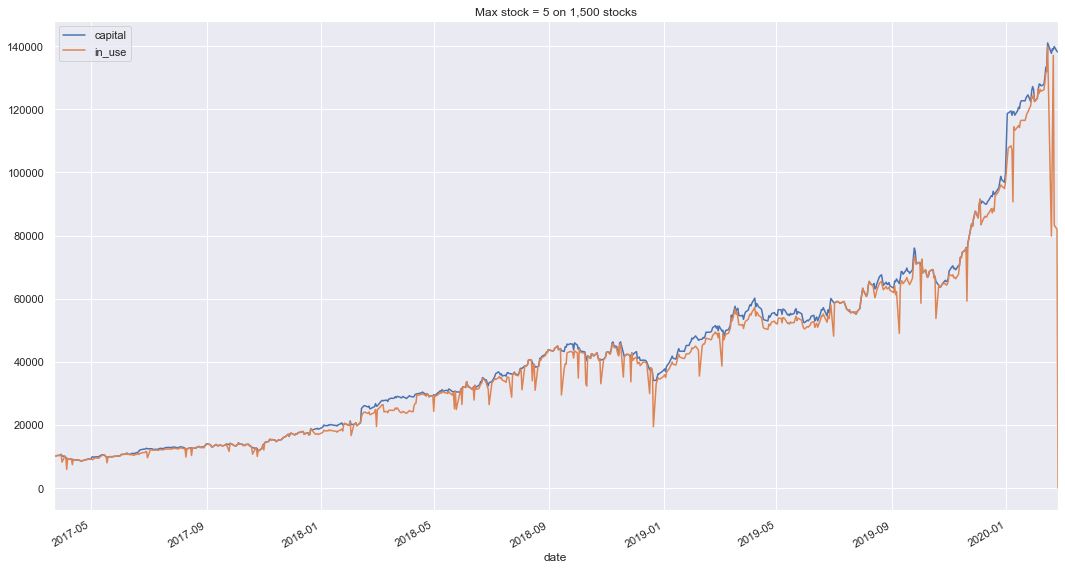

In [7]:
#myPnL_df, my_Capital_df = backtester()
myCapital_df = my_Capital_df
myCapital_df.index = myCapital_df.date
to_plot_cols = ['capital', 'in_use']
myCapital_df[to_plot_cols][first_buy_date:].plot(figsize=(18,10))
plt.title('Max stock = 5 on 1,500 stocks')
plt.show()

# Analysis of Results

The cells below perform a simple analysis. They look at the completed trades. For each trade it calculates the gain and gain percentage. With that it then displays the top ten losses and top ten gains. It ends with calculating the percentage of trades that resulted in a loss.

In [8]:
sell_df = myPnL_df[myPnL_df.action=='SELL'].copy()
sell_df['gain'] = (sell_df.close_amount - sell_df.orig_amount)
sell_df['gain_pct'] = round((sell_df.gain / sell_df.orig_amount)*100, 2)
sell_df['daily_comp_pct'] = (((1 + sell_df.gain_pct/100) ** (1/ sell_df.days_in_trade)) - 1)*100
sell_df

action  close_amount    daily_gain     daily_pct  daily_return       date  \
0    SELL   2000.000000 -2.273737e-13 -1.136868e-14           NaN 2017-03-22   
0    SELL   2000.000000  0.000000e+00  0.000000e+00           NaN 2017-03-22   
0    SELL   2000.000000  0.000000e+00  0.000000e+00           NaN 2017-03-22   
0    SELL   2000.000000  0.000000e+00  0.000000e+00           NaN 2017-03-22   
0    SELL   2000.000000  2.273737e-13  1.136868e-14           NaN 2017-03-22   
..    ...           ...           ...           ...           ...        ...   
0    SELL  27721.599370 -6.522729e+01 -2.347418e-01           NaN 2020-02-21   
0    SELL  27596.281953 -4.532236e+02 -1.615799e+00           NaN 2020-02-24   
0    SELL  27382.478196  1.132176e+02  4.151839e-01           NaN 2020-02-25   
0    SELL  26378.582727 -4.631138e+02 -1.725352e+00           NaN 2020-02-25   
0    SELL  28080.329976  1.897320e+02  6.802721e-01           NaN 2020-02-25   

    days_in_trade  invested     no_shares   orig_amount  stop_loss ticker  \
0               1         0    355.871886   2000.000000      5.058   CVGI   
0               1         0    173.160173   2000.000000     10.395   LNDC   
0               1         0    215.053763   2000.000000      8.370   NATR   
0               1         0    754.716981   2000.000000      2.385    APT   
0               1         0    626.959248   2000.000000      2.871   NYMX   
..            ...       ...           ...           ...        ...    ...   
0               2         0   1087.121544  27786.826663     23.004   SMMF   
0               2         0   2517.908937  28049.505562     10.026   KVHI   
0               4         0   1617.393869  27786.826663     15.462   ESSA   
0               4         0    945.130159  27786.826663     26.460   CCBG   
0               2         0  18973.195930  27890.598017      1.323   STCN   

            gain  gain_pct  daily_comp_pct  
0  -2.273737e-13     -0.00        0.000000  
0   0.000000e+00      0.00        0.000000  
0   0.000000e+00      0.00        0.000000  
0   0.000000e+00      0.00        0.000000  
0   2.273737e-13      0.00        0.000000  
..           ...       ...             ...  
0  -6.522729e+01     -0.23       -0.115066  
0  -4.532236e+02     -1.62       -0.813307  
0  -4.043485e+02     -1.46       -0.367016  
0  -1.408244e+03     -5.07       -1.292337  
0   1.897320e+02      0.68        0.339424  

[612 rows x 15 columns]

In [9]:
sell_df.describe()

close_amount    daily_gain   daily_pct  daily_return  days_in_trade  \
count    612.000000    612.000000  612.000000           0.0     612.000000   
mean    8368.056252     17.156482   -0.050105           NaN       6.933007   
std     6980.318794    778.920050    6.144534           NaN      20.793044   
min     1370.140475  -3448.099940  -15.000000           NaN       1.000000   
25%     2552.170274    -33.965129   -0.621480           NaN       1.000000   
50%     6444.328670      0.000000    0.000000           NaN       2.000000   
75%    10655.468326      5.274333    0.032002           NaN       5.000000   
max    34957.748700  17478.874350  100.000000           NaN     389.000000   

       invested     no_shares   orig_amount    stop_loss          gain  \
count     612.0    612.000000    612.000000   612.000000    612.000000   
mean        0.0   1390.410310   8158.625788    49.087010    209.430464   
std         0.0   4094.448940   6722.775096   247.075978   1363.818998   
min         0.0      0.564730   1370.140475     0.144000  -2027.566099   
25%         0.0    117.976420   2509.679073     5.080500     -5.635032   
50%         0.0    352.968962   6373.303978    14.805000      0.000000   
75%         0.0   1131.124181  10299.300321    41.100750     72.517693   
max         0.0  64659.253135  28049.505562  4950.000000  16773.586437   

         gain_pct  daily_comp_pct  
count  612.000000      612.000000  
mean     2.647190        0.071771  
std     14.663304        1.158115  
min    -20.250000       -7.804555  
25%     -0.160000       -0.027220  
50%      0.000000        0.000000  
75%      1.507500        0.335687  
max    122.460000        7.387479

In [10]:
sell_df[sell_df.days_in_trade >50]

action  close_amount   daily_gain  daily_pct  daily_return       date  \
0   SELL   2474.238732    10.828178   0.439560           NaN 2017-09-01   
0   SELL   5436.669133   339.791821   6.666667           NaN 2017-12-26   
0   SELL   4029.597246    25.255136   0.630694           NaN 2018-01-30   
0   SELL   3561.956773   108.001022   3.126879           NaN 2018-04-13   
0   SELL  10290.807753   -32.186206  -0.311791           NaN 2019-02-26   
0   SELL   8679.083887  -147.938930  -1.675978           NaN 2019-07-01   
0   SELL  15623.848102   213.781274   1.387283           NaN 2019-08-13   
0   SELL  15864.590334   256.963025   1.646394           NaN 2019-09-05   
0   SELL  14048.061035    23.835522   0.169960           NaN 2019-10-28   
0   SELL   9184.481230    63.459534   0.695750           NaN 2019-11-12   
0   SELL  18382.510848 -1220.978580  -6.228374           NaN 2019-11-20   
0   SELL  28254.462483     7.654961   0.027100           NaN 2020-02-05   

   days_in_trade  invested    no_shares   orig_amount  stop_loss ticker  \
0             57         0   270.704456   2189.999053      7.281   TACT   
0             84         0   679.583642   2582.417838      3.420   ELOX   
0             88         0   280.612622   2553.574856      8.190   TACT   
0            113         0   207.694272   2427.946045     10.521    BHC   
0             61         0    97.533957   7573.511724     69.885   NEWR   
0             94         0  4931.297663   9665.343420      1.764   SELB   
0             52         0  1781.510616  10510.912634      5.310   SYRS   
0            128         0   191.763451  10004.299259     46.953   MEDP   
0            159         0   297.944030  10347.596177     31.257   NXRT   
0            389         0   171.512255   5620.456581     29.493   ESNT   
0             69         0  6783.214335  12616.778663      1.674   OVID   
0             64         0   765.496139  13740.655692     16.155   ENPH   

           gain  gain_pct  daily_comp_pct  
0    284.239679     12.98        0.214336  
0   2854.251295    110.53        0.890198  
0   1476.022389     57.80        0.519707  
0   1134.010728     46.71        0.339769  
0   2717.296029     35.88        0.503891  
0   -986.259533    -10.20       -0.114387  
0   5112.935468     48.64        0.765138  
0   5860.291075     58.58        0.360875  
0   3700.464858     35.76        0.192461  
0   3564.024649     63.41        0.126325  
0   5765.732185     45.70        0.546968  
0  14513.806792    105.63        1.132787

In [11]:
sell_df.sort_values(by='gain_pct', ascending=True)[0:10]

action  close_amount   daily_gain  daily_pct  daily_return       date  \
0   SELL   1462.543938  -232.149831 -13.698630           NaN 2017-04-05   
0   SELL   7068.840069 -1206.751983 -14.582062           NaN 2018-11-19   
0   SELL   2145.974160  -229.925803  -9.677419           NaN 2017-09-25   
0   SELL   2061.367918  -291.016647 -12.371134           NaN 2017-10-20   
0   SELL   6239.613793  -955.522447 -13.280116           NaN 2018-08-17   
0   SELL   6953.032350 -1069.697285 -13.333333           NaN 2018-12-21   
0   SELL   4315.021167  -331.924705  -7.142857           NaN 2018-06-13   
0   SELL   1778.959440  -148.246620  -7.692308           NaN 2017-05-18   
0   SELL   1769.130245  -312.199455 -15.000000           NaN 2017-03-31   
0   SELL   5287.491716  -601.420859 -10.212766           NaN 2018-05-22   

   days_in_trade  invested    no_shares  orig_amount  stop_loss ticker  \
0              3         0  2321.498314  1833.983668      0.711   AMPE   
0             11         0   252.458574  8631.558642     30.771    RPD   
0             16         0  1532.838686  2605.825766      1.530   CTRC   
0             25         0   485.027745  2473.641501      4.590   TCCO   
0              8         0   522.143414  7419.657907     12.789   ELOX   
0             42         0   349.574276  8253.448656     21.249   CDNA   
0              5         0  3319.247052  5111.640459      1.386   STRM   
0              4         0    38.605891  2100.160450     48.960    SES   
0              2         0   520.332425  2081.329700      3.600   ELOX   
0              8         0  2505.920245  6214.682207      2.232   AMPE   

          gain  gain_pct  daily_comp_pct  
0  -371.439730    -20.25       -7.265024  
0 -1562.718572    -18.10       -1.798817  
0  -459.851606    -17.65       -1.206363  
0  -412.273584    -16.67       -0.726792  
0 -1180.044115    -15.90       -2.141287  
0 -1300.416307    -15.76       -0.407502  
0  -796.619292    -15.58       -3.330590  
0  -321.201010    -15.29       -4.063544  
0  -312.199455    -15.00       -7.804555  
0  -927.190491    -14.92       -1.999468

In [12]:
sell_df.sort_values(by='gain_pct', ascending=False)[0:10]

action  close_amount    daily_gain   daily_pct  daily_return       date  \
0   SELL  26665.986051   -128.201856   -0.478469           NaN 2019-12-05   
0   SELL  15205.742208    267.379259    1.789883           NaN 2018-09-14   
0   SELL   5436.669133    339.791821    6.666667           NaN 2017-12-26   
0   SELL  28254.462483      7.654961    0.027100           NaN 2020-02-05   
0   SELL   7922.558178    163.773812    2.110818           NaN 2018-03-09   
0   SELL   7538.870270   3506.451288   86.956522           NaN 2018-02-13   
0   SELL  34957.748700  17478.874350  100.000000           NaN 2020-01-02   
0   SELL   9184.481230     63.459534    0.695750           NaN 2019-11-12   
0   SELL  15864.590334    256.963025    1.646394           NaN 2019-09-05   
0   SELL   4029.597246     25.255136    0.630694           NaN 2018-01-30   

   days_in_trade  invested    no_shares   orig_amount  stop_loss ticker  \
0             31         0  6410.092801  11986.873537      1.683   MRSN   
0             44         0   581.259259   7102.988141     10.998   CDNA   
0             84         0   679.583642   2582.417838      3.420   ELOX   
0             64         0   765.496139  13740.655692     16.155   ENPH   
0             36         0  2047.172656   3971.514952      1.746   ENPH   
0             31         0  1753.225644   3786.967391      1.944     ZN   
0             17         0  3066.469184  18184.162262      5.337    SES   
0            389         0   171.512255   5620.456581     29.493   ESNT   
0            128         0   191.763451  10004.299259     46.953   MEDP   
0             88         0   280.612622   2553.574856      8.190   TACT   

           gain  gain_pct  daily_comp_pct  
0  14679.112514    122.46        2.612832  
0   8102.754066    114.08        1.745004  
0   2854.251295    110.53        0.890198  
0  14513.806792    105.63        1.132787  
0   3951.043226     99.48        1.936692  
0   3751.902879     99.07        2.245770  
0  16773.586437     92.24        3.919415  
0   3564.024649     63.41        0.126325  
0   5860.291075     58.58        0.360875  
0   1476.022389     57.80        0.519707

In [13]:
sell_df[sell_df.gain_pct < 0].count()[0], sell_df[sell_df.gain_pct < 0].count()[0]/len(sell_df)

(157, 0.2565359477124183)

In [14]:
myPnL_df

action  close_amount  daily_gain  daily_pct  daily_return       date  \
0     BUY   2000.000000    0.000000   0.000000           NaN 2017-03-22   
0     BUY   2000.000000    0.000000   0.000000           NaN 2017-03-22   
0     BUY   2000.000000    0.000000   0.000000           NaN 2017-03-22   
0     BUY   2000.000000    0.000000   0.000000           NaN 2017-03-22   
0     BUY   2000.000000    0.000000   0.000000           NaN 2017-03-22   
..    ...           ...         ...        ...           ...        ...   
0   CLOSE  26841.696505 -765.555428        NaN     -2.773023 2020-02-24   
0   CLOSE  27890.598017    0.000000        NaN      0.000000 2020-02-24   
0    SELL  27382.478196  113.217571   0.415184           NaN 2020-02-25   
0    SELL  26378.582727 -463.113778  -1.725352           NaN 2020-02-25   
0    SELL  28080.329976  189.731959   0.680272           NaN 2020-02-25   

    days_in_trade  invested     no_shares   orig_amount  stop_loss ticker  
0               0         0    626.959248   2000.000000      2.871   NYMX  
0               0         0     25.471218   2000.000000     70.668    WST  
0               0         0    355.871886   2000.000000      5.058   CVGI  
0               0         0    173.160173   2000.000000     10.395   LNDC  
0               0         0    215.053763   2000.000000      8.370   NATR  
..            ...       ...           ...           ...        ...    ...  
0               3         0    945.130159  27786.826663     26.460   CCBG  
0               1         0  18973.195930  27890.598017      1.323   STCN  
0               4         0   1617.393869  27786.826663     15.462   ESSA  
0               4         0    945.130159  27786.826663     26.460   CCBG  
0               2         0  18973.195930  27890.598017      1.323   STCN  

[4855 rows x 12 columns]

In [15]:
sell_df.ticker.unique(), len(sell_df.ticker.unique())

(array(['CVGI', 'LNDC', 'NATR', 'APT', 'NYMX', 'REX', 'WST', 'CACC',
        'CASH', 'ATSG', 'DXCM', 'MLAB', 'IVC', 'GEOS', 'ELOX', 'CTRC',
        'CBZ', 'EBS', 'TCCO', 'BASI', 'WINA', 'SCL', 'PODD', 'BHC', 'AMPE',
        'BDC', 'THRM', 'JJSF', 'IMGN', 'DAIO', 'ARAY', 'ISNS', 'SES',
        'TRNS', 'ZN', 'EXR', 'DXR', 'LGL', 'PZG', 'CRK', 'AUY', 'AG',
        'NSSC', 'DOV', 'CYH', 'BBQ', 'SPPI', 'ODC', 'ABMD', 'OTEX', 'ATRS',
        'HELE', 'ZUMZ', 'CPHI', 'AMD', 'IRDM', 'AVID', 'KBR', 'BWA', 'NLS',
        'AEO', 'VZ', 'ABR', 'IOVA', 'NVDA', 'NFLX', 'INS', 'AMKR', 'XLNX',
        'FLDM', 'TSLA', 'WTT', 'GLDD', 'AEZS', 'TRST', 'LHCG', 'PAYS',
        'SYX', 'NOA', 'ITT', 'HWC', 'PNFP', 'AMWD', 'UVSP', 'UNT', 'RGS',
        'HOFT', 'INTT', 'CAR', 'TACT', 'AUTO', 'VLY', 'PGR', 'TG', 'MASI',
        'PCRX', 'ABIO', 'VSH', 'IPHI', 'PACD', 'KIRK', 'COR', 'WMT', 'BHR',
        'SCCO', 'KMI', 'PCTI', 'MOSY', 'UI', 'ERII', 'MELI', 'AXU', 'CCXI',
        'GHM', 'SEE', 'LMAT', 'VNRX', 'MLP', 

In [16]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker          gain
109   ENPH  20268.446830
271    SES  16133.581209
205   MRSN  14679.112514
153   IMGN  10464.946757
66    CDNA   7527.867433
195   MEDP   5860.291075
228   OVID   5765.732185
108   ELOX   5578.566980
289   SYRS   5112.935468
217    NOA   4988.225649

In [17]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
260    RPD -2912.572284
84    CTRC -2628.770010
269   SELB -2320.758207
230   PAYS -2050.780693
212   NERV -1908.043037
293   TCCO -1774.670911
253   REKR -1774.208098
16    AMPE -1754.762795
23    ARDX -1614.693569
64    CCBG -1408.243936

In [18]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker          gain
205   MRSN  14679.112514
195   MEDP   5860.291075
228   OVID   5765.732185
289   SYRS   5112.935468
109   ENPH   5067.111707
221   NXRT   3700.464858
112   ESNT   3564.024649
271    SES   3226.716242
213   NEWR   2717.296029
171   KALV   2146.332013

In [19]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
253   REKR -1774.208098
260    RPD -1456.286142
64    CCBG -1408.243936
269   SELB -1160.379104
212   NERV  -954.021519
233   PCTY  -934.663333
250   RACE  -865.955033
23    ARDX  -807.346784
304   TRVN  -784.058184
46    BCRX  -703.768442

In [20]:
myCapital_df.tail()

date capital   in_use     free
date                                           
2020-02-19 2020-02-19  139168   108892  30275.5
2020-02-20 2020-02-20  138850   137094  1755.85
2020-02-21 2020-02-21  139906  83281.8  56624.4
2020-02-24 2020-02-24  138332  82001.6  56330.1
2020-02-25 2020-02-25  138171        0   138171

In [21]:
len(possible_trades_df)

15374

In [22]:
possible_trades_df.to_csv(f'{DATAPATH}possible_trades_1500.csv', index=False)
myCapital_df.to_csv(f'{DATAPATH}capital_1500.csv', index=False)
myPnL_df.to_csv(f'{DATAPATH}PnL_1500.csv', index=False)

In [23]:
ls ../data

F13_Renaissance_tech.csv  capital_0500.csv          possible_trades_1000.csv
F13_Renaissance_tech.txt  capital_1000.csv          possible_trades_1500.csv
PnL_0100.csv              capital_1500.csv          possible_trades_2000.csv
PnL_0500.csv              capital_2000.csv          stocks.csv
PnL_1000.csv              exclude.csv               stocks_100.csv
PnL_1500.csv              optimal_params.csv        stocks_1000.csv
PnL_2000.csv              possible_trades_0100.csv  stocks_2000.csv
capital_0100.csv          possible_trades_0500.csv  stocks_500.csv
